In [722]:
# pip install imbalanced-learn

In [1]:
# check version number
import imblearn
print(imblearn.__version__)

0.11.0


In [16]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import time
# from cv2 import VideoCapture, CAP_PROP_FRAME_WIDTH, CAP_PROP_FRAME_HEIGHT, CAP_PROP_FPS
from cv2 import (VideoCapture, imshow, waitKey, destroyAllWindows,
CAP_PROP_FRAME_WIDTH, CAP_PROP_FRAME_HEIGHT, CAP_PROP_FPS, cvtColor, COLOR_BGR2GRAY)
import cv2 
from IPython import display

# references:
# Synthetic Minority Oversampling Technique (SMOTE) on data.csv
# https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
# How to read and display video
# https://machinelearningmastery.com/how-to-read-and-display-videos-using-opencv/
# Save Video as Frames OpenCV{PY}
# https://stackoverflow.com/questions/27378662/save-video-as-frames-opencvpy

limitations:
    1. Lighting must be enough to be able to read digits
    2. Manual location of digits and decimal pixel coordinates
    3. Tilt of video
    4. Video is stable (jittery video a problem)
    5. Determination of decimal place is through thresholding only
    
    
1.	kW hour readings are legible in the video (e.g. lighting condition is sufficient, resolution of video is enough, video can be rotated into an upright position)

2.	Digit and decimal pixel coordinates are fixed throughout the video (with rectangular bounding boxes) and are of equal sizes. This also implies that video recording should be stable and steady.

3.	There are only three significant digits and two possible locations for the decimal place for the kW reading (either before or after the first significant digit)


In [5]:
# rotate image
# https://stackoverflow.com/questions/9041681/opencv-python-rotate-image-by-x-degrees-around-specific-point

def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

In [6]:
path_video = r"D:\Jim\UP\MEngg in AI\AI 201\Project\Materials\Raw\VID20240111092434.mp4"

# Create video capture object
capture = VideoCapture(path_video)

# Check that a camera connection has been established
if not capture.isOpened():
    print("Error opening video file")

else:
    # Get video properties and print them
    frame_width = capture.get(CAP_PROP_FRAME_WIDTH)
    frame_height = capture.get(CAP_PROP_FRAME_HEIGHT)
    fps = capture.get(CAP_PROP_FPS)
    
    totalNoFrames = capture.get(cv2.CAP_PROP_FRAME_COUNT)
    durationInSeconds = totalNoFrames // fps

    print("Image frame width: ", int(frame_width))
    print("Image frame height: ", int(frame_height))
    print("Frame rate: ", int(fps))
    print("Total number of frames ", int(totalNoFrames))
    print("Duration (in seconds): ", int(durationInSeconds))

# Parameters for checking frame save count and frame number    
frame_save_count = 0
frame_counter = 0
show_video = False # shows video or not
save_images = False # saves frames in video or not (to save show_video must also be set to True)

#     x1,y1 = 357, 271
#     x2,y2 = 386, 323

# Parameters for getting digit frames
# size of digit in pixels
digit_height = 53+1
digit_width = 39
#     digit_height = 55
#     digit_width = 35 
#digit_width = 29 

# Setup pixel coordinates for 1st, 2nd and 3rd digits
#     x1_digit_1, y1_digit_1 = 356, 315
x1_digit_1, y1_digit_1 = 352, 315
x2_digit_1, y2_digit_1 = x1_digit_1 + digit_width, y1_digit_1 + digit_height

x1_digit_2, y1_digit_2 = x2_digit_1, y1_digit_1
x2_digit_2, y2_digit_2 = x1_digit_2 + digit_width, y1_digit_2 + digit_height

x1_digit_3, y1_digit_3 = x2_digit_2, y1_digit_1
x2_digit_3, y2_digit_3 = x1_digit_3 + digit_width, y1_digit_3 + digit_height

#     x1_digit_1, y1_digit_1 = 357, 310
#     x2_digit_1, y2_digit_1 = 386, 369

# Construct list of coordinates for frame digits
frame_digit_coordinates =\
    x1_digit_1, y1_digit_1, x2_digit_1, y2_digit_1,\
    x2_digit_2, y1_digit_2, x2_digit_2, y2_digit_2,\
    x1_digit_3, y1_digit_3, x2_digit_3, y2_digit_3

while capture.isOpened() and show_video:

    # Read an image frame
    ret, frame = capture.read()

    # End video if there are no frames
    if type(frame) == type(None):
        break

    # Rotate frame
    frame = rotate_image(frame, 3.5) # 3.5 degree rotation seems to be the right value
    

    
#     # Enclose digits in rectangular boxes
#     cv2.rectangle(frame, (x1_digit_1, y1_digit_1), (x2_digit_1, y2_digit_1 ), color=(255,0,0), thickness=1)
#     cv2.rectangle(frame, (x1_digit_2, y1_digit_2), (x2_digit_2, y2_digit_2 ), color=(255,0,0), thickness=1)
#     cv2.rectangle(frame, (x1_digit_3, y1_digit_3), (x2_digit_3, y2_digit_3 ), color=(255,0,0), thickness=1)
    
    # Convert to grayscale
    frame = cvtColor(frame, COLOR_BGR2GRAY)
    
    if frame_counter % int(fps) == 0 and save_images == True: # save one frame per second
        # Save frame to a file
        frame_name = r"D:\Jim\UP\MEngg in AI\AI 201\Project\Materials\frames\frame%d.jpg" %frame_save_count
        cv2.imwrite(frame_name, frame) # save frame as JPEG file
        frame_save_count += 1
    
    # Update frame counter
    frame_counter += 1
    
    # If an image frame has been grabbed, display it
    if ret:
#         pass
        imshow('Displaying image frames from video file', frame)

    # If the Esc key is pressed, terminate the while loop
    if waitKey(25) == 27:
        break

# Release the video capture and close the display window
capture.release()
destroyAllWindows()

Image frame width:  1920
Image frame height:  1080
Frame rate:  29
Total number of frames  37566
Duration (in seconds):  1260


In [7]:
# Load frame labels

# Frame labels
path_frame_labels = r"D:\Jim\UP\MEngg in AI\AI 201\Project\Materials\frame labels.csv"

# Open as dataframe
df_frame_labels = pd.read_csv(path_frame_labels)

# Create DataFrame without dropping anything
df_frame_labels_whole = df_frame_labels.copy(deep=True)

# Remove frames with Nan as Value
df_frame_labels = df_frame_labels.dropna(subset=["Value"])

In [8]:
df_frame_labels_whole

,Frame No,Value
0,0,0.329
1,1,0.315
2,2,0.312
3,3,0.315
4,4,0.312
...,...,...
1291,1291,0.841
1292,1292,0.840
1293,1293,0.840
1294,1294,0.840


In [12]:
df_frame_labels

,Frame No,Value
0,0,0.329
1,1,0.315
2,2,0.312
3,3,0.315
4,4,0.312
...,...,...
1291,1291,0.841
1292,1292,0.840
1293,1293,0.840
1294,1294,0.840


In [13]:
a,b,c = '0.309'.split('.')[1]

In [14]:
'0.309'.split('.')

['0', '309']

In [9]:
# Convert frames to array

# Location of frames
path_frames = r"D:\Jim\UP\MEngg in AI\AI 201\Project\Materials\frames"
    

    
def frame_to_normalized_row_vectors(frame, frame_digit_coordinates):
    
    # Unpack coordinates
    x1_digit_1, y1_digit_1, x2_digit_1, y2_digit_1,\
    x2_digit_2, y1_digit_2, x2_digit_2, y2_digit_2,\
    x1_digit_3, y1_digit_3, x2_digit_3, y2_digit_3 = frame_digit_coordinates
    
    # Get three digits from frame
    frame_digit_1 = frame[y1_digit_1: y2_digit_1, x1_digit_1:x2_digit_1]
    frame_digit_2 = frame[y1_digit_2: y2_digit_2, x1_digit_2:x2_digit_2]
    frame_digit_3 = frame[y1_digit_3: y2_digit_3, x1_digit_3:x2_digit_3]

    # Get dimensions of frame_digit
    frame_digit_height = frame_digit_1.shape[1]
    frame_digit_width = frame_digit_1.shape[0]
    frame_digit_number_pixels = frame_digit_height * frame_digit_width
    
    # Flatten out frame_digit into a row vector
    frame_digit_1_row_vector = frame_digit_1.reshape(1, frame_digit_number_pixels)
    frame_digit_2_row_vector = frame_digit_2.reshape(1, frame_digit_number_pixels)
    frame_digit_3_row_vector = frame_digit_3.reshape(1, frame_digit_number_pixels)

    # Normalize values from 0 to 1
    frame_digit_1_row_vector = frame_digit_1_row_vector/255.0
    frame_digit_2_row_vector = frame_digit_2_row_vector/255.0
    frame_digit_3_row_vector = frame_digit_3_row_vector/255.0
    
    # Stack frames into 1 array
    frame_digits_123 = np.vstack((
        frame_digit_1_row_vector,
        frame_digit_2_row_vector,
        frame_digit_3_row_vector
    ))
    
    return frame_digits_123
    
def frame_no_value_to_frame_and_frame_digit_and_digits(frame_no, value, frame_digit_coordinates=frame_digit_coordinates):
    
    # Read image based from frame_no
    frame_path = r"D:\Jim\UP\MEngg in AI\AI 201\Project\Materials\frames\frame%d.jpg" %frame_no
    frame = cv2.imread(frame_path) 
    frame = frame[:,:,0] # get 1st band of frame (grayscale, note: all bands are equal)
    
    # Get frame digits
    frame_digits = frame_to_normalized_row_vectors(frame, frame_digit_coordinates)
    
    # Convert value to string of 3 decimal places
    value = "%.3f"%value 
    print(frame_no, value)
    
    # Get first 3 significant digits in value
    digit_1,digits_234 = value.split('.')
    if digit_1 == '0': # insignificant digit
        digit_1, digit_2, digit_3 = digits_234 # assign 3 digits after decimal to be digits 1, 2 and 3
    else: # first digit is significant
        digit_2, digit_3, digit_4 = digits_234 # assign digits 2 and 3 to be the digits after the decimal
    digits = np.array([[int(digit_1)], [int(digit_2)], [int(digit_3)]])
    
    # Setup output dictionary
    frame_and_frame_digit_and_digits_dict = {
        'frame': frame,
        'frame_digits': frame_digits,
        'digits': digits
    }
    return frame_and_frame_digit_and_digits_dict

frame_and_frame_digit_and_digits = [frame_no_value_to_frame_and_frame_digit_and_digits(frame_no, value) for frame_no, value in zip(df_frame_labels['Frame No'], df_frame_labels['Value'])]
frame_and_frame_digit_and_digits_df = pd.DataFrame(frame_and_frame_digit_and_digits)
'''
How to iterate over rows in a DataFrame in Pandas
https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas

# Iterating over one column - `f` is some function that processes your data
result = [f(x) for x in df['col']]
# Iterating over two columns, use `zip`
result = [f(x, y) for x, y in zip(df['col1'], df['col2'])]
# Iterating over multiple columns - same data type
result = [f(row[0], ..., row[n]) for row in df[['col1', ...,'coln']].to_numpy()]
# Iterating over multiple columns - differing data type
result = [f(row[0], ..., row[n]) for row in zip(df['col1'], ..., df['coln'])]
'''


0 0.329
1 0.315
2 0.312
3 0.315
4 0.312
5 0.311
6 0.312
7 0.309
8 0.307
9 0.307
10 0.308
11 0.310
12 0.309
13 0.309
14 0.307
15 0.307
16 0.306
17 0.305
18 0.306
19 0.304
20 0.303
21 0.305
22 0.306
23 0.304
24 0.303
25 0.304
26 0.304
27 0.304
28 0.302
29 0.305
30 0.303
31 0.304
32 0.304
33 0.303
34 0.304
35 0.304
36 0.304
37 0.304
38 0.304
39 0.301
40 0.302
41 0.306
42 0.315
43 0.316
44 0.324
45 0.319
46 0.292
47 0.291
48 0.290
49 0.296
50 0.292
51 0.295
52 0.292
53 0.297
54 0.290
55 0.290
56 0.289
57 0.289
58 0.288
59 0.290
60 0.287
61 0.287
62 0.287
63 0.288
64 0.287
65 0.288
66 0.287
67 0.286
68 0.287
69 0.288
70 0.287
71 0.289
72 0.287
73 0.287
74 0.288
75 0.287
76 0.291
77 0.287
78 0.289
79 0.286
80 0.287
81 0.287
82 0.287
83 0.288
84 0.290
85 0.286
86 0.289
87 0.287
88 0.289
89 0.290
90 0.292
91 0.286
92 0.294
93 0.288
94 0.292
95 0.289
96 0.290
97 0.287
98 0.289
99 0.288
100 0.293
101 0.287
102 0.293
103 0.286
104 0.293
105 0.287
106 0.289
107 0.287
108 0.287
109 0.287
110 0.288


831 0.793
832 0.796
833 0.794
834 0.798
835 0.795
836 0.799
837 0.795
838 0.798
839 0.797
840 0.803
841 0.798
842 0.802
843 0.803
844 0.802
845 0.801
846 0.803
847 0.802
848 0.805
849 0.803
850 0.806
851 0.803
852 0.806
853 0.803
854 0.808
855 0.804
856 0.810
857 0.804
858 0.809
859 0.806
860 0.811
861 0.806
862 0.811
863 0.806
864 0.811
865 0.807
866 0.811
867 0.803
868 0.800
869 0.798
870 0.791
871 0.788
872 0.780
873 0.778
874 0.771
875 0.766
876 0.760
877 0.754
878 0.745
879 0.740
880 0.736
881 0.731
882 0.722
883 0.719
884 0.717
885 0.717
886 0.716
887 0.716
888 0.715
889 0.714
890 0.713
891 0.712
892 0.713
893 0.711
894 0.712
895 0.713
896 0.711
897 0.711
898 0.711
899 0.713
900 0.713
901 0.714
902 0.712
903 0.712
904 0.711
905 0.712
906 0.710
907 0.714
908 0.710
909 0.710
910 0.710
911 0.710
912 0.710
913 0.710
914 0.709
915 0.709
916 0.714
917 0.710
918 0.713
919 0.711
920 0.711
921 0.709
922 0.711
923 0.714
924 0.708
925 0.716
926 0.710
927 0.711
928 0.711
929 0.710
930 0.703


"\nHow to iterate over rows in a DataFrame in Pandas\nhttps://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas\n\n# Iterating over one column - `f` is some function that processes your data\nresult = [f(x) for x in df['col']]\n# Iterating over two columns, use `zip`\nresult = [f(x, y) for x, y in zip(df['col1'], df['col2'])]\n# Iterating over multiple columns - same data type\nresult = [f(row[0], ..., row[n]) for row in df[['col1', ...,'coln']].to_numpy()]\n# Iterating over multiple columns - differing data type\nresult = [f(row[0], ..., row[n]) for row in zip(df['col1'], ..., df['coln'])]\n"

In [10]:
def frame_no_to_frame_and_frame_digit(frame_no, frame_digit_coordinates=frame_digit_coordinates):
    
    # Read image based from frame_no
    frame_path = r"D:\Jim\UP\MEngg in AI\AI 201\Project\Materials\frames\frame%d.jpg" %frame_no
    frame = cv2.imread(frame_path) 
    frame = frame[:,:,0] # get 1st band of frame (grayscale, note: all bands are equal)
    
    # Get frame digits
    frame_digits = frame_to_normalized_row_vectors(frame, frame_digit_coordinates)
    
    # Setup output dictionary
    frame_and_frame_digit_dict = {
        'frame': frame,
        'frame_digits': frame_digits
    }
    return frame_and_frame_digit_dict

frame_and_frame_digit_whole = [frame_no_to_frame_and_frame_digit(frame_no) for frame_no in zip(df_frame_labels_whole['Frame No'])]
frame_and_frame_digit_whole_df = pd.DataFrame(frame_and_frame_digit_whole)

In [17]:
# frame[x1_digit_1:x2_digit_1, y1_digit_1: y2_digit_1].shape

In [18]:
# height = frame[x1_digit_1:x2_digit_1, y1_digit_1: y2_digit_1].shape[1]
# width = frame[x1_digit_1:x2_digit_1, y1_digit_1: y2_digit_1].shape[0]
# frame_digit_number_pixels = height * width
# frame[x1_digit_1:x2_digit_1, y1_digit_1: y2_digit_1].reshape(1, frame_digit_number_pixels).shape

In [19]:
# sum(sum(result[0][:,:,2] - result[0][:,:,1])) + sum(sum(result[0][:,:,2] - result[0][:,:,0])) # 3 bands which are equal (grayscale)

In [20]:
# result[0][:,:,0].shape

In [21]:
# cv2.imshow('test',result[0][:,:,2])
# # cv2.waitKey(0)

# cv2.waitKey(1000)
# cv2.destroyAllWindows()

In [22]:
# cv2.imshow('test',result[0][:,:,0])
# # cv2.waitKey(0)

# cv2.waitKey(1000)
# cv2.destroyAllWindows()

# # # If the Esc key is pressed, destroy all windows
# # if waitKey(25) == 27:
# #     destroyAllWindows()

In [23]:
# Shows sample frame 0

frame_0 = frame_and_frame_digit_and_digits[0]['frame']

print('digits in frame:')
print(frame_and_frame_digit_and_digits[0]['digits'])
print('row vector arrays in frame:')
print(frame_and_frame_digit_and_digits[0]['frame_digits'])

# shows .329 meter reading (whole)
cv2.imshow('test',frame_0) 

# cv2.waitKey(0)
cv2.waitKey(2000) # show image for 2 seconds
cv2.destroyAllWindows()

# shows 1st digit in reading (3)
cv2.imshow('test',frame_0[y1_digit_1: y2_digit_1, x1_digit_1:x2_digit_1]) 

cv2.waitKey(2000) # show image for 2 seconds
cv2.destroyAllWindows()

# shows 2nd digit in reading (2)
cv2.imshow('test',frame_0[y1_digit_2: y2_digit_2, x1_digit_2:x2_digit_2]) 

cv2.waitKey(2000) # show image for 2 seconds
cv2.destroyAllWindows()

# shows 3rd digit in reading (9)
cv2.imshow('test',frame_0[y1_digit_3: y2_digit_3, x1_digit_3:x2_digit_3]) 

cv2.waitKey(2000) # show image for 2 seconds
cv2.destroyAllWindows()

digits in frame:
[[3]
 [2]
 [9]]
row vector arrays in frame:
[[0.56862745 0.56862745 0.56862745 ... 0.59215686 0.59215686 0.58823529]
 [0.58823529 0.59215686 0.59607843 ... 0.58431373 0.58431373 0.58431373]
 [0.58431373 0.58431373 0.58823529 ... 0.58823529 0.58431373 0.58431373]]


In [24]:
frame_and_frame_digit_and_digits_df

,frame,frame_digits,digits
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.5686274509803921, 0.5686274509803921, 0.56...","[[3], [2], [9]]"
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.5647058823529412, 0.5686274509803921, 0.57...","[[3], [1], [5]]"
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.5647058823529412, 0.5647058823529412, 0.56...","[[3], [1], [2]]"
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.5647058823529412, 0.5647058823529412, 0.56...","[[3], [1], [5]]"
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.5647058823529412, 0.5647058823529412, 0.56...","[[3], [1], [2]]"
...,...,...,...
1290,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.596078431372...","[[8], [4], [1]]"
1291,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.6039215686274509, 0.6078431372549019, 0.60...","[[8], [4], [0]]"
1292,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.596078431372549, 0.6039215686274509, 0.607...","[[8], [4], [0]]"
1293,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.6039215686274509, 0.596078431372549, 0.596...","[[8], [4], [0]]"


In [25]:
frame_digit_array = np.vstack(frame_and_frame_digit_and_digits_df['frame_digits'].tolist())
digit_array = np.vstack(frame_and_frame_digit_and_digits_df['digits'].tolist())

In [26]:
frame_digit_array_df = pd.DataFrame(frame_digit_array)

In [27]:
frame_digit_array_df

,0,1,2,3,4,5,6,7,8,9,...,2096,2097,2098,2099,2100,2101,2102,2103,2104,2105
0,0.568627,0.568627,0.568627,0.568627,0.568627,0.564706,0.564706,0.564706,0.564706,0.568627,...,0.568627,0.572549,0.576471,0.580392,0.584314,0.584314,0.588235,0.592157,0.592157,0.588235
1,0.588235,0.592157,0.596078,0.596078,0.596078,0.592157,0.592157,0.596078,0.600000,0.600000,...,0.588235,0.584314,0.584314,0.584314,0.580392,0.584314,0.584314,0.584314,0.584314,0.584314
2,0.584314,0.584314,0.588235,0.584314,0.584314,0.584314,0.584314,0.584314,0.584314,0.588235,...,0.576471,0.576471,0.576471,0.584314,0.588235,0.588235,0.588235,0.588235,0.584314,0.584314
3,0.564706,0.568627,0.572549,0.572549,0.572549,0.572549,0.572549,0.568627,0.572549,0.576471,...,0.572549,0.580392,0.588235,0.588235,0.588235,0.588235,0.588235,0.592157,0.592157,0.592157
4,0.596078,0.596078,0.596078,0.592157,0.592157,0.592157,0.592157,0.592157,0.592157,0.592157,...,0.580392,0.584314,0.584314,0.584314,0.584314,0.584314,0.588235,0.592157,0.592157,0.588235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3880,0.615686,0.615686,0.615686,0.615686,0.611765,0.611765,0.611765,0.611765,0.611765,0.615686,...,0.600000,0.607843,0.611765,0.611765,0.607843,0.611765,0.611765,0.611765,0.619608,0.615686
3881,0.600000,0.600000,0.603922,0.607843,0.607843,0.607843,0.607843,0.607843,0.611765,0.611765,...,0.603922,0.607843,0.611765,0.611765,0.611765,0.611765,0.611765,0.615686,0.592157,0.537255
3882,0.592157,0.592157,0.596078,0.600000,0.600000,0.600000,0.603922,0.603922,0.592157,0.600000,...,0.596078,0.600000,0.607843,0.603922,0.607843,0.611765,0.615686,0.615686,0.615686,0.611765
3883,0.619608,0.615686,0.615686,0.615686,0.615686,0.611765,0.611765,0.615686,0.619608,0.615686,...,0.600000,0.603922,0.603922,0.603922,0.607843,0.611765,0.615686,0.615686,0.615686,0.615686


In [28]:
digit_array_df = pd.DataFrame(digit_array)

In [29]:
digit_array_df 

,0
0,3
1,2
2,9
3,3
4,1
...,...
3880,4
3881,0
3882,8
3883,4


In [30]:
frame_digit_array.shape

(3885, 2106)

In [31]:
digit_array.shape

(3885, 1)

In [32]:
df_data = frame_digit_array_df
df_data_labels = digit_array_df

# Value for first class
class_start = 0

In [33]:
# # D:\Jim\UP\MEngg in AI\AI 201\HW\HW_03\AI201_PA3_ANN_1SAY23-24\AI201_PA3_Data
# # data.csv
# # data_labels.csv
# # test_set.csv

# # open files
# path_data = r"D:\Jim\UP\MEngg in AI\AI 201\HW\HW_03\AI201_PA3_ANN_1SAY23-24\AI201_PA3_Data\data.csv"
# path_data_labels = r"D:\Jim\UP\MEngg in AI\AI 201\HW\HW_03\AI201_PA3_ANN_1SAY23-24\AI201_PA3_Data\data_labels.csv"
# path_test_set = r"D:\Jim\UP\MEngg in AI\AI 201\HW\HW_03\AI201_PA3_ANN_1SAY23-24\AI201_PA3_Data\test_set.csv"

# df_data = pd.read_csv(path_data, header=None)
# df_data_labels = pd.read_csv(path_data_labels, header=None)
# df_test_set = pd.read_csv(path_test_set, header=None)

# # Value for first class
# class_start = 1

In [34]:
df_data

,0,1,2,3,4,5,6,7,8,9,...,2096,2097,2098,2099,2100,2101,2102,2103,2104,2105
0,0.568627,0.568627,0.568627,0.568627,0.568627,0.564706,0.564706,0.564706,0.564706,0.568627,...,0.568627,0.572549,0.576471,0.580392,0.584314,0.584314,0.588235,0.592157,0.592157,0.588235
1,0.588235,0.592157,0.596078,0.596078,0.596078,0.592157,0.592157,0.596078,0.600000,0.600000,...,0.588235,0.584314,0.584314,0.584314,0.580392,0.584314,0.584314,0.584314,0.584314,0.584314
2,0.584314,0.584314,0.588235,0.584314,0.584314,0.584314,0.584314,0.584314,0.584314,0.588235,...,0.576471,0.576471,0.576471,0.584314,0.588235,0.588235,0.588235,0.588235,0.584314,0.584314
3,0.564706,0.568627,0.572549,0.572549,0.572549,0.572549,0.572549,0.568627,0.572549,0.576471,...,0.572549,0.580392,0.588235,0.588235,0.588235,0.588235,0.588235,0.592157,0.592157,0.592157
4,0.596078,0.596078,0.596078,0.592157,0.592157,0.592157,0.592157,0.592157,0.592157,0.592157,...,0.580392,0.584314,0.584314,0.584314,0.584314,0.584314,0.588235,0.592157,0.592157,0.588235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3880,0.615686,0.615686,0.615686,0.615686,0.611765,0.611765,0.611765,0.611765,0.611765,0.615686,...,0.600000,0.607843,0.611765,0.611765,0.607843,0.611765,0.611765,0.611765,0.619608,0.615686
3881,0.600000,0.600000,0.603922,0.607843,0.607843,0.607843,0.607843,0.607843,0.611765,0.611765,...,0.603922,0.607843,0.611765,0.611765,0.611765,0.611765,0.611765,0.615686,0.592157,0.537255
3882,0.592157,0.592157,0.596078,0.600000,0.600000,0.600000,0.603922,0.603922,0.592157,0.600000,...,0.596078,0.600000,0.607843,0.603922,0.607843,0.611765,0.615686,0.615686,0.615686,0.611765
3883,0.619608,0.615686,0.615686,0.615686,0.615686,0.611765,0.611765,0.615686,0.619608,0.615686,...,0.600000,0.603922,0.603922,0.603922,0.607843,0.611765,0.615686,0.615686,0.615686,0.615686


In [35]:
df_data_labels[0].unique()

array([3, 2, 9, 1, 5, 0, 7, 8, 6, 4])

In [36]:
# list_data_labels = list(df_data_labels[0])

# # Creating a histogram
# plt.hist(list_data_labels, bins=max(list_data_labels)-min(list_data_labels)+class_start, align='left', rwidth=0.8)

# # Adding labels and title
# plt.xlabel('Classes')
# plt.ylabel('Frequency')
# plt.title(f'Labelled Data Histogram before SMOTE (total={len(df_data_labels)})')

# # Show the plot
# plt.show()

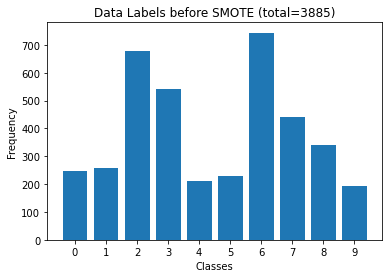

In [37]:
list_data_labels = list(df_data_labels[0])

# Creating a histogram with specific bins
bins = range(class_start, max(list_data_labels) + 2)  # +2 to include the last bin edge
plt.hist(list_data_labels, bins=bins, align='left', rwidth=0.8)

# Adding labels and title
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title(f'Data Labels before SMOTE (total={len(list_data_labels)})')

# Set x-axis ticks to ensure all classes are shown
plt.xticks(range(class_start, max(list_data_labels) + 1 + class_start))

# Show the plot
plt.show()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

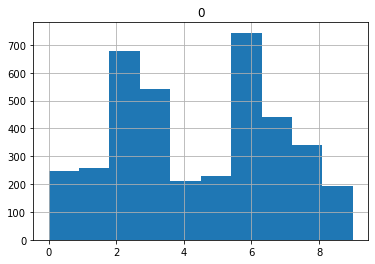

In [38]:
# check histogram of data
df_data_labels.hist()

In [39]:
for i in range(class_start,len(df_data_labels[0].unique())+class_start):
    print('class:', i, 'frequency:', len(df_data_labels.loc[df_data_labels[0] == i]))

class: 0 frequency: 246
class: 1 frequency: 257
class: 2 frequency: 680
class: 3 frequency: 540
class: 4 frequency: 212
class: 5 frequency: 228
class: 6 frequency: 744
class: 7 frequency: 442
class: 8 frequency: 341
class: 9 frequency: 195


In [40]:
# df_test_set

In [41]:
# convert to numpy arrays
np_data = df_data.to_numpy()
np_data_labels = df_data_labels.to_numpy()
# np_test_set = df_test_set.to_numpy()

In [42]:
sum(np_data_labels == digit_array)

array([3885])

In [43]:
digit_array

array([[3],
       [2],
       [9],
       ...,
       [8],
       [4],
       [1]])

In [44]:
# Synthetic Minority Oversampling Technique (SMOTE) on data.csv
# https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

# transform the dataset
oversample = SMOTE()
np_data_smote, np_data_labels_smote = oversample.fit_resample(np_data, np_data_labels)

In [45]:
# np_data_smote to df_data_smote
df_data_smote = pd.DataFrame(np_data_smote)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

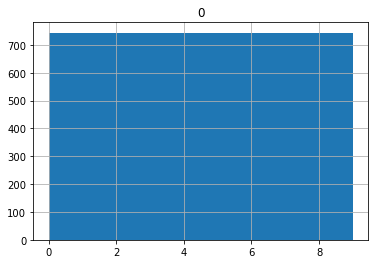

In [46]:
# histogram after smote
df_data_labels_smote = pd.DataFrame(np_data_labels_smote) # np_data_labels_smote to df_data_labels_smote
df_data_labels_smote.hist()

In [47]:
# list_data_labels_smote = list(df_data_labels_smote[0])

# # Creating a histogram
# plt.hist(list_data_labels_smote, bins=max(list_data_labels_smote)-min(list_data_labels_smote)+1, align='left', rwidth=0.8)

# # Adding labels and title
# plt.xlabel('Classes')
# plt.ylabel('Frequency')
# plt.title(f'Data Labels after SMOTE (total={len(df_data_labels_smote)})')

# # Show the plot
# plt.show()

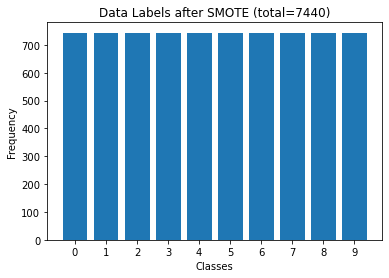

In [48]:
list_data_labels_smote = list(df_data_labels_smote[0])

# Creating a histogram with specific bins
bins = range(class_start, max(list_data_labels_smote) + 2 + class_start)  # +2 to include the last bin edge
plt.hist(list_data_labels_smote, bins=bins, align='left', rwidth=0.8)

# Adding labels and title
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title(f'Data Labels after SMOTE (total={len(df_data_labels_smote)})')

# Set x-axis ticks to ensure all classes are shown
plt.xticks(range(class_start, max(list_data_labels_smote) + 1))

# Show the plot
plt.show()

In [49]:
len(df_data_labels_smote)

7440

In [50]:
df_data_labels_smote

,0
0,3
1,2
2,9
3,3
4,1
...,...
7435,9
7436,9
7437,9
7438,9


In [51]:
for i in range(class_start, max(list_data_labels_smote)+1):
    print('class:', i, 'frequency:', len(df_data_labels_smote.loc[df_data_labels_smote[0] == i]))

class: 0 frequency: 744
class: 1 frequency: 744
class: 2 frequency: 744
class: 3 frequency: 744
class: 4 frequency: 744
class: 5 frequency: 744
class: 6 frequency: 744
class: 7 frequency: 744
class: 8 frequency: 744
class: 9 frequency: 744


In [52]:
# split training and testing

In [55]:
# 800/len(df_data_labels_smote)

In [56]:
# 1-(800/13000.0)

In [57]:
training_set = df_data_smote.sample(frac=0.70,random_state=200)
validation_set = df_data_smote.drop(training_set.index)

In [58]:
training_labels = df_data_labels_smote.sample(frac=0.70,random_state=200)
validation_labels = df_data_labels_smote.drop(training_labels.index)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

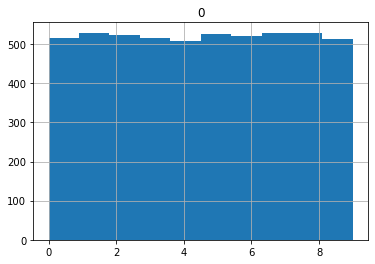

In [59]:
training_labels.hist()

In [60]:
# # Do not use SMOTE (no SMOTE)
# training_set = df_data.sample(frac=0.9384615384615385,random_state=200)
# validation_set = df_data.drop(training_set.index)

# training_labels = df_data_labels.sample(frac=0.9384615384615385,random_state=200)
# validation_labels = df_data_labels.drop(training_labels.index)

In [61]:
# list_training_labels_smote = list(training_labels[0])

# # Creating a histogram
# plt.hist(list_training_labels_smote, bins=max(list_training_labels_smote)-min(list_training_labels_smote)+1, align='left', rwidth=0.8)

# # Adding labels and title
# plt.xlabel('Classes')
# plt.ylabel('Frequency')
# plt.title(f'Training Labels Histogram after SMOTE (total={len(training_labels)})')

# # Show the plot
# plt.show()

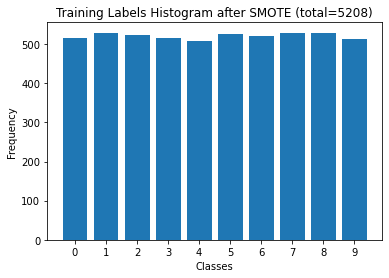

In [62]:
list_training_labels_smote = list(training_labels[0])

# Creating a histogram with specific bins
bins = range(class_start, max(list_training_labels_smote) + 2 + class_start)  # +2 to include the last bin edge
plt.hist(list_training_labels_smote, bins=bins, align='left', rwidth=0.8)

# Adding labels and title
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title(f'Training Labels Histogram after SMOTE (total={len(list_training_labels_smote)})')

# Set x-axis ticks to ensure all classes are shown
plt.xticks(range(class_start, max(list_training_labels_smote) + 1+ class_start))

# Show the plot
plt.show()

In [63]:
# list_validation_labels_smote = list(validation_labels[0])

# # Creating a histogram
# plt.hist(list_validation_labels_smote, bins=max(list_validation_labels_smote)-min(list_validation_labels_smote)+1, align='left', rwidth=0.8)

# # Adding labels and title
# plt.xlabel('Classes')
# plt.ylabel('Frequency')
# plt.title(f'Validation Labels Histogram after SMOTE (total={len(validation_labels)})')

# # Show the plot
# plt.show()

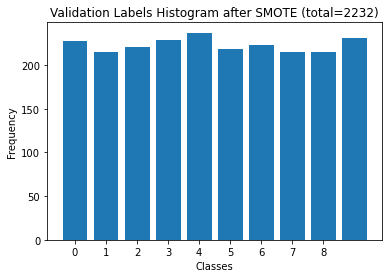

In [64]:
list_validation_labels_smote = list(validation_labels[0])

# Creating a histogram with specific bins
bins = range(class_start, max(list_validation_labels_smote) + 2 + class_start)  # +2 to include the last bin edge
plt.hist(list_validation_labels_smote, bins=bins, align='left', rwidth=0.8)

# Adding labels and title
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title(f'Validation Labels Histogram after SMOTE (total={len(list_validation_labels_smote)})')

# Set x-axis ticks to ensure all classes are shown
plt.xticks(range(class_start, max(list_validation_labels_smote) + class_start))

# Show the plot
plt.show()

In [65]:
training_set

,0,1,2,3,4,5,6,7,8,9,...,2096,2097,2098,2099,2100,2101,2102,2103,2104,2105
7138,0.596078,0.594535,0.592991,0.589070,0.590613,0.594535,0.596913,0.599291,0.597748,0.598457,...,0.577305,0.578849,0.582770,0.585148,0.589070,0.588235,0.586692,0.589070,0.592157,0.591322
2481,0.552941,0.552941,0.552941,0.556863,0.556863,0.556863,0.556863,0.556863,0.560784,0.560784,...,0.568627,0.568627,0.568627,0.568627,0.564706,0.564706,0.568627,0.572549,0.572549,0.568627
432,0.572549,0.568627,0.568627,0.572549,0.572549,0.568627,0.572549,0.576471,0.576471,0.580392,...,0.588235,0.592157,0.596078,0.588235,0.592157,0.592157,0.596078,0.596078,0.592157,0.588235
2594,0.560784,0.560784,0.560784,0.564706,0.564706,0.564706,0.564706,0.564706,0.564706,0.564706,...,0.564706,0.564706,0.564706,0.564706,0.560784,0.568627,0.560784,0.568627,0.568627,0.529412
1034,0.588235,0.584314,0.584314,0.584314,0.588235,0.592157,0.592157,0.592157,0.588235,0.588235,...,0.584314,0.584314,0.584314,0.584314,0.584314,0.588235,0.584314,0.588235,0.588235,0.576471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3041,0.568627,0.564706,0.564706,0.568627,0.572549,0.572549,0.568627,0.568627,0.568627,0.572549,...,0.564706,0.568627,0.568627,0.568627,0.568627,0.576471,0.568627,0.564706,0.549020,0.498039
5206,0.592157,0.594952,0.591031,0.588235,0.588235,0.589362,0.589362,0.589362,0.586566,0.585440,...,0.569754,0.573675,0.576471,0.579266,0.581518,0.580392,0.581518,0.581518,0.581518,0.577597
1562,0.588235,0.588235,0.592157,0.596078,0.596078,0.596078,0.596078,0.596078,0.596078,0.596078,...,0.584314,0.588235,0.592157,0.592157,0.592157,0.596078,0.596078,0.596078,0.596078,0.584314
6927,0.564706,0.564706,0.564706,0.566453,0.568627,0.570802,0.570802,0.570802,0.570802,0.570802,...,0.564706,0.562531,0.566453,0.568627,0.568627,0.568627,0.566453,0.568200,0.556435,0.511979


In [66]:
validation_set

,0,1,2,3,4,5,6,7,8,9,...,2096,2097,2098,2099,2100,2101,2102,2103,2104,2105
2,0.584314,0.584314,0.588235,0.584314,0.584314,0.584314,0.584314,0.584314,0.584314,0.588235,...,0.576471,0.576471,0.576471,0.584314,0.588235,0.588235,0.588235,0.588235,0.584314,0.584314
5,0.588235,0.588235,0.588235,0.588235,0.588235,0.592157,0.588235,0.588235,0.584314,0.584314,...,0.572549,0.576471,0.584314,0.588235,0.588235,0.588235,0.584314,0.588235,0.592157,0.588235
7,0.592157,0.596078,0.592157,0.584314,0.588235,0.592157,0.592157,0.592157,0.588235,0.592157,...,0.588235,0.584314,0.584314,0.584314,0.584314,0.584314,0.588235,0.588235,0.588235,0.588235
17,0.584314,0.584314,0.584314,0.584314,0.584314,0.588235,0.588235,0.588235,0.588235,0.588235,...,0.584314,0.584314,0.588235,0.588235,0.588235,0.584314,0.588235,0.584314,0.584314,0.584314
18,0.564706,0.560784,0.560784,0.564706,0.568627,0.568627,0.568627,0.568627,0.572549,0.576471,...,0.580392,0.584314,0.588235,0.584314,0.584314,0.584314,0.588235,0.588235,0.588235,0.588235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7420,0.571013,0.573742,0.573145,0.575874,0.583121,0.584314,0.581585,0.578260,0.577663,0.581585,...,0.557459,0.560784,0.560784,0.561381,0.565302,0.561381,0.561381,0.564706,0.564706,0.568627
7422,0.566377,0.568627,0.572549,0.572549,0.570298,0.570298,0.570298,0.568627,0.570878,0.574800,...,0.564126,0.566377,0.568627,0.568627,0.568047,0.568047,0.571389,0.569718,0.549020,0.498039
7429,0.586242,0.586242,0.591160,0.591160,0.590163,0.588701,0.586242,0.586242,0.587704,0.587704,...,0.587239,0.593619,0.600000,0.600000,0.595082,0.591160,0.592157,0.594616,0.566168,0.522100
7430,0.599953,0.600000,0.596125,0.596172,0.596172,0.596125,0.592204,0.596172,0.604063,0.607984,...,0.584314,0.584314,0.584361,0.588282,0.588235,0.588235,0.592110,0.592157,0.588282,0.588282


In [67]:
validation_labels

,0
2,9
5,5
7,1
17,1
18,3
...,...
7420,9
7422,9
7429,9
7430,9


In [68]:
# save as csv
training_set.to_csv('training_set.csv', header=False, index=False)
training_labels.to_csv('training_labels.csv', header=False, index=False)
validation_set.to_csv('validation_set.csv', header=False, index=False)
validation_labels.to_csv('validation_labels.csv', header=False, index=False)

In [69]:
# convert to_numpy

In [70]:
# determining number of nodes per hidden layer
# nodes_hidden_layer_1, nodes_hidden_layer_2 = int((354-8)/2), int((354-8)/4) # 173, 86
# nodes_hidden_layer_1, nodes_hidden_layer_2 = 50, 30 # ayaw gumana nito
nodes_hidden_layer_1, nodes_hidden_layer_2 = 500, 500
print(nodes_hidden_layer_1, nodes_hidden_layer_2 )

500 500


In [71]:
# fan-in 1
validation_set.shape[1] # 2106 features (pixels) per digit

2106

In [72]:
# initialize weights from [-2.4/Fi, 2.4/Fi] where Fi is the fan-in (total number of inputs) of neuron i
fan_in_1 = validation_set.shape[1] # 2106
fan_in_2 = nodes_hidden_layer_1 # 500
fan_in_3 = nodes_hidden_layer_2 # 500


In [73]:
# define learning rate and momentum constants
# eta = 0.85 # learning rate parameter --> diverges
# eta = 0.3 # --> diverges still....
eta = 0.01 # --> diverges still....
# eta = 0.1 # --> diverges still....
alpha = 0.9 # momentum constant
# alpha = 0.5 # momentum constant --> diverges still....

# initialize previoius weights
hidden_layer_1_delta_weights_previous = 0
hidden_layer_2_delta_weights_previous = 0
out_delta_weights_previous = 0

In [74]:
# input layer ay row vector x = [x1,...,x354] 1 by 354 (add 1 sa harap later for bias)
# whole input layer: X = [[x_1],
#                        [x_2],
#                        [x_12200]] 12200 (number of training samplex) by 354 (number of features)
# weights ay matrix W = [[weight1 towards node1, w1 towards node2,...w1 towards node173]
#                         ,..., 
#                        [w354 towards node1, w354 towards node2,..., w354 towards node173]] 354 by 173
# bias ay row vector b = [b1, ..., b354] 1 by 354

# kung idadagdag yung bias... (sa case na ito hindi na idadagdag...)
# weights with bias ay (1 + 354) by 173 = 355 by 173 (idagdag sa pinakaunang row)
# input layer ay x = [1, x1, ..., x354] 1 by (1 + 354) (idagdag sa pinakaunang row)
# output ay x @ W

# determine unique number of classes in output 
no_classes_out = len(df_data_labels_smote[0].unique())

# initialize random weight matrix 
weights_1 = np.random.uniform(-2.4/fan_in_1,2.4/fan_in_1,[fan_in_1+1, fan_in_2]) # hidden layer 1
weights_2 = np.random.uniform(-2.4/fan_in_2,2.4/fan_in_2,[fan_in_2+1, fan_in_3]) # hidden layer 2
weights_out = np.random.uniform(-2.4/fan_in_3,2.4/fan_in_3,[fan_in_3+1, no_classes_out]) # output layer
# np.zeros(shape=(fan_in_1,))
# bias_1 = np.random.uniform(-2.4/fan_in_1,2.4/fan_in_1,[1, fan_in_1])

training_set = np.hstack((np.ones(shape=(training_set.shape[0],1)), training_set)) # add bias as first column
validation_set = np.hstack((np.ones(shape=(validation_set.shape[0],1)), validation_set)) # add bias as first column

In [75]:
weights_1.shape

(2107, 500)

In [76]:
weights_2.shape

(501, 500)

In [77]:
weights_out.shape

(501, 10)

In [78]:
training_set.shape # 1736 samples x 2106 features (pixels) each sample + 1 bias

(5208, 2107)

In [13]:
# define activation function
# leaky ReLU

def leaky_ReLU(x, slope_parameter=0.01):
    
    leaky_x = np.where(x > 0, x, x * slope_parameter)  
    
    return leaky_x

def leaky_ReLU_derivative(x, slope_parameter=0.01):
    
    leaky_x_derivative = np.where(x > 0, 1, slope_parameter)  
    
    return leaky_x_derivative

def sigmoid(x, slope_parameter=2.0):
    
    return 1 / (1 + np.exp(-x*slope_parameter))

def sigmoid_derivative(x, slope_parameter=2.0):
    
    return sigmoid(x, slope_parameter) * (1 - sigmoid(x, slope_parameter)) * slope_parameter

def tanh_activation(x, a=1.716, b=2/3):
    
    return a * np.tanh(b * x)

def tanh_derivative(x, a=1.716, b=2/3):
    
    return b/a * (a - np.tanh(x)**2) * (a + np.tanh(x))

In [80]:
# encode training_labels as one-hot 
training_labels_np = training_labels.to_numpy().T
training_labels_one_hot = np.zeros((training_labels_np.size, training_labels_np.max() + 1))
training_labels_one_hot[np.arange(training_labels_np.size), training_labels_np] = 1


# 1-8 kasi yung classification, pero inaassume niya na 0-8 (if class_start == 1)
training_labels_one_hot = training_labels_one_hot[:,class_start:] # drop first column (if class_start == 1)

In [81]:
# encode validation_labels as one-hot 
validation_labels_np = validation_labels.to_numpy().T
validation_labels_one_hot = np.zeros((validation_labels_np.size, validation_labels_np.max() + 1))
validation_labels_one_hot[np.arange(validation_labels_np.size), validation_labels_np] = 1

# 1-8 kasi yung classification, pero inaassume niya na 0-8 (if class_start == 1)
validation_labels_one_hot = validation_labels_one_hot[:,class_start:] # drop first column (if class_start == 1)

In [82]:
training_labels_np

array([[9, 7, 2, ..., 6, 9, 1]])

In [83]:
training_labels_one_hot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [84]:
training_set.shape

(5208, 2107)

In [85]:
# # Activation functions

# activation_function_hidden = leaky_ReLU
# activation_function_derivative_hidden = leaky_ReLU_derivative


# activation_function_output = sigmoid
# activation_function_derivative_output = sigmoid_derivative

# # choices are:
# '''
# leaky_ReLU(x, slope_parameter=0.01)
# leaky_ReLU_derivative(x, slope_parameter=0.01)

# sigmoid(x, slope_parameter=2.0)
# sigmoid_derivative(x, slope_parameter=2.0)
    
# tanh_activation(x, a=1.716, b=2/3)
# tanh_derivative(x, a=1.716, b=2/3)
# '''


# # Batch size
# batch_size = 10
# num_epochs = 20


# # Training loop with mini-batch
# num_samples = len(training_set)

            
# for epoch in range(num_epochs):

#     sum_squared_errors_epoch = 0  # Accumulator for the sum of squared errors in the current epoch

#     for i in range(0, num_samples, batch_size):
#         # Select mini-batch
#         mini_batch_input = training_set[i:i+batch_size]
#         mini_batch_labels = training_labels_one_hot[i:i+batch_size]

#         # Forward propagation
#         v_hidden_layer_1 = mini_batch_input @ weights_1 # internal activity
#         y_hidden_layer_1 = activation_function_hidden(v_hidden_layer_1) # activation function
#         y_hidden_layer_1 = np.hstack((np.ones(shape=(y_hidden_layer_1.shape[0], 1)), y_hidden_layer_1)) # add bias as first column

#         v_hidden_layer_2 = y_hidden_layer_1 @ weights_2 # internal activity
#         y_hidden_layer_2 = activation_function_hidden(v_hidden_layer_2) # activation function
#         y_hidden_layer_2 = np.hstack((np.ones(shape=(y_hidden_layer_2.shape[0], 1)), y_hidden_layer_2)) # add bias as first column

#         v_out_layer = y_hidden_layer_2 @ weights_out # internal activity
#         y_out_layer = activation_function_output(v_out_layer) # activation function


#         # Calculate error
#         out_error = mini_batch_labels - y_out_layer
# #         total_out_error = np.linalg.norm(out_error)
#         sum_squared_errors = np.sum(out_error**2)  # Sum of squared errors

# #         print('total_out_error', total_out_error)
#         print('sum_squared_errors', sum_squared_errors)

#         # Back propagation
#         y_out_derivative = activation_function_derivative_output(y_out_layer)
#         out_delta = y_out_derivative * out_error
#         out_delta_weights = eta * y_hidden_layer_2.T @ out_delta

# #         y_hidden_layer_2_derivative = leaky_ReLU_derivative(y_hidden_layer_2)
# #         hidden_layer_2_delta = y_hidden_layer_2_derivative * (out_delta @ weights_out.T)
# #         hidden_layer_2_delta_weights = eta * y_hidden_layer_1.T @ hidden_layer_2_delta[:, 1:]

# #         y_hidden_layer_1_derivative = leaky_ReLU_derivative(y_hidden_layer_1)
# #         hidden_layer_1_delta = y_hidden_layer_1_derivative * (hidden_layer_2_delta[:, 1:] @ weights_2.T)
# #         hidden_layer_1_delta_weights = eta * mini_batch_input.T @ hidden_layer_1_delta[:, 1:]

#         # calculate hidden layer 2 backpropagation
#         y_hidden_layer_2_derivative = activation_function_derivative_hidden(y_hidden_layer_2) # derivative of leaky ReLU
#         hidden_layer_2_delta = (y_hidden_layer_2_derivative.T * (weights_out @ out_delta.T)).T 
#         hidden_layer_2_delta_weights = eta*np.dot(y_hidden_layer_1.T, hidden_layer_2_delta)
#         hidden_layer_2_delta_weights = hidden_layer_2_delta_weights[:,1:] # drop first column
#         hidden_layer_2_delta = hidden_layer_2_delta[:,1:] # drop first column

#         # calculate hidden layer 1 backpropagation
#         y_hidden_layer_1_derivative = activation_function_derivative_hidden(y_hidden_layer_1) # derivative of leaky ReLU
#         hidden_layer_1_delta = (y_hidden_layer_1_derivative.T * (weights_2 @ hidden_layer_2_delta.T)).T 
#         hidden_layer_1_delta_weights = eta*np.dot(mini_batch_input.T, hidden_layer_1_delta)
#         hidden_layer_1_delta_weights = hidden_layer_1_delta_weights[:,1:] # drop first column


#         # Update weights
#         weights_1 += hidden_layer_1_delta_weights + alpha * hidden_layer_1_delta_weights_previous
#         weights_2 += hidden_layer_2_delta_weights + alpha * hidden_layer_2_delta_weights_previous
#         weights_out += out_delta_weights + alpha * out_delta_weights_previous

#         # Update previous weights
#         hidden_layer_1_delta_weights_previous = hidden_layer_1_delta_weights
#         hidden_layer_2_delta_weights_previous = hidden_layer_2_delta_weights
#         out_delta_weights_previous = out_delta_weights


# Choosing number of nodes

In [86]:
# # weights are totally random 

# # Activation functions

# activation_function_hidden = leaky_ReLU
# activation_function_derivative_hidden = leaky_ReLU_derivative


# activation_function_output = sigmoid
# activation_function_derivative_output = sigmoid_derivative

# # choices are:
# '''
# leaky_ReLU(x, slope_parameter=0.01)
# leaky_ReLU_derivative(x, slope_parameter=0.01)

# sigmoid(x, slope_parameter=2.0)
# sigmoid_derivative(x, slope_parameter=2.0)
    
# tanh_activation(x, a=1.716, b=2/3)
# tanh_derivative(x, a=1.716, b=2/3)
# '''

# input_size = training_set.shape[1] # 12200 samples x 354 features each sample + 1 bias (input size: 355)
# output_size = len(df_data_labels[0].unique()) # Set your output size

# # Batch size
# batch_size = 10
# num_epochs = 20


# # Training loop with mini-batch
# num_samples = len(training_set)

# # Set the number of nodes for hidden layers
# # nodes_hidden_layer_1_values = [50, 100, 150]  # You can add more values if needed
# # nodes_hidden_layer_2_values = [30, 60, 90]   # You can add more values if needed
# nodes_hidden_layer_1_values = [500, 1000, 1500]  # You can add more values if needed
# nodes_hidden_layer_2_values = [500, 1000, 1500]   # You can add more values if needed

# # Initialize a dictionary to store errors for each combination of nodes
# errors = {}

# # Initialize a dictionary to store time
# times_nodes = {}

# for nodes_hidden_layer_1 in nodes_hidden_layer_1_values:
#     for nodes_hidden_layer_2 in nodes_hidden_layer_2_values:

#         # start time
#         start_time = time.time()
        
#         # Initialize weights and previous weights for each learning rate
#         np.random.seed(42)
#         # Initialize weights with appropriate dimensions based on the number of nodes
#         weights_1 = np.random.rand(input_size, nodes_hidden_layer_1)
#         weights_2 = np.random.rand(nodes_hidden_layer_1 + 1, nodes_hidden_layer_2)
#         weights_out = np.random.rand(nodes_hidden_layer_2 + 1, output_size)
#         # initialize random weight matrix 
# #         weights_1 = np.random.uniform(-2.4/fan_in_1,2.4/fan_in_1,[fan_in_1+1, fan_in_2]) # hidden layer 1
# #         weights_2 = np.random.uniform(-2.4/fan_in_2,2.4/fan_in_2,[fan_in_2+1, fan_in_3]) # hidden layer 2
# #         weights_out = np.random.uniform(-2.4/fan_in_3,2.4/fan_in_3,[fan_in_3+1, no_classes_out]) # output layer

#         # Initialize previous weights
#         hidden_layer_1_delta_weights_previous = 0
#         hidden_layer_2_delta_weights_previous = 0
#         out_delta_weights_previous = 0
            
#         sum_squared_errors_epoch_list = []  # List to store errors for each epoch
#         errors[(nodes_hidden_layer_1, nodes_hidden_layer_2)] = [] # List to store errors for each epoch
        
#         for epoch in range(num_epochs):

#             sum_squared_errors_epoch = 0  # Accumulator for the sum of squared errors in the current epoch

#             for i in range(0, num_samples, batch_size):
#                 # Select mini-batch
#                 mini_batch_input = training_set[i:i+batch_size]
#                 mini_batch_labels = training_labels_one_hot[i:i+batch_size]

#                 # Forward propagation
#                 v_hidden_layer_1 = mini_batch_input @ weights_1 # internal activity
#                 y_hidden_layer_1 = activation_function_hidden(v_hidden_layer_1) # activation function
#                 y_hidden_layer_1 = np.hstack((np.ones(shape=(y_hidden_layer_1.shape[0], 1)), y_hidden_layer_1)) # add bias as first column

#                 v_hidden_layer_2 = y_hidden_layer_1 @ weights_2 # internal activity
#                 y_hidden_layer_2 = activation_function_hidden(v_hidden_layer_2) # activation function
#                 y_hidden_layer_2 = np.hstack((np.ones(shape=(y_hidden_layer_2.shape[0], 1)), y_hidden_layer_2)) # add bias as first column

#                 v_out_layer = y_hidden_layer_2 @ weights_out # internal activity
#                 y_out_layer = activation_function_output(v_out_layer) # activation function


#                 # Calculate error
#                 out_error = mini_batch_labels - y_out_layer
#         #         total_out_error = np.linalg.norm(out_error)
#                 sum_squared_errors = np.sum(out_error**2)  # Sum of squared errors

#                 sum_squared_errors_epoch += sum_squared_errors # Update accumulator
#                 # Calculate and store sum of squared errors for the epoch
#                 sum_squared_errors_epoch_list.append(sum_squared_errors)
                
#         #         print('total_out_error', total_out_error)
# #                 print('sum_squared_errors', sum_squared_errors)

#                 # Back propagation
#                 y_out_derivative = activation_function_derivative_output(y_out_layer)
#                 out_delta = y_out_derivative * out_error
#                 out_delta_weights = eta * y_hidden_layer_2.T @ out_delta

#                 # calculate hidden layer 2 backpropagation
#                 y_hidden_layer_2_derivative = activation_function_derivative_hidden(y_hidden_layer_2) # derivative of leaky ReLU
#                 hidden_layer_2_delta = (y_hidden_layer_2_derivative.T * (weights_out @ out_delta.T)).T 
#                 hidden_layer_2_delta_weights = eta*np.dot(y_hidden_layer_1.T, hidden_layer_2_delta)
#                 hidden_layer_2_delta_weights = hidden_layer_2_delta_weights[:,1:] # drop first column
#                 hidden_layer_2_delta = hidden_layer_2_delta[:,1:] # drop first column

#                 # calculate hidden layer 1 backpropagation
#                 y_hidden_layer_1_derivative = activation_function_derivative_hidden(y_hidden_layer_1) # derivative of leaky ReLU
#                 hidden_layer_1_delta = (y_hidden_layer_1_derivative.T * (weights_2 @ hidden_layer_2_delta.T)).T 
#                 hidden_layer_1_delta_weights = eta*np.dot(mini_batch_input.T, hidden_layer_1_delta)
#                 hidden_layer_1_delta_weights = hidden_layer_1_delta_weights[:,1:] # drop first column


#                 # Update weights
#                 weights_1 += hidden_layer_1_delta_weights + alpha * hidden_layer_1_delta_weights_previous
#                 weights_2 += hidden_layer_2_delta_weights + alpha * hidden_layer_2_delta_weights_previous
#                 weights_out += out_delta_weights + alpha * out_delta_weights_previous

#                 # Update previous weights
#                 hidden_layer_1_delta_weights_previous = hidden_layer_1_delta_weights
#                 hidden_layer_2_delta_weights_previous = hidden_layer_2_delta_weights
#                 out_delta_weights_previous = out_delta_weights
            
#             # store error per epoch
#             errors[(nodes_hidden_layer_1, nodes_hidden_layer_2)] += [sum_squared_errors_epoch]
            
#         end_time = time.time()
#         iteration_time = end_time - start_time
#         times_nodes[(nodes_hidden_layer_1, nodes_hidden_layer_2)] = iteration_time
        
        
#         print('done for ', (nodes_hidden_layer_1, nodes_hidden_layer_2), 'time: ', iteration_time)

In [87]:
# times_nodes

In [88]:
# # Unpack the keys (x, y) and values (time) for plotting
# labels = [str(key) for key in times_nodes.keys()]
# time_values = list(times_nodes.values())

# # Bar graph
# plt.bar(labels, time_values, color='blue')

# # Set axis labels
# plt.xlabel('Node Pairs')
# plt.ylabel('Time Values')

# # Set plot title
# plt.title('Time for 20 Epochs of Node Pairs (random weights)')

# # Rotate x-axis labels for better readability
# plt.xticks(rotation=45, ha='right')

# # Show the plot
# plt.show()

In [89]:
# # Create a single plot for all errors on hidden layers 1 & 2 node combinations
# plt.figure(figsize=(12, 8))

# for classification, error_list in errors.items():
#     plt.plot(range(1, len(error_list) + 1), error_list, label=f"# Nodes (HL1, HL2): {classification}")

# plt.title('Hidden layers 1 & 2 number of nodes (Weight initialization which are random)')
# plt.xlabel('Epoch')
# plt.ylabel('Sum of Squared errors')
# plt.legend()
# plt.grid(True)
# plt.show()

In [372]:
# weights use fan-in function

# Activation functions

activation_function_hidden = leaky_ReLU
activation_function_derivative_hidden = leaky_ReLU_derivative


activation_function_output = sigmoid
activation_function_derivative_output = sigmoid_derivative

# choices are:
'''
leaky_ReLU(x, slope_parameter=0.01)
leaky_ReLU_derivative(x, slope_parameter=0.01)

sigmoid(x, slope_parameter=2.0)
sigmoid_derivative(x, slope_parameter=2.0)
    
tanh_activation(x, a=1.716, b=2/3)
tanh_derivative(x, a=1.716, b=2/3)
'''

input_size = training_set.shape[1] # 12200 samples x 354 features each sample + 1 bias (input size: 355)
output_size = len(df_data_labels[0].unique()) # Set your output size

# Batch size
batch_size = 10
num_epochs = 15


# Training loop with mini-batch
num_samples = len(training_set)

# Set the number of nodes for hidden layers
# nodes_hidden_layer_1_values = [50, 100, 150]  # You can add more values if needed
# nodes_hidden_layer_2_values = [30, 60, 90]   # You can add more values if needed
nodes_hidden_layer_1_values = [250, 500, 750]  # You can add more values if needed
nodes_hidden_layer_2_values = [250, 500, 750]   # You can add more values if needed
# nodes_hidden_layer_1_values = [500]  # You can add more values if needed
# nodes_hidden_layer_2_values = [500]   # You can add more values if needed

# Initialize a dictionary to store errors for each combination of nodes
errors = {}

# Initialize a dictionary to store time
times_nodes = {}


# initialize random weight matrix 
weights_1 = np.random.uniform(-2.4/fan_in_1,2.4/fan_in_1,[fan_in_1+1, fan_in_2]) # hidden layer 1
weights_2 = np.random.uniform(-2.4/fan_in_2,2.4/fan_in_2,[fan_in_2+1, fan_in_3]) # hidden layer 2
weights_out = np.random.uniform(-2.4/fan_in_3,2.4/fan_in_3,[fan_in_3+1, no_classes_out]) # output layer
        
for nodes_hidden_layer_1 in nodes_hidden_layer_1_values:
    for nodes_hidden_layer_2 in nodes_hidden_layer_2_values:

        # start time
        start_time = time.time()
        
#         # Initialize weights with appropriate dimensions based on the number of nodes
#         weights_1 = np.random.rand(input_size, nodes_hidden_layer_1)
#         weights_2 = np.random.rand(nodes_hidden_layer_1 + 1, nodes_hidden_layer_2)
#         weights_out = np.random.rand(nodes_hidden_layer_2 + 1, output_size)
        # initialize random weight matrix 
        weights_1 = np.array(weights_1) # hidden layer 1
        weights_2 = np.array(weights_2)  # hidden layer 2
        weights_out = np.array(weights_out)  # output layer

        # Initialize previous weights
        hidden_layer_1_delta_weights_previous = 0
        hidden_layer_2_delta_weights_previous = 0
        out_delta_weights_previous = 0
            
        sum_squared_errors_epoch_list = []  # List to store errors for each epoch
        errors[(nodes_hidden_layer_1, nodes_hidden_layer_2)] = [] # List to store errors for each epoch
        
        for epoch in range(num_epochs):

            sum_squared_errors_epoch = 0  # Accumulator for the sum of squared errors in the current epoch

            for i in range(0, num_samples, batch_size):
                # Select mini-batch
                mini_batch_input = training_set[i:i+batch_size]
                mini_batch_labels = training_labels_one_hot[i:i+batch_size]

                # Forward propagation
                v_hidden_layer_1 = mini_batch_input @ weights_1 # internal activity
                y_hidden_layer_1 = activation_function_hidden(v_hidden_layer_1) # activation function
                y_hidden_layer_1 = np.hstack((np.ones(shape=(y_hidden_layer_1.shape[0], 1)), y_hidden_layer_1)) # add bias as first column

                v_hidden_layer_2 = y_hidden_layer_1 @ weights_2 # internal activity
                y_hidden_layer_2 = activation_function_hidden(v_hidden_layer_2) # activation function
                y_hidden_layer_2 = np.hstack((np.ones(shape=(y_hidden_layer_2.shape[0], 1)), y_hidden_layer_2)) # add bias as first column

                v_out_layer = y_hidden_layer_2 @ weights_out # internal activity
                y_out_layer = activation_function_output(v_out_layer) # activation function


                # Calculate error
                out_error = mini_batch_labels - y_out_layer
        #         total_out_error = np.linalg.norm(out_error)
                sum_squared_errors = np.sum(out_error**2)  # Sum of squared errors

                sum_squared_errors_epoch += sum_squared_errors # Update accumulator
                # Calculate and store sum of squared errors for the epoch
                sum_squared_errors_epoch_list.append(sum_squared_errors)
                
        #         print('total_out_error', total_out_error)
#                 print('sum_squared_errors', sum_squared_errors)

                # Back propagation
                y_out_derivative = activation_function_derivative_output(y_out_layer)
                out_delta = y_out_derivative * out_error
                out_delta_weights = eta * y_hidden_layer_2.T @ out_delta

                # calculate hidden layer 2 backpropagation
                y_hidden_layer_2_derivative = activation_function_derivative_hidden(y_hidden_layer_2) # derivative of leaky ReLU
                hidden_layer_2_delta = (y_hidden_layer_2_derivative.T * (weights_out @ out_delta.T)).T 
                hidden_layer_2_delta_weights = eta*np.dot(y_hidden_layer_1.T, hidden_layer_2_delta)
                hidden_layer_2_delta_weights = hidden_layer_2_delta_weights[:,1:] # drop first column
                hidden_layer_2_delta = hidden_layer_2_delta[:,1:] # drop first column

                # calculate hidden layer 1 backpropagation
                y_hidden_layer_1_derivative = activation_function_derivative_hidden(y_hidden_layer_1) # derivative of leaky ReLU
                hidden_layer_1_delta = (y_hidden_layer_1_derivative.T * (weights_2 @ hidden_layer_2_delta.T)).T 
                hidden_layer_1_delta_weights = eta*np.dot(mini_batch_input.T, hidden_layer_1_delta)
                hidden_layer_1_delta_weights = hidden_layer_1_delta_weights[:,1:] # drop first column


                # Update weights
                weights_1 += hidden_layer_1_delta_weights + alpha * hidden_layer_1_delta_weights_previous
                weights_2 += hidden_layer_2_delta_weights + alpha * hidden_layer_2_delta_weights_previous
                weights_out += out_delta_weights + alpha * out_delta_weights_previous

                # Update previous weights
                hidden_layer_1_delta_weights_previous = hidden_layer_1_delta_weights
                hidden_layer_2_delta_weights_previous = hidden_layer_2_delta_weights
                out_delta_weights_previous = out_delta_weights
            
            # store error per epoch
            errors[(nodes_hidden_layer_1, nodes_hidden_layer_2)] += [sum_squared_errors_epoch]
            
        end_time = time.time()
        iteration_time = end_time - start_time
        times_nodes[(nodes_hidden_layer_1, nodes_hidden_layer_2)] = iteration_time
        
        
        print('done for ', (nodes_hidden_layer_1, nodes_hidden_layer_2), 'time: ', iteration_time)

done for  (250, 250) time:  69.37661504745483
done for  (250, 500) time:  68.9195122718811
done for  (250, 750) time:  69.65480208396912
done for  (500, 250) time:  69.4372878074646
done for  (500, 500) time:  70.76209497451782
done for  (500, 750) time:  70.8367018699646
done for  (750, 250) time:  71.93900108337402
done for  (750, 500) time:  71.82131671905518
done for  (750, 750) time:  70.28696179389954


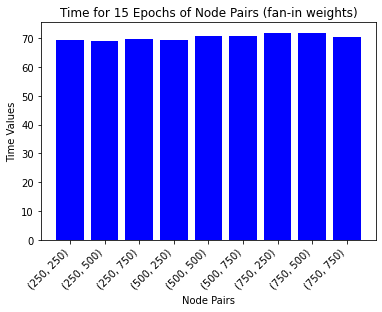

In [373]:
# Unpack the keys (x, y) and values (time) for plotting
labels = [str(key) for key in times_nodes.keys()]
time_values = list(times_nodes.values())

# Bar graph
plt.bar(labels, time_values, color='blue')

# Set axis labels
plt.xlabel('Node Pairs')
plt.ylabel('Time Values')

# Set plot title
plt.title(f'Time for {num_epochs} Epochs of Node Pairs (fan-in weights)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

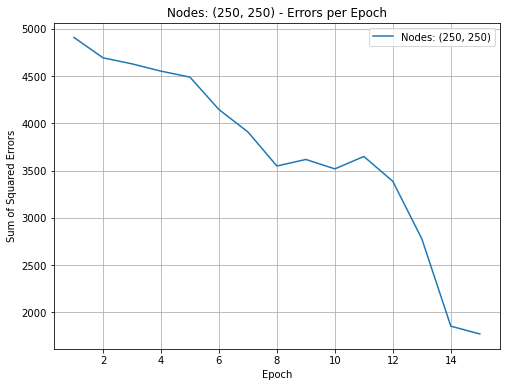

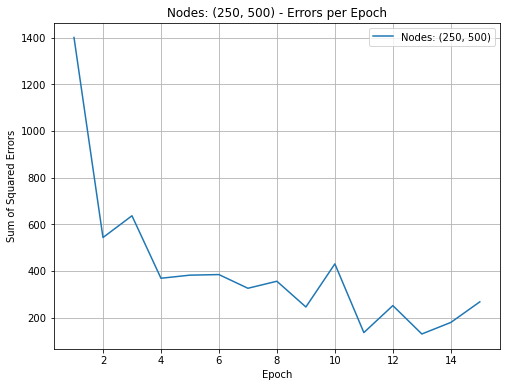

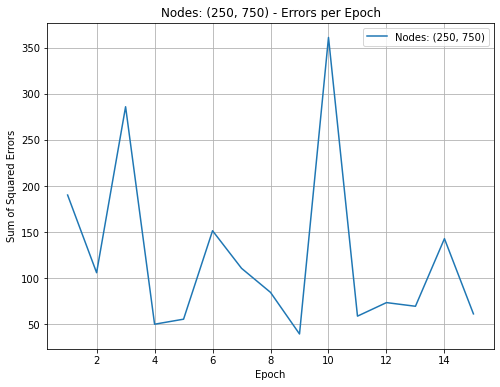

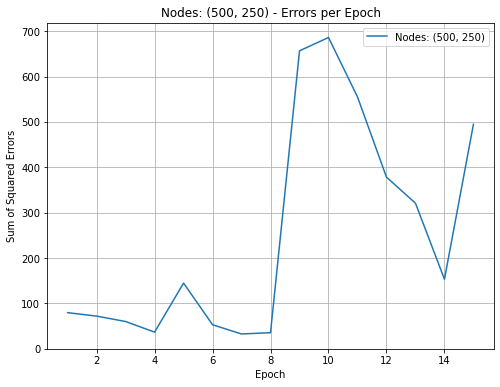

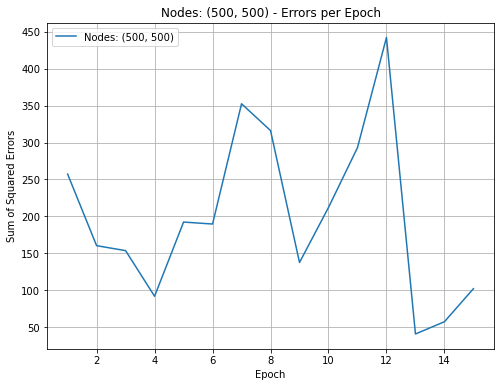

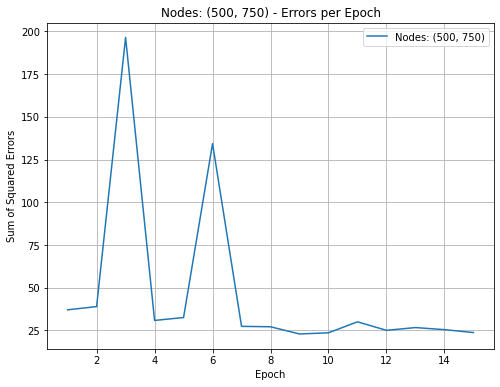

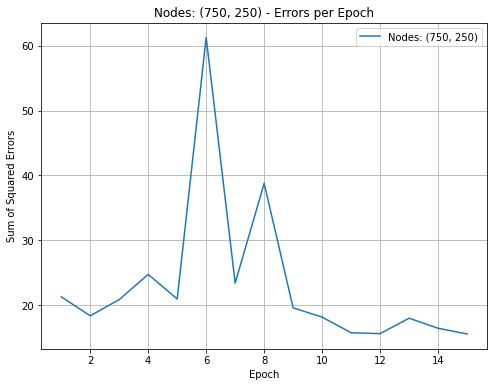

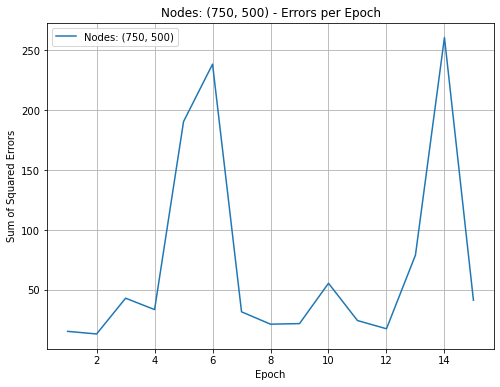

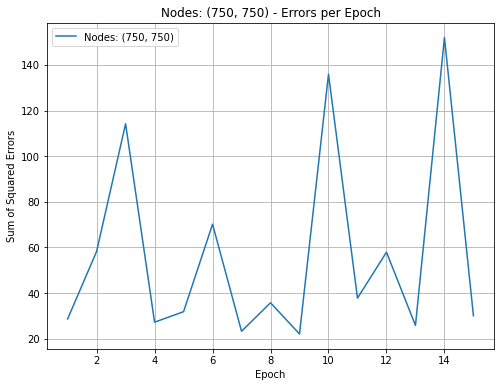

In [374]:
# Create separate plots for errors per epoch for each combination of nodes
for nodes_combination, error_list in errors.items():
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, num_epochs + 1), error_list, label=f"Nodes: {nodes_combination}")

    plt.title(f'Nodes: {nodes_combination} - Errors per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Sum of Squared Errors')
    plt.legend()
    plt.grid(True)
    plt.show()

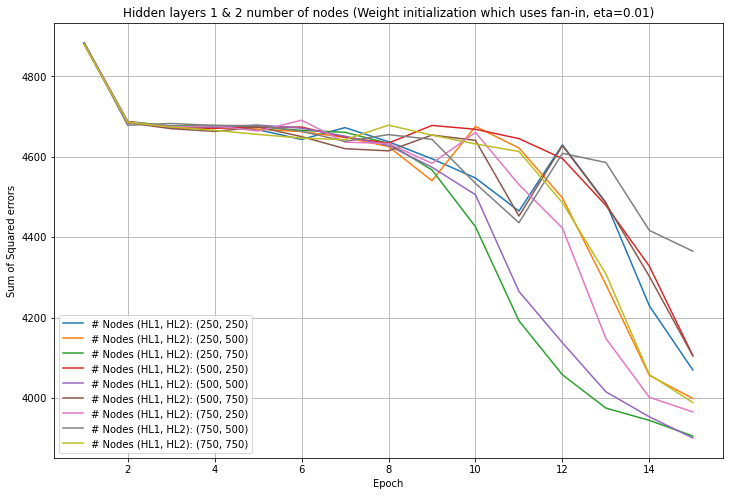

In [94]:
# Create a single plot for all errors on hidden layers 1 & 2 node combinations
plt.figure(figsize=(12, 8))

for classification, error_list in errors.items():
    plt.plot(range(1, len(error_list) + 1), error_list, label=f"# Nodes (HL1, HL2): {classification}")

plt.title(f'Hidden layers 1 & 2 number of nodes (Weight initialization which uses fan-in, eta={eta})')
plt.xlabel('Epoch')
plt.ylabel('Sum of Squared errors')
plt.legend()
plt.grid(True)
plt.show()

In [95]:
for classification, error_list in errors.items():
    print(f"# Nodes (HL1, HL2): {classification}; min error: {min(error_list)}")

# Nodes (HL1, HL2): (250, 250); min error: 4069.476555951958
# Nodes (HL1, HL2): (250, 500); min error: 3998.5614278315857
# Nodes (HL1, HL2): (250, 750); min error: 3905.2465855113414
# Nodes (HL1, HL2): (500, 250); min error: 4104.976021520773
# Nodes (HL1, HL2): (500, 500); min error: 3900.29861906073
# Nodes (HL1, HL2): (500, 750); min error: 4104.726987073919
# Nodes (HL1, HL2): (750, 250); min error: 3965.1762051372166
# Nodes (HL1, HL2): (750, 500); min error: 4365.030216231969
# Nodes (HL1, HL2): (750, 750); min error: 3988.587448206314


# Choosing Learning Rate

Testing with Learning Rate: 0.001
Epoch 1, Sum of Squared Errors: 6117.952529383207
Epoch 2, Sum of Squared Errors: 4696.660396664448
Epoch 3, Sum of Squared Errors: 4694.924700222123
Epoch 4, Sum of Squared Errors: 4693.728411765118
Epoch 5, Sum of Squared Errors: 4692.801147077141
Epoch 6, Sum of Squared Errors: 4692.007595835253
Epoch 7, Sum of Squared Errors: 4691.262996755905
Epoch 8, Sum of Squared Errors: 4690.499878249233
Epoch 9, Sum of Squared Errors: 4689.650515366219
Epoch 10, Sum of Squared Errors: 4688.630665182466
Epoch 11, Sum of Squared Errors: 4687.312758411805
Epoch 12, Sum of Squared Errors: 4685.477482914211
Epoch 13, Sum of Squared Errors: 4682.682460554755
Epoch 14, Sum of Squared Errors: 4677.898224821707
Epoch 15, Sum of Squared Errors: 4668.212796357909
Testing with Learning Rate: 0.01
Epoch 1, Sum of Squared Errors: 4879.45604491656
Epoch 2, Sum of Squared Errors: 4689.280294920523
Epoch 3, Sum of Squared Errors: 4679.172940811736
Epoch 4, Sum of Squared Erro

<ipython-input-79-8375b1f463b3>:18: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x*slope_parameter))
<ipython-input-96-2af0c256fcef>:90: RuntimeWarning: overflow encountered in matmul
  v_out_layer = y_hidden_layer_2 @ weights_out # internal activity
<ipython-input-96-2af0c256fcef>:90: RuntimeWarning: invalid value encountered in matmul
  v_out_layer = y_hidden_layer_2 @ weights_out # internal activity


Epoch 1, Sum of Squared Errors: nan
Epoch 2, Sum of Squared Errors: nan
Epoch 3, Sum of Squared Errors: nan
Epoch 4, Sum of Squared Errors: nan
Epoch 5, Sum of Squared Errors: nan
Epoch 6, Sum of Squared Errors: nan
Epoch 7, Sum of Squared Errors: nan
Epoch 8, Sum of Squared Errors: nan
Epoch 9, Sum of Squared Errors: nan
Epoch 10, Sum of Squared Errors: nan
Epoch 11, Sum of Squared Errors: nan
Epoch 12, Sum of Squared Errors: nan
Epoch 13, Sum of Squared Errors: nan
Epoch 14, Sum of Squared Errors: nan
Epoch 15, Sum of Squared Errors: nan


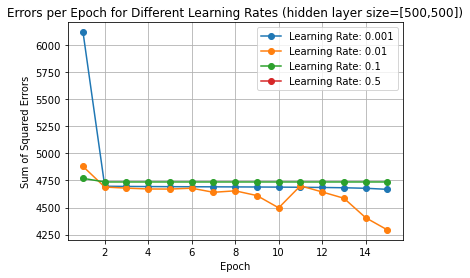

In [96]:
# Activation functions

activation_function_hidden = leaky_ReLU
activation_function_derivative_hidden = leaky_ReLU_derivative


activation_function_output = sigmoid
activation_function_derivative_output = sigmoid_derivative

# choices are:
'''
leaky_ReLU(x, slope_parameter=0.01)
leaky_ReLU_derivative(x, slope_parameter=0.01)

sigmoid(x, slope_parameter=2.0)
sigmoid_derivative(x, slope_parameter=2.0)
    
tanh_activation(x, a=1.716, b=2/3)
tanh_derivative(x, a=1.716, b=2/3)
'''


# set sizes
input_size = training_set.shape[1] # 12200 samples x 354 features each sample + 1 bias (input size: 355)
output_size = len(df_data_labels[0].unique()) # Set your output size
# hidden_layer_size_1 = 100
# hidden_layer_size_2 = 30

# Batch size
batch_size = 10
num_epochs = 15


# Training loop with mini-batch
num_samples = len(training_set)

# Arrays to store errors per epoch
sum_squared_errors_per_epoch = []


# Learning rate parameters to test
eta_values = [0.001, 0.01, 0.1, 0.5]

# Arrays to store errors per epoch for each learning rate
sum_squared_errors_per_epoch_per_eta = []

for eta in eta_values:
    print(f'Testing with Learning Rate: {eta}')

    # Initialize weights and previous weights for each learning rate
    np.random.seed(42)
    # initialize random weight matrix 
    weights_1 = np.random.uniform(-2.4/fan_in_1,2.4/fan_in_1,[fan_in_1+1, fan_in_2]) # hidden layer 1
    weights_2 = np.random.uniform(-2.4/fan_in_2,2.4/fan_in_2,[fan_in_2+1, fan_in_3]) # hidden layer 2
    weights_out = np.random.uniform(-2.4/fan_in_3,2.4/fan_in_3,[fan_in_3+1, no_classes_out]) # output layer

    # Initialize previous weights for each learning rate
#     hidden_layer_1_delta_weights_previous = np.zeros_like(weights_1)
#     hidden_layer_2_delta_weights_previous = np.zeros_like(weights_2)
#     out_delta_weights_previous = np.zeros_like(weights_out)
    # initialize previoius weights
    hidden_layer_1_delta_weights_previous = 0
    hidden_layer_2_delta_weights_previous = 0
    out_delta_weights_previous = 0
    
    # Arrays to store errors per epoch for the current learning rate
    sum_squared_errors_per_epoch = []

    # Training loop with mini-batch
    num_samples = len(training_set)
            
    for epoch in range(num_epochs):

        sum_squared_errors_epoch = 0  # Accumulator for the sum of squared errors in the current epoch

        for i in range(0, num_samples, batch_size):
            # Select mini-batch
            mini_batch_input = training_set[i:i+batch_size]
            mini_batch_labels = training_labels_one_hot[i:i+batch_size]

            # Forward propagation
            v_hidden_layer_1 = mini_batch_input @ weights_1 # internal activity
            y_hidden_layer_1 = activation_function_hidden(v_hidden_layer_1) # activation function
            y_hidden_layer_1 = np.hstack((np.ones(shape=(y_hidden_layer_1.shape[0], 1)), y_hidden_layer_1)) # add bias as first column

            v_hidden_layer_2 = y_hidden_layer_1 @ weights_2 # internal activity
            y_hidden_layer_2 = activation_function_hidden(v_hidden_layer_2) # activation function
            y_hidden_layer_2 = np.hstack((np.ones(shape=(y_hidden_layer_2.shape[0], 1)), y_hidden_layer_2)) # add bias as first column

            v_out_layer = y_hidden_layer_2 @ weights_out # internal activity
            y_out_layer = activation_function_output(v_out_layer) # activation function


            # Calculate error
            out_error = mini_batch_labels - y_out_layer
    #         total_out_error = np.linalg.norm(out_error)
            sum_squared_errors = np.sum(out_error**2)  # Sum of squared errors
            sum_squared_errors_epoch += sum_squared_errors  # Accumulate the error for this mini-batch

    #         print('total_out_error', total_out_error)
    #         print('sum_squared_errors', sum_squared_errors)

            # Back propagation
            y_out_derivative = activation_function_derivative_output(y_out_layer)
            out_delta = y_out_derivative * out_error
            out_delta_weights = eta * y_hidden_layer_2.T @ out_delta


            # calculate hidden layer 2 backpropagation
            y_hidden_layer_2_derivative = activation_function_derivative_hidden(y_hidden_layer_2) # derivative of leaky ReLU
            hidden_layer_2_delta = (y_hidden_layer_2_derivative.T * (weights_out @ out_delta.T)).T 
            hidden_layer_2_delta_weights = eta*np.dot(y_hidden_layer_1.T, hidden_layer_2_delta)
            hidden_layer_2_delta_weights = hidden_layer_2_delta_weights[:,1:] # drop first column
            hidden_layer_2_delta = hidden_layer_2_delta[:,1:] # drop first column

            # calculate hidden layer 1 backpropagation
            y_hidden_layer_1_derivative = activation_function_derivative_hidden(y_hidden_layer_1) # derivative of leaky ReLU
            hidden_layer_1_delta = (y_hidden_layer_1_derivative.T * (weights_2 @ hidden_layer_2_delta.T)).T 
            hidden_layer_1_delta_weights = eta*np.dot(mini_batch_input.T, hidden_layer_1_delta)
            hidden_layer_1_delta_weights = hidden_layer_1_delta_weights[:,1:] # drop first column


            # Update weights
            weights_1 += hidden_layer_1_delta_weights + alpha * hidden_layer_1_delta_weights_previous
            weights_2 += hidden_layer_2_delta_weights + alpha * hidden_layer_2_delta_weights_previous
            weights_out += out_delta_weights + alpha * out_delta_weights_previous

            # Update previous weights
            hidden_layer_1_delta_weights_previous = hidden_layer_1_delta_weights
            hidden_layer_2_delta_weights_previous = hidden_layer_2_delta_weights
            out_delta_weights_previous = out_delta_weights

        
        # Store the sum of squared errors for this epoch
        sum_squared_errors_per_epoch.append(sum_squared_errors_epoch)

        # Print the sum of squared errors for this epoch
        print(f'Epoch {epoch + 1}, Sum of Squared Errors: {sum_squared_errors_epoch}')
        
    # Store the errors per epoch for the current learning rate
    sum_squared_errors_per_epoch_per_eta.append(sum_squared_errors_per_epoch)


# Plot the errors per epoch for each learning rate
for i, eta in enumerate(eta_values):
    plt.plot(range(1, num_epochs + 1), sum_squared_errors_per_epoch_per_eta[i], marker='o', label=f'Learning Rate: {eta}')

plt.xlabel('Epoch')
plt.ylabel('Sum of Squared Errors')
plt.title('Errors per Epoch for Different Learning Rates (hidden layer size=[500,500])')
plt.legend()
plt.grid(True)
plt.show()

# Choosing momentum term

sum_squared_errors 25.01878882051249
sum_squared_errors 24.399607997201095
sum_squared_errors 23.58342145532898
sum_squared_errors 22.855893908432304
sum_squared_errors 22.082886200864582
sum_squared_errors 21.43484473984873
sum_squared_errors 20.842329125133723
sum_squared_errors 20.22137094008916
sum_squared_errors 19.56283359834168
sum_squared_errors 18.943028028982724
sum_squared_errors 18.43079702842221
sum_squared_errors 18.048925446178323
sum_squared_errors 17.4248759126907
sum_squared_errors 17.060577550549297
sum_squared_errors 16.603231030156458
sum_squared_errors 16.207886808249015
sum_squared_errors 15.785231865256662
sum_squared_errors 15.398541835495472
sum_squared_errors 15.028765468541522
sum_squared_errors 14.712413207444493
sum_squared_errors 14.326235200541587
sum_squared_errors 14.024757855163983
sum_squared_errors 13.450190484802308
sum_squared_errors 13.082871992953825
sum_squared_errors 12.526414873052042
sum_squared_errors 12.005465957725516
sum_squared_errors 1

sum_squared_errors 9.095813163883172
sum_squared_errors 8.86214136552103
sum_squared_errors 8.903858632780397
sum_squared_errors 9.050343401851503
sum_squared_errors 8.804095562010003
sum_squared_errors 9.072001141965398
sum_squared_errors 9.183956555178781
sum_squared_errors 8.891691831199147
sum_squared_errors 8.938216498893395
sum_squared_errors 9.231092183410063
sum_squared_errors 9.022814512953714
sum_squared_errors 8.98915953520732
sum_squared_errors 9.10305657763256
sum_squared_errors 9.005031663102463
sum_squared_errors 8.954897141133936
sum_squared_errors 8.981181136814469
sum_squared_errors 9.108179522428749
sum_squared_errors 8.820129900250265
sum_squared_errors 9.108033502885286
sum_squared_errors 9.0782028882096
sum_squared_errors 8.934802752937157
sum_squared_errors 9.240355838306348
sum_squared_errors 9.13957942014992
sum_squared_errors 9.052344632009923
sum_squared_errors 9.272476320702363
sum_squared_errors 8.983473872824858
sum_squared_errors 8.985296551825984
sum_squ

sum_squared_errors 9.029297861969475
sum_squared_errors 8.878923114690075
sum_squared_errors 8.915742266657592
sum_squared_errors 8.867582418660557
sum_squared_errors 9.17980684150263
sum_squared_errors 9.061431647915326
sum_squared_errors 8.99482126064945
sum_squared_errors 9.041230092354127
sum_squared_errors 8.837753489564431
sum_squared_errors 8.882754287057447
sum_squared_errors 8.931380949439394
sum_squared_errors 9.249173618387955
sum_squared_errors 9.082704564733097
sum_squared_errors 9.018189259921533
sum_squared_errors 8.965664615117241
sum_squared_errors 9.03116983608843
sum_squared_errors 9.179410276286958
sum_squared_errors 9.049354307416284
sum_squared_errors 8.988803506001512
sum_squared_errors 9.159667800045382
sum_squared_errors 8.8440841011599
sum_squared_errors 9.136377439442835
sum_squared_errors 8.973469744771897
sum_squared_errors 9.057668162626165
sum_squared_errors 9.024928544175921
sum_squared_errors 9.072268324320207
sum_squared_errors 9.072254343770528
sum_sq

sum_squared_errors 8.997980221308236
sum_squared_errors 9.036704850623714
sum_squared_errors 8.995544390631816
sum_squared_errors 9.082196277131452
sum_squared_errors 9.121477275909125
sum_squared_errors 9.01815752180733
sum_squared_errors 8.978052534995966
sum_squared_errors 9.068844092123953
sum_squared_errors 9.051379509770033
sum_squared_errors 8.959411095827921
sum_squared_errors 9.000922365729535
sum_squared_errors 9.009518416728003
sum_squared_errors 8.928634751385156
sum_squared_errors 9.013997048082128
sum_squared_errors 8.878877716672724
sum_squared_errors 9.033053629725407
sum_squared_errors 9.137040946544975
sum_squared_errors 9.132734993034727
sum_squared_errors 9.114669417423276
sum_squared_errors 8.964431651197728
sum_squared_errors 9.100322063066866
sum_squared_errors 9.01158019953592
sum_squared_errors 8.981387662723355
sum_squared_errors 8.9524611219838
sum_squared_errors 9.014840417294101
sum_squared_errors 9.049907421405566
sum_squared_errors 9.05636619203247
sum_sq

sum_squared_errors 9.031194299324573
sum_squared_errors 8.966892497805013
sum_squared_errors 8.964697585035754
sum_squared_errors 9.113225608055783
sum_squared_errors 9.04051634480766
sum_squared_errors 8.962073582436101
sum_squared_errors 9.060610313756174
sum_squared_errors 9.13469661596722
sum_squared_errors 8.981345490130096
sum_squared_errors 9.033004243851645
sum_squared_errors 9.0668398096315
sum_squared_errors 8.95599950024801
sum_squared_errors 8.964538665803085
sum_squared_errors 8.972269591732527
sum_squared_errors 8.902958919313935
sum_squared_errors 9.081114781412943
sum_squared_errors 8.95754156324878
sum_squared_errors 9.040924145429274
sum_squared_errors 8.952224396313778
sum_squared_errors 9.106755625396062
sum_squared_errors 9.028329740463516
sum_squared_errors 8.991673617082606
sum_squared_errors 8.967110702818768
sum_squared_errors 9.084423430340696
sum_squared_errors 8.894884978345143
sum_squared_errors 9.025743512571324
sum_squared_errors 8.977545531147875
sum_squ

sum_squared_errors 9.285887524534925
sum_squared_errors 9.168046264379038
sum_squared_errors 9.028373785226908
sum_squared_errors 8.903628052787736
sum_squared_errors 8.874683673402368
sum_squared_errors 8.812242274058429
sum_squared_errors 8.95818163265764
sum_squared_errors 8.87927021080461
sum_squared_errors 9.28488586280231
sum_squared_errors 9.08847301639528
sum_squared_errors 8.973950736037565
sum_squared_errors 9.103442659753666
sum_squared_errors 9.059776868583915
sum_squared_errors 8.595040470427888
sum_squared_errors 9.395607107159902
sum_squared_errors 9.055078473647793
sum_squared_errors 8.565623480742413
sum_squared_errors 9.284280643312565
sum_squared_errors 8.852300042575834
sum_squared_errors 8.71393295341145
sum_squared_errors 8.896098595216307
sum_squared_errors 8.956040999295043
sum_squared_errors 8.943963998130933
sum_squared_errors 8.99156627125334
sum_squared_errors 8.708573679755709
sum_squared_errors 8.919571430205496
sum_squared_errors 9.163736838549605
sum_squ

sum_squared_errors 8.945744802540851
sum_squared_errors 9.047009431526853
sum_squared_errors 9.016698785145149
sum_squared_errors 8.761401907545759
sum_squared_errors 8.473701354284492
sum_squared_errors 8.058135705083506
sum_squared_errors 7.696697617762943
sum_squared_errors 9.924448402262952
sum_squared_errors 9.900528488992641
sum_squared_errors 8.86274381810604
sum_squared_errors 7.918834103484673
sum_squared_errors 10.630991604558073
sum_squared_errors 8.934774846706768
sum_squared_errors 9.157787324362479
sum_squared_errors 8.91100018402213
sum_squared_errors 8.993989305478319
sum_squared_errors 8.82556328489677
sum_squared_errors 8.811940009548074
sum_squared_errors 8.82099612205087
sum_squared_errors 9.022502207499716
sum_squared_errors 8.77855963567154
sum_squared_errors 8.825026467140022
sum_squared_errors 8.716358523617716
sum_squared_errors 8.73556132491095
sum_squared_errors 8.678482257857151
sum_squared_errors 9.079410108631901
sum_squared_errors 8.848486820963743
sum_sq

sum_squared_errors 9.372680665360987
sum_squared_errors 8.727891428339644
sum_squared_errors 8.56321902892163
sum_squared_errors 8.743071856760407
sum_squared_errors 9.1766081926984
sum_squared_errors 8.61274705002525
sum_squared_errors 8.807340877402059
sum_squared_errors 9.06460158233875
sum_squared_errors 8.570550223325395
sum_squared_errors 8.803392269075935
sum_squared_errors 8.554090711902882
sum_squared_errors 8.492164935805361
sum_squared_errors 8.821691186997699
sum_squared_errors 8.816203393186075
sum_squared_errors 9.23060207595786
sum_squared_errors 8.883397652047206
sum_squared_errors 8.673983607981745
sum_squared_errors 8.73503021051162
sum_squared_errors 8.702181416870259
sum_squared_errors 9.023893014999231
sum_squared_errors 8.881440409531535
sum_squared_errors 8.621285987697863
sum_squared_errors 8.844835622907262
sum_squared_errors 9.719326159460332
sum_squared_errors 8.760381821276308
sum_squared_errors 8.554382287515836
sum_squared_errors 8.720692272848726
sum_squa

sum_squared_errors 8.487523684346083
sum_squared_errors 8.367092087335037
sum_squared_errors 8.561816628579694
sum_squared_errors 9.505536290842386
sum_squared_errors 9.368173743720396
sum_squared_errors 8.4840242817633
sum_squared_errors 8.590272913073953
sum_squared_errors 8.88500059816555
sum_squared_errors 8.805947143476091
sum_squared_errors 8.678232032342756
sum_squared_errors 8.563513679299403
sum_squared_errors 8.85392200807426
sum_squared_errors 9.201621192187211
sum_squared_errors 8.483226020192753
sum_squared_errors 8.343088156582125
sum_squared_errors 8.427922805869308
sum_squared_errors 8.53284419360766
sum_squared_errors 8.560125377850492
sum_squared_errors 9.077787545449302
sum_squared_errors 9.8976418334179
sum_squared_errors 9.14461114567994
sum_squared_errors 8.769047398608265
sum_squared_errors 8.584226945553684
sum_squared_errors 8.465381610814285
sum_squared_errors 8.47229835502856
sum_squared_errors 8.321418117205747
sum_squared_errors 8.06927792240186
sum_squared

sum_squared_errors 8.761529342189597
sum_squared_errors 9.289812653791726
sum_squared_errors 8.697455624010239
sum_squared_errors 9.560842645943108
sum_squared_errors 9.224448804319133
sum_squared_errors 8.988127247349539
sum_squared_errors 9.031958648363549
sum_squared_errors 8.796318578509034
sum_squared_errors 9.10219547343065
sum_squared_errors 8.938140645188037
sum_squared_errors 8.987083506778864
sum_squared_errors 9.001315201792764
sum_squared_errors 9.059160895567159
sum_squared_errors 9.027372282393411
sum_squared_errors 8.775261593839186
sum_squared_errors 8.893559329346377
sum_squared_errors 8.976628155158318
sum_squared_errors 9.056325536520832
sum_squared_errors 8.867389247587662
sum_squared_errors 8.960244142490746
sum_squared_errors 8.960132572007034
sum_squared_errors 8.940999633172503
sum_squared_errors 8.749639450632333
sum_squared_errors 9.066125307845239
sum_squared_errors 8.790139567005907
sum_squared_errors 8.950576880632134
sum_squared_errors 8.987204986707997
su

sum_squared_errors 8.537789885182049
sum_squared_errors 8.427103894909775
sum_squared_errors 9.334373850946193
sum_squared_errors 8.759766685997613
sum_squared_errors 8.642506744765564
sum_squared_errors 9.42678470254906
sum_squared_errors 8.648933000791082
sum_squared_errors 9.246826337890028
sum_squared_errors 8.999721143883672
sum_squared_errors 9.067593901288387
sum_squared_errors 8.930603032407324
sum_squared_errors 8.913966404855293
sum_squared_errors 9.025701128905746
sum_squared_errors 8.800466891019484
sum_squared_errors 8.899145212537986
sum_squared_errors 8.74596149848808
sum_squared_errors 8.54894611816267
sum_squared_errors 8.692852035409953
sum_squared_errors 9.355667625785284
sum_squared_errors 8.930710079836356
sum_squared_errors 8.84268920020267
sum_squared_errors 9.262641749419465
sum_squared_errors 8.945555336141492
sum_squared_errors 8.926898418776348
sum_squared_errors 8.976479528755007
sum_squared_errors 8.819106922089489
sum_squared_errors 8.887756911875696
sum_s

sum_squared_errors 8.914720156519522
sum_squared_errors 8.799553509838285
sum_squared_errors 8.872439320153175
sum_squared_errors 9.087592024095253
sum_squared_errors 8.857451056001134
sum_squared_errors 8.836128246747492
sum_squared_errors 8.851760545104257
sum_squared_errors 8.984885812770461
sum_squared_errors 8.712912229091838
sum_squared_errors 8.831029227325539
sum_squared_errors 8.8566081695324
sum_squared_errors 8.938958411603036
sum_squared_errors 9.170026984489477
sum_squared_errors 8.99759936499557
sum_squared_errors 8.886323435056363
sum_squared_errors 8.956518555198278
sum_squared_errors 8.885824365982316
sum_squared_errors 8.925379357010897
sum_squared_errors 8.80195434688598
sum_squared_errors 8.816600589283347
sum_squared_errors 8.892402368969043
sum_squared_errors 8.63526463212116
sum_squared_errors 8.665699290765001
sum_squared_errors 8.52262283200886
sum_squared_errors 7.970281639777301
sum_squared_errors 9.96668710095964
sum_squared_errors 8.911114501937963
sum_squa

sum_squared_errors 8.896863104578522
sum_squared_errors 8.959112395580735
sum_squared_errors 8.926298991261246
sum_squared_errors 8.87172740430417
sum_squared_errors 8.825697980152803
sum_squared_errors 8.985360043420808
sum_squared_errors 8.794888276042744
sum_squared_errors 8.54974384228333
sum_squared_errors 8.370467125259431
sum_squared_errors 9.007454153494589
sum_squared_errors 8.886162015615193
sum_squared_errors 8.834320233199195
sum_squared_errors 8.889418742336753
sum_squared_errors 8.790717646510373
sum_squared_errors 8.709514717442278
sum_squared_errors 8.575600781472149
sum_squared_errors 9.041955120522395
sum_squared_errors 9.0128003347604
sum_squared_errors 8.96852072537345
sum_squared_errors 8.794153521613792
sum_squared_errors 8.912150422845109
sum_squared_errors 8.656355713846919
sum_squared_errors 8.838125089360984
sum_squared_errors 8.49266113474448
sum_squared_errors 9.207986921973724
sum_squared_errors 8.883581355567731
sum_squared_errors 8.820269093968976
sum_squ

sum_squared_errors 8.923568897957631
sum_squared_errors 9.090125341336115
sum_squared_errors 8.844530997470786
sum_squared_errors 8.914058584907288
sum_squared_errors 8.94142624545261
sum_squared_errors 8.823352734019341
sum_squared_errors 8.90607756748414
sum_squared_errors 8.805292160287603
sum_squared_errors 8.913184582346661
sum_squared_errors 8.82804090339485
sum_squared_errors 8.919377108822035
sum_squared_errors 8.99755414683075
sum_squared_errors 8.791745821902262
sum_squared_errors 8.868404507318852
sum_squared_errors 8.895738516626547
sum_squared_errors 8.805751737868478
sum_squared_errors 8.752136629183735
sum_squared_errors 8.991649582136073
sum_squared_errors 8.698106555442601
sum_squared_errors 8.805533129301093
sum_squared_errors 8.92019928386968
sum_squared_errors 8.880210637124858
sum_squared_errors 9.073145685652655
sum_squared_errors 8.935363545238998
sum_squared_errors 8.867927500240217
sum_squared_errors 8.95176669744729
sum_squared_errors 8.82611389697134
sum_squa

sum_squared_errors 9.000736376311306
sum_squared_errors 8.900016465431545
sum_squared_errors 9.021217345871168
sum_squared_errors 8.841159531949087
sum_squared_errors 8.778410320770007
sum_squared_errors 8.827083362201597
sum_squared_errors 8.994547653929503
sum_squared_errors 8.655447205218932
sum_squared_errors 8.784408565531885
sum_squared_errors 8.848898619795888
sum_squared_errors 8.775703165022682
sum_squared_errors 8.913605969956643
sum_squared_errors 8.849114151356261
sum_squared_errors 8.8442882389044
sum_squared_errors 7.81260944595624
sum_squared_errors 10.73811452948539
sum_squared_errors 8.884282040078247
sum_squared_errors 8.916735286780236
sum_squared_errors 9.123050657654165
sum_squared_errors 9.116091430414702
sum_squared_errors 8.971135459380418
sum_squared_errors 8.833084215303344
sum_squared_errors 8.998671452529821
sum_squared_errors 8.906200226157136
sum_squared_errors 8.86897540934982
sum_squared_errors 8.803888468673312
sum_squared_errors 8.708899872297902
sum_s

sum_squared_errors 8.963539664778311
sum_squared_errors 8.85311293648926
sum_squared_errors 8.910760909762873
sum_squared_errors 8.834903694462463
sum_squared_errors 8.83212049624829
sum_squared_errors 8.96839748220024
sum_squared_errors 8.876905805556344
sum_squared_errors 8.822643877597358
sum_squared_errors 8.846296698031171
sum_squared_errors 8.844940139356636
sum_squared_errors 8.762347536252669
sum_squared_errors 8.887119996247048
sum_squared_errors 8.85320743598983
sum_squared_errors 8.874825962179683
sum_squared_errors 8.942855583323237
sum_squared_errors 8.865165759317115
sum_squared_errors 8.949275857322
sum_squared_errors 8.859908436353608
sum_squared_errors 8.877159535305717
sum_squared_errors 8.863284357968768
sum_squared_errors 8.930251980312189
sum_squared_errors 8.802389808239825
sum_squared_errors 8.852244966061184
sum_squared_errors 8.7020223139428
sum_squared_errors 8.83292037230495
sum_squared_errors 9.024927953751451
sum_squared_errors 8.829705065791455
sum_squared

sum_squared_errors 8.70910887176777
sum_squared_errors 8.790785748264913
sum_squared_errors 8.919495543532387
sum_squared_errors 8.885713533254311
sum_squared_errors 8.815012970736836
sum_squared_errors 8.931213643493914
sum_squared_errors 8.87784002312675
sum_squared_errors 8.67070509041552
sum_squared_errors 8.878795063243945
sum_squared_errors 8.784474678493003
sum_squared_errors 8.821246925086104
sum_squared_errors 8.908207152612865
sum_squared_errors 8.552932511045212
sum_squared_errors 8.44651341879251
sum_squared_errors 9.488468064079132
sum_squared_errors 8.767189135484935
sum_squared_errors 8.811945423060989
sum_squared_errors 8.956197541765226
sum_squared_errors 8.73662386678698
sum_squared_errors 8.704165251219969
sum_squared_errors 8.670126406974523
sum_squared_errors 8.760168086049797
sum_squared_errors 8.676933651041583
sum_squared_errors 8.66933219250573
sum_squared_errors 8.754576421706334
sum_squared_errors 8.877074017000126
sum_squared_errors 8.769481383473936
sum_squ

sum_squared_errors 8.603501050821084
sum_squared_errors 8.724597138371873
sum_squared_errors 8.954237697930362
sum_squared_errors 8.547054103561912
sum_squared_errors 8.715085831221497
sum_squared_errors 8.609173140727375
sum_squared_errors 8.422226212849024
sum_squared_errors 8.87117250723707
sum_squared_errors 8.694335236302859
sum_squared_errors 8.554868887181605
sum_squared_errors 8.896249069685394
sum_squared_errors 8.703530488553055
sum_squared_errors 8.943194257753674
sum_squared_errors 8.6578139778707
sum_squared_errors 8.54528451501333
sum_squared_errors 8.597484117847088
sum_squared_errors 8.860599037378263
sum_squared_errors 8.672710580854625
sum_squared_errors 8.886190017178107
sum_squared_errors 8.590563489486529
sum_squared_errors 8.850065147910147
sum_squared_errors 8.790250569561191
sum_squared_errors 8.92371087620006
sum_squared_errors 8.73925228490825
sum_squared_errors 8.77763500360222
sum_squared_errors 8.817232153815143
sum_squared_errors 8.830611421372994
sum_squa

sum_squared_errors 8.776922943125713
sum_squared_errors 8.931253798100522
sum_squared_errors 8.79078391580897
sum_squared_errors 8.770803679556511
sum_squared_errors 8.604172063095557
sum_squared_errors 8.728724651709907
sum_squared_errors 8.895669692324061
sum_squared_errors 8.762201745191682
sum_squared_errors 8.674121052919528
sum_squared_errors 8.620599065894687
sum_squared_errors 8.522417630725133
sum_squared_errors 8.994622911402494
sum_squared_errors 8.629649176915095
sum_squared_errors 8.772444672687142
sum_squared_errors 8.764127505193036
sum_squared_errors 8.821912996352614
sum_squared_errors 8.49922505989838
sum_squared_errors 8.87247209196251
sum_squared_errors 8.49211435063776
sum_squared_errors 8.892578053701957
sum_squared_errors 8.672920996832369
sum_squared_errors 8.757337615230163
sum_squared_errors 8.796108131414544
sum_squared_errors 8.772685286753575
sum_squared_errors 8.633539392295894
sum_squared_errors 8.347387005266517
sum_squared_errors 8.802989666813973
sum_s

sum_squared_errors 8.537526242456192
sum_squared_errors 8.510578612343918
sum_squared_errors 8.717963541749455
sum_squared_errors 8.897511309564532
sum_squared_errors 8.562006299583494
sum_squared_errors 8.455162234709436
sum_squared_errors 8.852868683142393
sum_squared_errors 8.283869639208287
sum_squared_errors 8.694925490888966
sum_squared_errors 8.298507293341766
sum_squared_errors 8.921553133320304
sum_squared_errors 8.855163959684878
sum_squared_errors 8.445477218001264
sum_squared_errors 8.530873182048014
sum_squared_errors 8.431498543050088
sum_squared_errors 8.677541460814417
sum_squared_errors 8.840360426645988
sum_squared_errors 8.670633108896808
sum_squared_errors 8.396533216510111
sum_squared_errors 8.810239743027664
sum_squared_errors 8.975014161892252
sum_squared_errors 8.817325270013196
sum_squared_errors 8.716053225643806
sum_squared_errors 8.708884312805278
sum_squared_errors 8.544935843527051
sum_squared_errors 8.629120492858963
sum_squared_errors 8.795123269164863
s

sum_squared_errors 8.6769154618657
sum_squared_errors 8.496635384482941
sum_squared_errors 8.482094604224653
sum_squared_errors 8.739003069867621
sum_squared_errors 8.393024699865547
sum_squared_errors 8.509915923851905
sum_squared_errors 8.778495985312018
sum_squared_errors 8.631575488068403
sum_squared_errors 8.704413442966528
sum_squared_errors 8.658486141057466
sum_squared_errors 8.643966960404494
sum_squared_errors 8.533270673408623
sum_squared_errors 8.633451865060382
sum_squared_errors 8.838583941495147
sum_squared_errors 8.635136570161087
sum_squared_errors 8.730490159699064
sum_squared_errors 8.425630446169047
sum_squared_errors 8.311903079909442
sum_squared_errors 8.59585505990449
sum_squared_errors 8.345594095417809
sum_squared_errors 8.32309491044695
sum_squared_errors 8.647193261449535
sum_squared_errors 8.293949056173977
sum_squared_errors 8.468654192415487
sum_squared_errors 8.372703961323628
sum_squared_errors 8.561215404541686
sum_squared_errors 8.520787503497866
sum_s

sum_squared_errors 8.333396905243506
sum_squared_errors 8.558809202427788
sum_squared_errors 8.52768661152974
sum_squared_errors 8.312615764243638
sum_squared_errors 8.518499694925843
sum_squared_errors 8.337809462591894
sum_squared_errors 8.508199058887612
sum_squared_errors 8.43495906282572
sum_squared_errors 8.566420927129851
sum_squared_errors 8.20891954038841
sum_squared_errors 8.594719854469805
sum_squared_errors 8.5611077701443
sum_squared_errors 9.115317692425428
sum_squared_errors 8.55733420159969
sum_squared_errors 8.328342762996785
sum_squared_errors 8.441709973111372
sum_squared_errors 8.370792301258174
sum_squared_errors 8.717316840019366
sum_squared_errors 8.460926005344108
sum_squared_errors 8.751560807734158
sum_squared_errors 8.374352242871437
sum_squared_errors 8.447518593378888
sum_squared_errors 8.302040573493914
sum_squared_errors 8.610776062688434
sum_squared_errors 8.48298357168909
sum_squared_errors 8.622891948763542
sum_squared_errors 8.405619768165181
sum_squa

sum_squared_errors 7.967353375325015
sum_squared_errors 8.390948902421396
sum_squared_errors 8.067333480793131
sum_squared_errors 8.219163042390843
sum_squared_errors 8.468763041166577
sum_squared_errors 8.444590886036998
sum_squared_errors 8.468462579973592
sum_squared_errors 8.1816237997562
sum_squared_errors 8.575650792238973
sum_squared_errors 8.604361409545428
sum_squared_errors 8.565719413868349
sum_squared_errors 8.420175806047371
sum_squared_errors 8.158619094161843
sum_squared_errors 8.014681384952274
sum_squared_errors 8.417162496764409
sum_squared_errors 8.408830990724567
sum_squared_errors 8.325203213874863
sum_squared_errors 8.339034928610715
sum_squared_errors 8.64611824743192
sum_squared_errors 8.004586224293815
sum_squared_errors 8.415217907140788
sum_squared_errors 8.060976175305264
sum_squared_errors 8.323596462434152
sum_squared_errors 8.003033782423296
sum_squared_errors 8.47008384167952
sum_squared_errors 8.179001305448383
sum_squared_errors 8.161613232488481
sum_s

sum_squared_errors 7.441757627445846
sum_squared_errors 8.149230616886308
sum_squared_errors 8.589653211959241
sum_squared_errors 8.120893348685076
sum_squared_errors 8.22939280191687
sum_squared_errors 7.989354319265233
sum_squared_errors 7.834800563651056
sum_squared_errors 7.542727804514801
sum_squared_errors 7.664196999310173
sum_squared_errors 7.780485599278819
sum_squared_errors 8.568863334899932
sum_squared_errors 7.932694306769316
sum_squared_errors 8.453231502497822
sum_squared_errors 8.667290648520456
sum_squared_errors 6.261286772779105
sum_squared_errors 8.007558998347179
sum_squared_errors 7.823136117379627
sum_squared_errors 8.114855952008341
sum_squared_errors 8.045693433474154
sum_squared_errors 7.7773380120264255
sum_squared_errors 8.080625033609044
sum_squared_errors 7.877937226680996
sum_squared_errors 10.504079624553247
sum_squared_errors 8.103867316111595
sum_squared_errors 8.520702534152736
sum_squared_errors 8.421149589964338
sum_squared_errors 8.287569959526602


sum_squared_errors 7.378148926226071
sum_squared_errors 8.314801134788878
sum_squared_errors 8.167570567804994
sum_squared_errors 8.44285136579681
sum_squared_errors 7.835105704839297
sum_squared_errors 8.127851746015006
sum_squared_errors 8.335138995410363
sum_squared_errors 8.450139741269265
sum_squared_errors 7.993139087065961
sum_squared_errors 8.061497625585085
sum_squared_errors 8.459166640158871
sum_squared_errors 7.6083216150637965
sum_squared_errors 13.415398499276973
sum_squared_errors 9.802175351528124
sum_squared_errors 9.112139682791492
sum_squared_errors 8.877228437202117
sum_squared_errors 17.574112400130005
sum_squared_errors 9.98070582321293
sum_squared_errors 8.723572254113332
sum_squared_errors 9.987520027047692
sum_squared_errors 9.734507847954905
sum_squared_errors 9.202273071467909
sum_squared_errors 8.562213636287696
sum_squared_errors 8.534445494404746
sum_squared_errors 8.019761417813429
sum_squared_errors 8.304984435780334
sum_squared_errors 8.21099833706
sum_

sum_squared_errors 8.458105792717216
sum_squared_errors 7.8438678483774265
sum_squared_errors 8.151513092459982
sum_squared_errors 8.112956465389747
sum_squared_errors 8.3775374317586
sum_squared_errors 7.824414050295879
sum_squared_errors 7.432493567711463
sum_squared_errors 8.217596069350739
sum_squared_errors 7.101772557226814
sum_squared_errors 8.13971057075789
sum_squared_errors 8.057389721593006
sum_squared_errors 8.031561666770083
sum_squared_errors 8.11996396455871
sum_squared_errors 7.351899684291439
sum_squared_errors 7.985302037716569
sum_squared_errors 8.383433558664652
sum_squared_errors 8.582323289421616
sum_squared_errors 8.59518033678832
sum_squared_errors 7.668237220303278
sum_squared_errors 7.728526757154521
sum_squared_errors 8.116612361813566
sum_squared_errors 7.757762774693932
sum_squared_errors 8.239741717726917
sum_squared_errors 7.857028841115586
sum_squared_errors 10.029442493971258
sum_squared_errors 9.146405828717704
sum_squared_errors 8.833693545298294
sum_

sum_squared_errors 8.001663952875731
sum_squared_errors 7.198026729201221
sum_squared_errors 8.397124097954954
sum_squared_errors 8.5632704251442
sum_squared_errors 8.21887514527835
sum_squared_errors 8.211327782727006
sum_squared_errors 7.9484083918269555
sum_squared_errors 7.680995568805878
sum_squared_errors 8.001574958520742
sum_squared_errors 8.440860628305542
sum_squared_errors 8.045699654395253
sum_squared_errors 8.110591751108835
sum_squared_errors 8.192813579246879
sum_squared_errors 7.867350601218331
sum_squared_errors 8.105068562823599
sum_squared_errors 8.227419331749108
sum_squared_errors 8.021345378382268
sum_squared_errors 7.572110356759017
sum_squared_errors 7.532248026296223
sum_squared_errors 8.18237626603309
sum_squared_errors 7.636736877901139
sum_squared_errors 7.676976116299428
sum_squared_errors 7.3193495377323945
sum_squared_errors 8.015578098467998
sum_squared_errors 7.86199743602363
sum_squared_errors 8.316451490041004
sum_squared_errors 7.7106965665577665
sum

sum_squared_errors 7.623631510723556
sum_squared_errors 7.277593883900079
sum_squared_errors 7.09841256953145
sum_squared_errors 8.04735378050872
sum_squared_errors 7.051856009022951
sum_squared_errors 7.647720182060934
sum_squared_errors 7.456268602262064
sum_squared_errors 7.807610165726032
sum_squared_errors 7.782462645445833
sum_squared_errors 7.4331653565476214
sum_squared_errors 8.033536742870641
sum_squared_errors 7.531397650271487
sum_squared_errors 7.401886801317506
sum_squared_errors 7.51389611677129
sum_squared_errors 8.05675932649806
sum_squared_errors 8.1361148775846
sum_squared_errors 7.563747745900981
sum_squared_errors 7.645874151252334
sum_squared_errors 7.940886879184694
sum_squared_errors 7.789343929169915
sum_squared_errors 7.488368446887464
sum_squared_errors 7.967199799166032
sum_squared_errors 7.990730362325494
sum_squared_errors 8.056782461055244
sum_squared_errors 8.048033037892981
sum_squared_errors 7.9022538900998684
sum_squared_errors 8.245826124545538
sum_s

sum_squared_errors 7.5814256357115175
sum_squared_errors 7.781853552477214
sum_squared_errors 7.562376991002618
sum_squared_errors 7.879643363381676
sum_squared_errors 7.758879537236851
sum_squared_errors 8.09610803031678
sum_squared_errors 7.608981584316842
sum_squared_errors 7.623580762610372
sum_squared_errors 7.120354311564598
sum_squared_errors 7.808747082701971
sum_squared_errors 8.325893566878008
sum_squared_errors 7.766240440849324
sum_squared_errors 7.43376530416123
sum_squared_errors 8.103203252863068
sum_squared_errors 7.665753105175561
sum_squared_errors 7.575766020174717
sum_squared_errors 8.304069534040465
sum_squared_errors 7.135239677593582
sum_squared_errors 7.5220467256495995
sum_squared_errors 7.299616241446591
sum_squared_errors 7.82477516851244
sum_squared_errors 7.303357768890041
sum_squared_errors 8.242338560038487
sum_squared_errors 8.10661974921052
sum_squared_errors 8.099250853843197
sum_squared_errors 8.02248239621467
sum_squared_errors 7.836404752561085
sum_

sum_squared_errors 8.236604481332948
sum_squared_errors 7.340474058967793
sum_squared_errors 7.8033984615827245
sum_squared_errors 7.398045762525252
sum_squared_errors 7.668887512449545
sum_squared_errors 7.27214887181844
sum_squared_errors 7.9609025262141495
sum_squared_errors 7.334524798480085
sum_squared_errors 7.150263278357808
sum_squared_errors 8.165222396226495
sum_squared_errors 7.6739720263938205
sum_squared_errors 7.666545725239271
sum_squared_errors 7.904030588798135
sum_squared_errors 8.200614942348713
sum_squared_errors 6.946114522495748
sum_squared_errors 7.745873732240718
sum_squared_errors 8.135486928956224
sum_squared_errors 7.789990628339072
sum_squared_errors 7.947433264700112
sum_squared_errors 7.156843403607484
sum_squared_errors 6.975216386400939
sum_squared_errors 7.050952155250487
sum_squared_errors 8.42944142168263
sum_squared_errors 7.915614008955002
sum_squared_errors 7.1776995262802785
sum_squared_errors 6.8901254216507635
sum_squared_errors 8.13906282576863

sum_squared_errors 8.258656067282299
sum_squared_errors 5.751397867575811
sum_squared_errors 7.663404647178283
sum_squared_errors 7.325965328797235
sum_squared_errors 7.619176363823867
sum_squared_errors 7.460802307669903
sum_squared_errors 7.15816528116778
sum_squared_errors 7.522671021135258
sum_squared_errors 7.662022064225551
sum_squared_errors 8.169694119769808
sum_squared_errors 7.314058882497063
sum_squared_errors 7.539020135287236
sum_squared_errors 7.932490602047916
sum_squared_errors 7.824354136866832
sum_squared_errors 7.079559182986669
sum_squared_errors 7.788679342329297
sum_squared_errors 7.694378957169096
sum_squared_errors 8.165314595857781
sum_squared_errors 6.923737549491649
sum_squared_errors 8.065006035759033
sum_squared_errors 8.119598797670273
sum_squared_errors 7.583625734029157
sum_squared_errors 7.337403841437711
sum_squared_errors 7.428741881084723
sum_squared_errors 7.210051295499058
sum_squared_errors 8.098782979200989
sum_squared_errors 7.557088623449597
su

sum_squared_errors 7.58927882275534
sum_squared_errors 7.997971078667839
sum_squared_errors 7.452521785330274
sum_squared_errors 7.318235715254948
sum_squared_errors 7.472540187032781
sum_squared_errors 7.438638396360461
sum_squared_errors 7.847439467977525
sum_squared_errors 7.913410017512762
sum_squared_errors 7.8259660602159435
sum_squared_errors 7.395480132121184
sum_squared_errors 7.411047271993571
sum_squared_errors 7.755946124590434
sum_squared_errors 7.891447914183459
sum_squared_errors 6.942354489112412
sum_squared_errors 7.913852592510553
sum_squared_errors 7.540167858981306
sum_squared_errors 7.165509390097469
sum_squared_errors 7.192839114880624
sum_squared_errors 8.326336444987518
sum_squared_errors 7.822415792506479
sum_squared_errors 7.725013835959584
sum_squared_errors 7.205062472427524
sum_squared_errors 7.3979871836213
sum_squared_errors 7.814506835689905
sum_squared_errors 7.608578612372606
sum_squared_errors 7.614607289016526
sum_squared_errors 6.984050953106618
sum

sum_squared_errors 7.871297972573404
sum_squared_errors 7.000382328350221
sum_squared_errors 7.8447831159620875
sum_squared_errors 7.252900400449408
sum_squared_errors 7.157426425771386
sum_squared_errors 7.650001087069333
sum_squared_errors 6.775419864785658
sum_squared_errors 7.540833687353963
sum_squared_errors 7.944541295715749
sum_squared_errors 7.53740838160804
sum_squared_errors 6.754121591493144
sum_squared_errors 7.122951553686981
sum_squared_errors 7.03863679835542
sum_squared_errors 7.793756746396613
sum_squared_errors 7.504966636959775
sum_squared_errors 7.838815209009942
sum_squared_errors 7.603927002058797
sum_squared_errors 7.280640200390877
sum_squared_errors 7.413545811856238
sum_squared_errors 7.612689652555105
sum_squared_errors 8.222762508047905
sum_squared_errors 7.767332568428633
sum_squared_errors 7.424795359336798
sum_squared_errors 7.640664922487221
sum_squared_errors 7.527982884447774
sum_squared_errors 7.304535311497228
sum_squared_errors 6.912424138205638
su

sum_squared_errors 7.717169816674703
sum_squared_errors 7.6881528223378774
sum_squared_errors 7.304813316445711
sum_squared_errors 7.240182959383456
sum_squared_errors 7.826270889141161
sum_squared_errors 7.237730706879904
sum_squared_errors 7.260061801431464
sum_squared_errors 7.208809688334848
sum_squared_errors 7.583676180871729
sum_squared_errors 7.602950305230408
sum_squared_errors 8.04231449788363
sum_squared_errors 7.244287567162631
sum_squared_errors 7.4863329700157895
sum_squared_errors 7.580757584389329
sum_squared_errors 7.469204767612193
sum_squared_errors 7.621809970827649
sum_squared_errors 7.578377171407321
sum_squared_errors 8.058828182163962
sum_squared_errors 7.970132477272587
sum_squared_errors 7.207880768518591
sum_squared_errors 7.2423129767417205
sum_squared_errors 7.665691022322957
sum_squared_errors 7.530058582101768
sum_squared_errors 7.591407106471613
sum_squared_errors 7.3868188464435685
sum_squared_errors 7.678063344738866
sum_squared_errors 7.43684003160774

sum_squared_errors 8.017740462531325
sum_squared_errors 7.747978773594767
sum_squared_errors 7.449974928652567
sum_squared_errors 7.434309310705532
sum_squared_errors 7.801587072501296
sum_squared_errors 7.608917477595772
sum_squared_errors 7.097773963003935
sum_squared_errors 7.823007833628634
sum_squared_errors 7.938056232084304
sum_squared_errors 7.681776925116028
sum_squared_errors 7.788619532429404
sum_squared_errors 7.680703304629049
sum_squared_errors 7.875543115790351
sum_squared_errors 7.472747161797196
sum_squared_errors 7.653175967878011
sum_squared_errors 7.030838511852563
sum_squared_errors 7.267412153590613
sum_squared_errors 7.911943541799381
sum_squared_errors 7.815272562810797
sum_squared_errors 7.934948875959794
sum_squared_errors 7.826501834125734
sum_squared_errors 7.712914151408138
sum_squared_errors 7.521486725800218
sum_squared_errors 6.90852952030223
sum_squared_errors 7.566027821232369
sum_squared_errors 7.104125014984081
sum_squared_errors 7.466259213491765
su

sum_squared_errors 9.250697335966398
sum_squared_errors 8.951490141405982
sum_squared_errors 9.190170462701047
sum_squared_errors 9.262174450883913
sum_squared_errors 8.987914422649299
sum_squared_errors 8.879595115906092
sum_squared_errors 9.196028758281779
sum_squared_errors 8.800453039295633
sum_squared_errors 9.012892490618261
sum_squared_errors 9.378250129935024
sum_squared_errors 9.214977951053594
sum_squared_errors 8.98008437942102
sum_squared_errors 9.056358418351206
sum_squared_errors 9.01634822498779
sum_squared_errors 9.058253167886527
sum_squared_errors 8.872368116470716
sum_squared_errors 9.083804719109441
sum_squared_errors 8.75749474604378
sum_squared_errors 9.14660133261784
sum_squared_errors 8.79597218410792
sum_squared_errors 8.763249497523876
sum_squared_errors 8.71530144092634
sum_squared_errors 8.993148335745481
sum_squared_errors 8.971670888390666
sum_squared_errors 9.033134793535776
sum_squared_errors 9.256509817905679
sum_squared_errors 9.407552517576073
sum_squ

sum_squared_errors 9.066069460188034
sum_squared_errors 9.06724283703971
sum_squared_errors 8.96555868234888
sum_squared_errors 8.979431082852518
sum_squared_errors 8.957250850105867
sum_squared_errors 9.012809043175105
sum_squared_errors 8.87068478409175
sum_squared_errors 9.312987407460163
sum_squared_errors 8.991761327483877
sum_squared_errors 8.982614278069192
sum_squared_errors 8.86728825537971
sum_squared_errors 9.142837170977348
sum_squared_errors 9.136915681230745
sum_squared_errors 9.089772404827537
sum_squared_errors 9.026406266456457
sum_squared_errors 8.960551872953419
sum_squared_errors 8.906430889884529
sum_squared_errors 8.991393050066685
sum_squared_errors 8.920238624187636
sum_squared_errors 9.10867078325479
sum_squared_errors 8.961044352990296
sum_squared_errors 9.062981041246168
sum_squared_errors 8.846120420281949
sum_squared_errors 8.878278633210185
sum_squared_errors 9.09151234811493
sum_squared_errors 9.240549598225451
sum_squared_errors 9.272072525978874
sum_squ

sum_squared_errors 9.031339629173893
sum_squared_errors 9.042958883145108
sum_squared_errors 9.018835239135461
sum_squared_errors 9.08978303301496
sum_squared_errors 9.143124247260415
sum_squared_errors 8.932901743179896
sum_squared_errors 9.015061774901913
sum_squared_errors 8.900382843282223
sum_squared_errors 9.017449207866203
sum_squared_errors 9.02527824493671
sum_squared_errors 8.90423143975438
sum_squared_errors 9.07320669529068
sum_squared_errors 9.036903811127264
sum_squared_errors 8.911002894332803
sum_squared_errors 9.004123891497132
sum_squared_errors 9.14354312068367
sum_squared_errors 8.95972597130356
sum_squared_errors 8.939367867300621
sum_squared_errors 9.151287098116127
sum_squared_errors 9.010323255488423
sum_squared_errors 9.146060064407985
sum_squared_errors 9.115372890385734
sum_squared_errors 8.988946547797296
sum_squared_errors 8.914570971091914
sum_squared_errors 9.147451620069326
sum_squared_errors 9.108077739124173
sum_squared_errors 9.058990491268187
sum_squ

sum_squared_errors 9.086314639594354
sum_squared_errors 8.847923289627865
sum_squared_errors 9.005568171338684
sum_squared_errors 9.088303918775472
sum_squared_errors 8.988649636240586
sum_squared_errors 9.146399039315275
sum_squared_errors 9.136521030525513
sum_squared_errors 8.990112852081134
sum_squared_errors 9.176499035421811
sum_squared_errors 8.939901387979798
sum_squared_errors 8.969652941967793
sum_squared_errors 8.894633785530875
sum_squared_errors 8.997436497566989
sum_squared_errors 9.085226386491069
sum_squared_errors 9.120295300448932
sum_squared_errors 8.933433896428257
sum_squared_errors 9.074233684527368
sum_squared_errors 8.998947861780668
sum_squared_errors 9.008852353538556
sum_squared_errors 8.988191429653629
sum_squared_errors 8.941689036278806
sum_squared_errors 8.915868385009377
sum_squared_errors 9.100294151254564
sum_squared_errors 9.074800394409056
sum_squared_errors 8.87801395353556
sum_squared_errors 8.973639854461814
sum_squared_errors 9.199881280806279
su

sum_squared_errors 8.688238506001738
sum_squared_errors 9.008403570500475
sum_squared_errors 9.127096326247814
sum_squared_errors 8.72608974628258
sum_squared_errors 9.077874973746448
sum_squared_errors 8.850757166370332
sum_squared_errors 8.997865183383436
sum_squared_errors 8.683023981436824
sum_squared_errors 9.28984008441655
sum_squared_errors 9.034232583263709
sum_squared_errors 8.989312261340846
sum_squared_errors 9.18806515704023
sum_squared_errors 8.747279934314419
sum_squared_errors 9.068180161201306
sum_squared_errors 8.95741114675971
sum_squared_errors 9.036039180705433
sum_squared_errors 8.770887749829933
sum_squared_errors 9.056543486189426
sum_squared_errors 8.770465288536696
sum_squared_errors 9.13717180183122
sum_squared_errors 8.914335555202197
sum_squared_errors 8.986218816904916
sum_squared_errors 8.985482637383129
sum_squared_errors 8.898348468239323
sum_squared_errors 9.019222767791206
sum_squared_errors 8.999342543557955
sum_squared_errors 8.913365232664972
sum_sq

sum_squared_errors 9.4769853591146
sum_squared_errors 9.026133104843645
sum_squared_errors 8.89004105212367
sum_squared_errors 8.32370560071932
sum_squared_errors 8.759774850599058
sum_squared_errors 8.436188295809492
sum_squared_errors 8.501697502750913
sum_squared_errors 8.399541318644083
sum_squared_errors 8.670190428386386
sum_squared_errors 8.400390246822026
sum_squared_errors 8.1168815956398
sum_squared_errors 8.3075779557132
sum_squared_errors 8.776048519283595
sum_squared_errors 9.1039153047143
sum_squared_errors 8.686333048522323
sum_squared_errors 8.036739607867752
sum_squared_errors 8.198083709581221
sum_squared_errors 8.49244715010606
sum_squared_errors 8.64393178197313
sum_squared_errors 8.649006595448757
sum_squared_errors 8.970253194571756
sum_squared_errors 9.03019133528737
sum_squared_errors 8.39151582721194
sum_squared_errors 8.750529304299398
sum_squared_errors 9.210494870748137
sum_squared_errors 8.326510083641685
sum_squared_errors 9.374015418679344
sum_squared_err

sum_squared_errors 8.783224041661613
sum_squared_errors 8.82121894314438
sum_squared_errors 9.016027187159061
sum_squared_errors 8.684359868557145
sum_squared_errors 8.88559024376204
sum_squared_errors 8.915466428639798
sum_squared_errors 8.972538776351458
sum_squared_errors 8.72711119297179
sum_squared_errors 8.88893418606201
sum_squared_errors 8.77876430319272
sum_squared_errors 8.580006569714461
sum_squared_errors 8.715629671712014
sum_squared_errors 8.45566753835539
sum_squared_errors 9.194840380928863
sum_squared_errors 8.98852749030213
sum_squared_errors 9.270113832398073
sum_squared_errors 8.927752642740144
sum_squared_errors 9.175064899348541
sum_squared_errors 8.914556235396535
sum_squared_errors 9.042871161834084
sum_squared_errors 8.669348780552195
sum_squared_errors 8.711294105012904
sum_squared_errors 8.862389079597266
sum_squared_errors 8.584532986573013
sum_squared_errors 8.569669208413153
sum_squared_errors 8.406708253396102
sum_squared_errors 7.937978740170712
sum_squa

sum_squared_errors 8.80929205492003
sum_squared_errors 9.252966327896162
sum_squared_errors 9.134793086489958
sum_squared_errors 9.031677262858155
sum_squared_errors 8.930391018023087
sum_squared_errors 8.840900575550341
sum_squared_errors 9.027540841494659
sum_squared_errors 8.825134212733753
sum_squared_errors 8.345983074555148
sum_squared_errors 8.190154986671182
sum_squared_errors 9.056545782486118
sum_squared_errors 8.784489924428588
sum_squared_errors 8.820709592712968
sum_squared_errors 9.02321285120228
sum_squared_errors 8.908629478364032
sum_squared_errors 8.809557833511885
sum_squared_errors 8.620139327559711
sum_squared_errors 9.156763713438705
sum_squared_errors 8.979697219931534
sum_squared_errors 9.034670733337531
sum_squared_errors 8.80683301204598
sum_squared_errors 8.87061870142808
sum_squared_errors 8.602485917764108
sum_squared_errors 8.768083254788989
sum_squared_errors 8.299137084039566
sum_squared_errors 9.252552655481386
sum_squared_errors 8.862854200153679
sum_s

sum_squared_errors 8.757732649301946
sum_squared_errors 8.693978287244894
sum_squared_errors 9.092564098889484
sum_squared_errors 8.953450340322899
sum_squared_errors 8.910818288679716
sum_squared_errors 8.900117537892044
sum_squared_errors 8.697524331005857
sum_squared_errors 9.152425129151688
sum_squared_errors 8.875828476765209
sum_squared_errors 8.858336600758776
sum_squared_errors 8.90223345907831
sum_squared_errors 8.822076120900634
sum_squared_errors 8.88982420921803
sum_squared_errors 8.806027349580745
sum_squared_errors 9.113060934966096
sum_squared_errors 8.796444725719022
sum_squared_errors 8.96050511704526
sum_squared_errors 8.803726807553332
sum_squared_errors 8.770589378190905
sum_squared_errors 9.023032635033873
sum_squared_errors 9.114775447467188
sum_squared_errors 8.797503539443893
sum_squared_errors 9.084100686863668
sum_squared_errors 9.001673652433237
sum_squared_errors 9.335857565284826
sum_squared_errors 9.082612044801373
sum_squared_errors 8.963803566267135
sum_

sum_squared_errors 8.751403297590466
sum_squared_errors 8.81472195992462
sum_squared_errors 9.08307864664478
sum_squared_errors 8.990551579988338
sum_squared_errors 8.810644301284274
sum_squared_errors 9.037330343054686
sum_squared_errors 8.848751337898092
sum_squared_errors 8.79534359259143
sum_squared_errors 8.830948401428516
sum_squared_errors 9.145907834569941
sum_squared_errors 8.729892759364002
sum_squared_errors 8.95527870620121
sum_squared_errors 8.9492126479625
sum_squared_errors 8.861759620690524
sum_squared_errors 9.058284710147593
sum_squared_errors 8.936556242724023
sum_squared_errors 8.979434252962843
sum_squared_errors 8.968696043154395
sum_squared_errors 9.114537917698792
sum_squared_errors 8.88628132446244
sum_squared_errors 8.9546271732097
sum_squared_errors 9.046770179216635
sum_squared_errors 9.050475354977618
sum_squared_errors 8.982585429023892
sum_squared_errors 8.89833482570459
sum_squared_errors 9.044303662687907
sum_squared_errors 8.998632064141418
sum_squared

sum_squared_errors 8.979321561565293
sum_squared_errors 8.794353584273644
sum_squared_errors 8.750293670383282
sum_squared_errors 8.876895566373653
sum_squared_errors 9.20415912934827
sum_squared_errors 8.84154849167214
sum_squared_errors 9.003204357534088
sum_squared_errors 8.970926159240253
sum_squared_errors 8.896743879206577
sum_squared_errors 8.975063495644855
sum_squared_errors 8.90566811574076
sum_squared_errors 8.954748980028592
sum_squared_errors 8.933217219851661
sum_squared_errors 8.885350839897843
sum_squared_errors 8.838592850095118
sum_squared_errors 8.885198942608541
sum_squared_errors 8.772683690998653
sum_squared_errors 8.762701867105838
sum_squared_errors 8.972527342134825
sum_squared_errors 8.827357079430527
sum_squared_errors 8.857864825641887
sum_squared_errors 8.704464455329331
sum_squared_errors 8.970683054687356
sum_squared_errors 8.817441403049209
sum_squared_errors 9.080560817622297
sum_squared_errors 8.789169599527192
sum_squared_errors 8.867695305855774
sum_

sum_squared_errors 8.752493083875512
sum_squared_errors 9.01318179334661
sum_squared_errors 8.79463110859358
sum_squared_errors 8.92435511425807
sum_squared_errors 8.990654503008413
sum_squared_errors 8.957314843784458
sum_squared_errors 8.883826652463066
sum_squared_errors 8.992351080969827
sum_squared_errors 8.947553712841193
sum_squared_errors 8.796951620563672
sum_squared_errors 8.98819512829475
sum_squared_errors 8.864609385572816
sum_squared_errors 8.936846725413583
sum_squared_errors 8.917098659859175
sum_squared_errors 8.63928200788705
sum_squared_errors 8.98827096832746
sum_squared_errors 8.989842147562705
sum_squared_errors 8.830674524785548
sum_squared_errors 8.90321889347374
sum_squared_errors 8.995920107922066
sum_squared_errors 8.830155740169761
sum_squared_errors 8.818967247177495
sum_squared_errors 8.799420938137276
sum_squared_errors 8.877183176469687
sum_squared_errors 8.8186702463374
sum_squared_errors 8.772653585298862
sum_squared_errors 8.866033426783384
sum_square

sum_squared_errors 7.990662726017835
sum_squared_errors 12.410971916518447
sum_squared_errors 8.839221716909446
sum_squared_errors 8.992440322356956
sum_squared_errors 8.938142423301542
sum_squared_errors 8.921743693358609
sum_squared_errors 8.845427296738997
sum_squared_errors 9.01155223743978
sum_squared_errors 8.805322397423417
sum_squared_errors 8.91183525180057
sum_squared_errors 8.959083866077155
sum_squared_errors 8.831278079415256
sum_squared_errors 9.725872813924669
sum_squared_errors 8.89238234617206
sum_squared_errors 8.80011470099168
sum_squared_errors 8.604007266029253
sum_squared_errors 8.68227316907373
sum_squared_errors 9.000911753568646
sum_squared_errors 8.943710403050552
sum_squared_errors 8.909356955981483
sum_squared_errors 8.885485195571425
sum_squared_errors 8.855026046460212
sum_squared_errors 8.967362321144762
sum_squared_errors 8.858975921941731
sum_squared_errors 9.25931664790506
sum_squared_errors 8.688707351967667
sum_squared_errors 8.451158969591663
sum_sq

sum_squared_errors 8.761587014421083
sum_squared_errors 8.50177174751229
sum_squared_errors 8.181587151799224
sum_squared_errors 10.767075632711691
sum_squared_errors 8.797094775233228
sum_squared_errors 8.65588392566687
sum_squared_errors 8.881488374146999
sum_squared_errors 8.897320403422805
sum_squared_errors 8.813102358975206
sum_squared_errors 8.956719831113622
sum_squared_errors 8.671311501700245
sum_squared_errors 9.030533303389984
sum_squared_errors 8.862726955410002
sum_squared_errors 8.874813506808414
sum_squared_errors 8.966253813752735
sum_squared_errors 8.899088064332531
sum_squared_errors 8.803880859473383
sum_squared_errors 8.19151239397736
sum_squared_errors 10.832442036966423
sum_squared_errors 8.800591213717007
sum_squared_errors 8.995108963697229
sum_squared_errors 8.709904320430592
sum_squared_errors 8.819112605532645
sum_squared_errors 8.82330209999626
sum_squared_errors 8.660032000941431
sum_squared_errors 8.860339961024348
sum_squared_errors 8.93674779590086
sum_

sum_squared_errors 8.899181442954387
sum_squared_errors 8.678646844735159
sum_squared_errors 8.32381362665812
sum_squared_errors 8.325460128376216
sum_squared_errors 8.77021180919616
sum_squared_errors 8.820928423543538
sum_squared_errors 8.568083446079683
sum_squared_errors 9.081213576621824
sum_squared_errors 8.703904388664752
sum_squared_errors 8.961029731077664
sum_squared_errors 8.791713085900147
sum_squared_errors 8.809130654610367
sum_squared_errors 8.879464353052155
sum_squared_errors 8.920218270347476
sum_squared_errors 8.742015098664245
sum_squared_errors 8.844720646095457
sum_squared_errors 8.707238200186707
sum_squared_errors 8.927818398645801
sum_squared_errors 8.817842767693207
sum_squared_errors 8.849686342269177
sum_squared_errors 8.944585660043149
sum_squared_errors 8.938820692380627
sum_squared_errors 8.818134618550829
sum_squared_errors 8.748015585650375
sum_squared_errors 8.841373184778975
sum_squared_errors 8.896222987277067
sum_squared_errors 8.849071029172757
sum

sum_squared_errors 8.704987832257302
sum_squared_errors 8.94271519775333
sum_squared_errors 8.790676935290211
sum_squared_errors 8.836751988504341
sum_squared_errors 8.63396421478946
sum_squared_errors 8.549464028124136
sum_squared_errors 8.736981726195554
sum_squared_errors 8.626945290083281
sum_squared_errors 8.504527945138591
sum_squared_errors 8.79078150627697
sum_squared_errors 8.550281987378131
sum_squared_errors 8.693089142564071
sum_squared_errors 8.625467138497287
sum_squared_errors 8.769772572832869
sum_squared_errors 8.310538817377076
sum_squared_errors 8.343431768717274
sum_squared_errors 9.514003673816683
sum_squared_errors 8.639774640201308
sum_squared_errors 8.84575120628699
sum_squared_errors 8.786217878954957
sum_squared_errors 8.717405763353614
sum_squared_errors 8.847301754028654
sum_squared_errors 8.640410862540804
sum_squared_errors 8.737191936656256
sum_squared_errors 8.804760807044884
sum_squared_errors 8.753361663994943
sum_squared_errors 8.695398290291493
sum_s

sum_squared_errors 8.851531860410216
sum_squared_errors 8.842474063478274
sum_squared_errors 8.89930750659224
sum_squared_errors 9.004468569402365
sum_squared_errors 8.938601919085366
sum_squared_errors 8.84930721657727
sum_squared_errors 8.897283058047217
sum_squared_errors 8.864081464416643
sum_squared_errors 9.031789027629284
sum_squared_errors 8.859818997101641
sum_squared_errors 8.87027665708925
sum_squared_errors 8.819694632017494
sum_squared_errors 8.940482144590135
sum_squared_errors 8.7524589522892
sum_squared_errors 8.871022368803917
sum_squared_errors 8.889370984286176
sum_squared_errors 8.893853021067152
sum_squared_errors 8.848016631515513
sum_squared_errors 8.976381369878453
sum_squared_errors 8.817758230429721
sum_squared_errors 8.92774015860338
sum_squared_errors 9.067652522333299
sum_squared_errors 8.84646701490141
sum_squared_errors 8.894213852731783
sum_squared_errors 8.982327818398916
sum_squared_errors 8.836972473270013
sum_squared_errors 8.896797560534944
sum_squa

sum_squared_errors 9.055600988297593
sum_squared_errors 8.81347055155498
sum_squared_errors 8.833567108808428
sum_squared_errors 8.84716928182668
sum_squared_errors 8.744764157122352
sum_squared_errors 8.844927708921759
sum_squared_errors 8.756849321430046
sum_squared_errors 8.811624232946953
sum_squared_errors 8.717188685924652
sum_squared_errors 8.851456085359217
sum_squared_errors 8.728416837293555
sum_squared_errors 8.8286886274223
sum_squared_errors 8.992306567898227
sum_squared_errors 8.790088047030816
sum_squared_errors 8.829294951657005
sum_squared_errors 8.892438220580951
sum_squared_errors 9.040880262415783
sum_squared_errors 8.664963660450178
sum_squared_errors 8.882854604893868
sum_squared_errors 8.955700098408022
sum_squared_errors 8.85191693605671
sum_squared_errors 8.856533956474863
sum_squared_errors 8.748534534325604
sum_squared_errors 8.730579154014432
sum_squared_errors 8.662146502931822
sum_squared_errors 9.117846535016424
sum_squared_errors 8.832035060076857
sum_sq

sum_squared_errors 8.693905690245122
sum_squared_errors 8.702687662226122
sum_squared_errors 8.673523656372694
sum_squared_errors 8.760795068650296
sum_squared_errors 8.767608113519211
sum_squared_errors 8.815132149558552
sum_squared_errors 8.75551306337979
sum_squared_errors 10.220737160008142
sum_squared_errors 8.691147893118568
sum_squared_errors 8.952956699993202
sum_squared_errors 8.854065972343793
sum_squared_errors 8.873460325094705
sum_squared_errors 8.688643650778728
sum_squared_errors 8.769939223528178
sum_squared_errors 8.79449774266943
sum_squared_errors 8.787841960510024
sum_squared_errors 8.65939525281216
sum_squared_errors 9.002802031352939
sum_squared_errors 8.863021396708543
sum_squared_errors 8.6598662898604
sum_squared_errors 8.729078640149835
sum_squared_errors 8.781537357980003
sum_squared_errors 8.70674575651163
sum_squared_errors 8.881066771167804
sum_squared_errors 8.648738741215647
sum_squared_errors 12.257509509593982
sum_squared_errors 8.75428127996238
sum_sq

sum_squared_errors 8.757565275570798
sum_squared_errors 8.58573447768286
sum_squared_errors 8.695214843787927
sum_squared_errors 8.756470703865192
sum_squared_errors 8.832324816653696
sum_squared_errors 8.515432000115029
sum_squared_errors 8.82409359563957
sum_squared_errors 8.672010785332416
sum_squared_errors 8.607623609421646
sum_squared_errors 8.521939590900395
sum_squared_errors 8.942463873540003
sum_squared_errors 8.7580308843806
sum_squared_errors 8.703105322402937
sum_squared_errors 8.550424069844079
sum_squared_errors 8.578170501566838
sum_squared_errors 8.798588686141338
sum_squared_errors 8.63872833107754
sum_squared_errors 8.680616780282543
sum_squared_errors 8.508403490717178
sum_squared_errors 8.701233689170577
sum_squared_errors 8.68469615768513
sum_squared_errors 8.643637755044766
sum_squared_errors 8.729102954173865
sum_squared_errors 8.688227739136433
sum_squared_errors 8.714285101513834
sum_squared_errors 8.734842293421714
sum_squared_errors 9.254770486558634
sum_squ

sum_squared_errors 8.554951950930105
sum_squared_errors 8.80603642189933
sum_squared_errors 8.445868235608366
sum_squared_errors 8.22159350551556
sum_squared_errors 8.41636609543081
sum_squared_errors 8.503168007322166
sum_squared_errors 8.666278080417847
sum_squared_errors 8.492693467963594
sum_squared_errors 8.595394640822672
sum_squared_errors 8.684130638095784
sum_squared_errors 8.380326353203596
sum_squared_errors 8.540981251422442
sum_squared_errors 8.561170636534376
sum_squared_errors 8.862308165445894
sum_squared_errors 8.671269380975339
sum_squared_errors 8.465075377077959
sum_squared_errors 8.677093811609609
sum_squared_errors 8.498114709912711
sum_squared_errors 8.666902022454266
sum_squared_errors 8.334703519656857
sum_squared_errors 8.487040123013784
sum_squared_errors 8.927635082013333
sum_squared_errors 8.60832309074737
sum_squared_errors 8.835554747697335
sum_squared_errors 8.57233466287955
sum_squared_errors 8.685747497651427
sum_squared_errors 8.288724703526182
sum_sq

sum_squared_errors 8.702205558503712
sum_squared_errors 8.567412630957438
sum_squared_errors 8.334021514212248
sum_squared_errors 8.36533188613381
sum_squared_errors 8.659064346432793
sum_squared_errors 8.390286886148635
sum_squared_errors 8.372715711673589
sum_squared_errors 8.21946668676315
sum_squared_errors 8.555309027767152
sum_squared_errors 8.462882375298832
sum_squared_errors 8.67596417594141
sum_squared_errors 8.385382537954428
sum_squared_errors 8.372152741240184
sum_squared_errors 8.553914608904217
sum_squared_errors 8.463572448178466
sum_squared_errors 8.356097114851378
sum_squared_errors 7.989848701522153
sum_squared_errors 9.544162939968757
sum_squared_errors 8.670567671598267
sum_squared_errors 8.188551491554367
sum_squared_errors 8.609435379707959
sum_squared_errors 8.424704253642812
sum_squared_errors 8.460577200389126
sum_squared_errors 8.568515872098152
sum_squared_errors 8.36957258410487
sum_squared_errors 8.440802500943748
sum_squared_errors 8.274510806533325
sum_s

sum_squared_errors 8.453785542734517
sum_squared_errors 9.578615078206854
sum_squared_errors 8.281035183944475
sum_squared_errors 8.30489130685039
sum_squared_errors 8.447422152448635
sum_squared_errors 8.378238218640215
sum_squared_errors 8.225890968695296
sum_squared_errors 8.4683018807043
sum_squared_errors 8.461325436511757
sum_squared_errors 8.533189126092765
sum_squared_errors 8.507049800001502
sum_squared_errors 8.348145141032091
sum_squared_errors 8.63746789691001
sum_squared_errors 8.468534522959356
sum_squared_errors 8.478161512874927
sum_squared_errors 7.8178190039523585
sum_squared_errors 14.266939067151453
sum_squared_errors 8.933731358212444
sum_squared_errors 8.827555522699212
sum_squared_errors 9.264568286230139
sum_squared_errors 8.758014358031174
sum_squared_errors 8.399957879048166
sum_squared_errors 8.35712800249818
sum_squared_errors 8.058321550095025
sum_squared_errors 8.24484944202473
sum_squared_errors 8.150097728991545
sum_squared_errors 8.179145165973834
sum_s

sum_squared_errors 8.062902478117985
sum_squared_errors 7.986743487371405
sum_squared_errors 8.77213084919752
sum_squared_errors 7.6773609338999975
sum_squared_errors 7.888071954750492
sum_squared_errors 7.87499287062863
sum_squared_errors 8.25868057213716
sum_squared_errors 7.7476346637578235
sum_squared_errors 8.53588802599581
sum_squared_errors 8.443245743068129
sum_squared_errors 8.53068293027522
sum_squared_errors 8.246265138033817
sum_squared_errors 9.370571609765575
sum_squared_errors 8.231254054246273
sum_squared_errors 8.265559951999993
sum_squared_errors 8.056699078334214
sum_squared_errors 7.607027130158461
sum_squared_errors 8.067404434858794
sum_squared_errors 8.01651655181529
sum_squared_errors 8.401867700755327
sum_squared_errors 8.25053841414014
sum_squared_errors 8.84587556482238
sum_squared_errors 8.02827868570646
sum_squared_errors 8.37107622377651
sum_squared_errors 7.88448221491405
sum_squared_errors 8.087125698060484
sum_squared_errors 8.75180215493641
sum_squared

sum_squared_errors 8.330521364142243
sum_squared_errors 7.542112164184207
sum_squared_errors 7.1252496086352775
sum_squared_errors 7.044444090274932
sum_squared_errors 8.994703763268904
sum_squared_errors 8.240165726479004
sum_squared_errors 7.6120074528359645
sum_squared_errors 7.245822384043138
sum_squared_errors 8.871446829968692
sum_squared_errors 8.321695748398065
sum_squared_errors 7.964834955617579
sum_squared_errors 8.217072365238922
sum_squared_errors 11.294050004966893
sum_squared_errors 8.855358298998807
sum_squared_errors 8.798505774137844
sum_squared_errors 8.488033627036266
sum_squared_errors 8.52145679691508
sum_squared_errors 8.089617486919547
sum_squared_errors 8.19238024780694
sum_squared_errors 8.242049188680838
sum_squared_errors 8.132576005193798
sum_squared_errors 7.767123259376641
sum_squared_errors 8.188451193979915
sum_squared_errors 8.5102015738893
sum_squared_errors 8.158694582521512
sum_squared_errors 8.172636829562007
sum_squared_errors 7.661003190660887
su

sum_squared_errors 8.370304447101336
sum_squared_errors 8.483963946184847
sum_squared_errors 7.835299240637954
sum_squared_errors 7.696402154260268
sum_squared_errors 7.690509897474114
sum_squared_errors 7.98488327732897
sum_squared_errors 8.393913996336902
sum_squared_errors 7.868090610416833
sum_squared_errors 7.566987547893318
sum_squared_errors 8.210444740320224
sum_squared_errors 7.668890353155303
sum_squared_errors 8.11990962776859
sum_squared_errors 8.293937562208313
sum_squared_errors 8.123580371812494
sum_squared_errors 8.204499596062185
sum_squared_errors 7.989743212247738
sum_squared_errors 7.972794018563239
sum_squared_errors 6.945941705460497
sum_squared_errors 7.605976898244468
sum_squared_errors 8.13574066270397
sum_squared_errors 8.40805207269133
sum_squared_errors 7.435795193701248
sum_squared_errors 7.714525629977415
sum_squared_errors 7.670319986266108
sum_squared_errors 8.283213171076309
sum_squared_errors 8.513818279938814
sum_squared_errors 7.880790655516907
sum_s

sum_squared_errors 7.5115979552102665
sum_squared_errors 8.16281562768548
sum_squared_errors 7.748718206164591
sum_squared_errors 7.708855397381185
sum_squared_errors 7.3833682562950465
sum_squared_errors 7.8207864672906995
sum_squared_errors 7.757923091389263
sum_squared_errors 7.755347212497353
sum_squared_errors 7.887521733043562
sum_squared_errors 7.761435990187322
sum_squared_errors 7.667488896076714
sum_squared_errors 7.856488100002967
sum_squared_errors 7.769587027191436
sum_squared_errors 7.8010345886899914
sum_squared_errors 7.744002461514756
sum_squared_errors 7.656055317415867
sum_squared_errors 7.1923364955984646
sum_squared_errors 8.216038210203902
sum_squared_errors 7.648151256940052
sum_squared_errors 8.107888060128984
sum_squared_errors 7.710481096272114
sum_squared_errors 7.573117767228867
sum_squared_errors 7.651865961422796
sum_squared_errors 7.405395344484786
sum_squared_errors 7.755762920597712
sum_squared_errors 8.251752167242882
sum_squared_errors 7.8071870538308

sum_squared_errors 8.351519552017958
sum_squared_errors 7.8297996763450435
sum_squared_errors 7.457327633636842
sum_squared_errors 7.84207910380446
sum_squared_errors 7.653405925822692
sum_squared_errors 7.522430556746298
sum_squared_errors 6.9721656997919474
sum_squared_errors 7.6425462747321795
sum_squared_errors 8.385935746738765
sum_squared_errors 7.609657612709488
sum_squared_errors 8.297879619585753
sum_squared_errors 7.776803307384029
sum_squared_errors 8.03055653475608
sum_squared_errors 7.03519272111448
sum_squared_errors 7.972908343378976
sum_squared_errors 8.09657776411968
sum_squared_errors 7.384486569556689
sum_squared_errors 8.166954899244972
sum_squared_errors 7.64201139389197
sum_squared_errors 8.146801121513219
sum_squared_errors 8.22056488355721
sum_squared_errors 8.111874618714022
sum_squared_errors 7.3942738025768
sum_squared_errors 7.981236460312856
sum_squared_errors 8.157015494805295
sum_squared_errors 7.931440166873682
sum_squared_errors 7.7398926222058435
sum_s

sum_squared_errors 7.738975088587056
sum_squared_errors 7.562361682839873
sum_squared_errors 7.692791249489435
sum_squared_errors 7.497952010933372
sum_squared_errors 8.118289395795994
sum_squared_errors 8.088889723660909
sum_squared_errors 7.335702588716773
sum_squared_errors 7.35116179619237
sum_squared_errors 7.948409888053913
sum_squared_errors 7.590129840097086
sum_squared_errors 7.8005620103881625
sum_squared_errors 7.3942773291955985
sum_squared_errors 7.806937643262783
sum_squared_errors 7.487258949802018
sum_squared_errors 7.223618361743475
sum_squared_errors 7.499179309525946
sum_squared_errors 8.102513162553347
sum_squared_errors 7.747101750798404
sum_squared_errors 6.914695665294676
sum_squared_errors 7.78595811062941
sum_squared_errors 8.419519616207802
sum_squared_errors 7.986088787814115
sum_squared_errors 7.497786861143953
sum_squared_errors 7.217008493337203
sum_squared_errors 7.332693819928919
sum_squared_errors 7.521950030406431
sum_squared_errors 8.220153579454749
s

sum_squared_errors 8.030236897738611
sum_squared_errors 7.944111799887494
sum_squared_errors 8.047715735570446
sum_squared_errors 7.839745371503864
sum_squared_errors 7.804910742416202
sum_squared_errors 7.641402626054942
sum_squared_errors 7.076576997451743
sum_squared_errors 7.65193104826415
sum_squared_errors 7.240695651965093
sum_squared_errors 7.555714357814169
sum_squared_errors 7.122820033561911
sum_squared_errors 7.4900298041082
sum_squared_errors 7.476220870501367
sum_squared_errors 7.633295475646036
sum_squared_errors 7.773872978879859
sum_squared_errors 7.120709628479307
sum_squared_errors 7.493251655518556
sum_squared_errors 6.968040393335644
sum_squared_errors 7.643451064415713
sum_squared_errors 8.381780067416607
sum_squared_errors 7.947240667950433
sum_squared_errors 7.62260111544269
sum_squared_errors 8.343816829393726
sum_squared_errors 7.9005783577972775
sum_squared_errors 7.8688536317284346
sum_squared_errors 7.647768177806156
sum_squared_errors 7.560457056181337
sum

sum_squared_errors 8.043256826533026
sum_squared_errors 8.140759100882859
sum_squared_errors 7.46157862465757
sum_squared_errors 7.715670618443803
sum_squared_errors 7.712071903807818
sum_squared_errors 7.5877015388283775
sum_squared_errors 7.627247434327746
sum_squared_errors 7.655230190492764
sum_squared_errors 7.893567428231469
sum_squared_errors 7.276597943258235
sum_squared_errors 7.601026798121231
sum_squared_errors 7.579889670336005
sum_squared_errors 7.140558475693151
sum_squared_errors 7.930795652509067
sum_squared_errors 7.58978660199039
sum_squared_errors 7.26056865219933
sum_squared_errors 7.461121124048524
sum_squared_errors 7.897462091262986
sum_squared_errors 7.652934881975846
sum_squared_errors 7.1810705680236815
sum_squared_errors 7.483524538201917
sum_squared_errors 7.768121107698839
sum_squared_errors 7.528809685621376
sum_squared_errors 7.092201615869701
sum_squared_errors 7.340570764070869
sum_squared_errors 7.1739957163201975
sum_squared_errors 7.57486874396068
su

sum_squared_errors 7.789573510397859
sum_squared_errors 7.790219366544677
sum_squared_errors 6.563413365889464
sum_squared_errors 7.086262429275654
sum_squared_errors 7.830002607877586
sum_squared_errors 8.049229885926453
sum_squared_errors 7.895126465584821
sum_squared_errors 7.964652016126869
sum_squared_errors 7.277154839631069
sum_squared_errors 7.964686353563771
sum_squared_errors 8.23645231331247
sum_squared_errors 7.645587145680779
sum_squared_errors 8.297095455060994
sum_squared_errors 7.806237540930844
sum_squared_errors 7.332276228320158
sum_squared_errors 7.960354006808818
sum_squared_errors 7.9961414644297975
sum_squared_errors 7.1791438786533295
sum_squared_errors 6.822861296386507
sum_squared_errors 7.600715378715893
sum_squared_errors 7.427750126289796
sum_squared_errors 7.56033323444144
sum_squared_errors 7.832759702293418
sum_squared_errors 7.359522970519385
sum_squared_errors 7.654146103071456
sum_squared_errors 7.462708789668006
sum_squared_errors 7.85343215540349
su

sum_squared_errors 7.490875027214601
sum_squared_errors 7.398736360670849
sum_squared_errors 7.252273040412857
sum_squared_errors 7.238337343567426
sum_squared_errors 7.526322833835957
sum_squared_errors 7.907509182266568
sum_squared_errors 7.777805234063791
sum_squared_errors 7.89972673402037
sum_squared_errors 7.732711168069255
sum_squared_errors 7.927830366800341
sum_squared_errors 8.045049620420382
sum_squared_errors 7.164062828777571
sum_squared_errors 7.5750475607499075
sum_squared_errors 7.829707827323956
sum_squared_errors 6.971507794534196
sum_squared_errors 7.78703913920807
sum_squared_errors 7.281117900160342
sum_squared_errors 7.502898721112988
sum_squared_errors 7.79742064814148
sum_squared_errors 7.84211633588674
sum_squared_errors 7.962372644525572
sum_squared_errors 7.400155659756667
sum_squared_errors 8.021877847912863
sum_squared_errors 8.247897776504763
sum_squared_errors 7.907758146907034
sum_squared_errors 7.82283231756274
sum_squared_errors 7.641153518929892
sum_s

sum_squared_errors 9.008140748954172
sum_squared_errors 9.115471022439674
sum_squared_errors 9.037998875653187
sum_squared_errors 8.94213905926748
sum_squared_errors 8.967041815325803
sum_squared_errors 8.948463340831237
sum_squared_errors 8.899645075331735
sum_squared_errors 9.105320706387719
sum_squared_errors 9.057285616668816
sum_squared_errors 8.88097198245712
sum_squared_errors 9.112262777432827
sum_squared_errors 9.147188901766485
sum_squared_errors 9.021086908821344
sum_squared_errors 9.002630341928905
sum_squared_errors 9.060844636417102
sum_squared_errors 9.036158199913904
sum_squared_errors 8.967552671137955
sum_squared_errors 9.098607450125893
sum_squared_errors 9.091679906469032
sum_squared_errors 9.001641547123898
sum_squared_errors 9.102228287673846
sum_squared_errors 9.098902550428225
sum_squared_errors 9.07138535081512
sum_squared_errors 8.905750193869352
sum_squared_errors 9.057485927061062
sum_squared_errors 9.10333835546682
sum_squared_errors 9.000004650456162
sum_s

sum_squared_errors 9.243496204705778
sum_squared_errors 9.006800712354865
sum_squared_errors 9.187952978316448
sum_squared_errors 8.99054331924898
sum_squared_errors 9.123889389840448
sum_squared_errors 9.080605383034225
sum_squared_errors 8.959985705498767
sum_squared_errors 9.076126747572754
sum_squared_errors 8.93363658187057
sum_squared_errors 8.919426262216843
sum_squared_errors 9.089913897283976
sum_squared_errors 8.967097663806108
sum_squared_errors 9.002984317506318
sum_squared_errors 8.98768207699429
sum_squared_errors 8.94393432237042
sum_squared_errors 9.096705755090118
sum_squared_errors 9.037546811595151
sum_squared_errors 8.946916484414777
sum_squared_errors 9.073228028646383
sum_squared_errors 8.983852031624455
sum_squared_errors 9.117468485674781
sum_squared_errors 9.083411869361374
sum_squared_errors 8.98344568992195
sum_squared_errors 8.994737703308752
sum_squared_errors 9.121494238713577
sum_squared_errors 8.99160549458569
sum_squared_errors 8.947457274211494
sum_squ

sum_squared_errors 9.083971193303343
sum_squared_errors 8.996685375183135
sum_squared_errors 8.890363088845922
sum_squared_errors 8.926492544961429
sum_squared_errors 8.844947817782238
sum_squared_errors 9.012748495078254
sum_squared_errors 8.991481987071392
sum_squared_errors 8.848768216446961
sum_squared_errors 8.858228276481443
sum_squared_errors 9.10009916271445
sum_squared_errors 9.119995053680947
sum_squared_errors 9.008122210272797
sum_squared_errors 9.097580430999454
sum_squared_errors 8.901821204016636
sum_squared_errors 9.21799359918323
sum_squared_errors 9.162406521524934
sum_squared_errors 9.162227254798887
sum_squared_errors 8.921717434113473
sum_squared_errors 9.190342920311528
sum_squared_errors 8.923632585400577
sum_squared_errors 9.233557805870497
sum_squared_errors 9.053077856669656
sum_squared_errors 9.042576373715248
sum_squared_errors 8.903322781888543
sum_squared_errors 9.01773162890255
sum_squared_errors 8.929678182771589
sum_squared_errors 9.10734866476633
sum_s

sum_squared_errors 9.036778610805284
sum_squared_errors 9.081141275869062
sum_squared_errors 8.941574740371994
sum_squared_errors 9.036829295490563
sum_squared_errors 9.065440363401295
sum_squared_errors 8.973031605355178
sum_squared_errors 8.981657493808205
sum_squared_errors 8.934132313156155
sum_squared_errors 9.073960982945598
sum_squared_errors 8.925846896563135
sum_squared_errors 8.956354167818905
sum_squared_errors 9.032929795417312
sum_squared_errors 8.986473018110287
sum_squared_errors 9.017317791295794
sum_squared_errors 8.93348877601199
sum_squared_errors 9.02302243214005
sum_squared_errors 9.004030709140924
sum_squared_errors 8.941096991580734
sum_squared_errors 8.99164675319873
sum_squared_errors 8.914526718290537
sum_squared_errors 8.966320541130633
sum_squared_errors 8.863617257223202
sum_squared_errors 9.039098389733896
sum_squared_errors 9.061348264438163
sum_squared_errors 8.965015042959426
sum_squared_errors 8.854594372114379
sum_squared_errors 9.061252915493634
sum_

sum_squared_errors 8.035880570020057
sum_squared_errors 9.154997441820017
sum_squared_errors 8.676477047825284
sum_squared_errors 9.084841626690928
sum_squared_errors 8.929312372622988
sum_squared_errors 8.653401731252163
sum_squared_errors 8.862822078225234
sum_squared_errors 8.523089829008159
sum_squared_errors 8.87505997282892
sum_squared_errors 8.902145212758306
sum_squared_errors 8.886546316545875
sum_squared_errors 8.741998750851181
sum_squared_errors 8.847883183372085
sum_squared_errors 8.847849753174541
sum_squared_errors 8.691553780277934
sum_squared_errors 9.209025018390387
sum_squared_errors 8.63458194811226
sum_squared_errors 9.123270083933221
sum_squared_errors 9.538676378925222
sum_squared_errors 8.883826877145754
sum_squared_errors 9.111045121213046
sum_squared_errors 8.973288587975036
sum_squared_errors 9.09253458867895
sum_squared_errors 9.22457237265325
sum_squared_errors 9.012638484607773
sum_squared_errors 8.851656011582937
sum_squared_errors 9.07576401980811
sum_sq

sum_squared_errors 8.947660645458758
sum_squared_errors 8.858239666214388
sum_squared_errors 9.000051861826915
sum_squared_errors 8.94158915722385
sum_squared_errors 8.923702034290928
sum_squared_errors 8.950830732873134
sum_squared_errors 8.950144308103345
sum_squared_errors 8.890367795584892
sum_squared_errors 8.95249282247074
sum_squared_errors 8.936413058824295
sum_squared_errors 8.939134726656999
sum_squared_errors 9.129949252088272
sum_squared_errors 8.82376784405079
sum_squared_errors 8.953506959935066
sum_squared_errors 8.948051106069197
sum_squared_errors 9.178658186970104
sum_squared_errors 8.940040677031691
sum_squared_errors 8.935888652682882
sum_squared_errors 9.150650088293853
sum_squared_errors 8.899885134003958
sum_squared_errors 8.932117926433337
sum_squared_errors 9.032181583048196
sum_squared_errors 8.85938828133169
sum_squared_errors 8.289243068078665
sum_squared_errors 10.77293511606011
sum_squared_errors 8.895735003611636
sum_squared_errors 9.083528450137429
sum_s

sum_squared_errors 8.94545109100236
sum_squared_errors 8.885040641047155
sum_squared_errors 9.067951151200807
sum_squared_errors 9.102666772436057
sum_squared_errors 9.107484564126247
sum_squared_errors 9.039185958772624
sum_squared_errors 9.0369928560488
sum_squared_errors 8.936676911011848
sum_squared_errors 8.867232001027778
sum_squared_errors 8.95555188920271
sum_squared_errors 9.145782305640818
sum_squared_errors 8.929767543103265
sum_squared_errors 8.958057862796524
sum_squared_errors 8.983143322229983
sum_squared_errors 8.96362011486658
sum_squared_errors 8.858665527547993
sum_squared_errors 8.98770214471666
sum_squared_errors 9.049964487464871
sum_squared_errors 8.87971267757285
sum_squared_errors 8.97754015127706
sum_squared_errors 8.97198460400031
sum_squared_errors 8.881057708181242
sum_squared_errors 9.022520822534423
sum_squared_errors 8.795135958407963
sum_squared_errors 8.801155570078292
sum_squared_errors 9.115146419166166
sum_squared_errors 8.750679885772303
sum_square

sum_squared_errors 8.926447951209374
sum_squared_errors 9.00754782599112
sum_squared_errors 8.866792140199028
sum_squared_errors 8.754621364676376
sum_squared_errors 8.647224999234888
sum_squared_errors 9.07824826762587
sum_squared_errors 8.56587007841366
sum_squared_errors 8.912947957001313
sum_squared_errors 8.879032957677678
sum_squared_errors 8.727010695594373
sum_squared_errors 8.710615771084809
sum_squared_errors 8.9805475273023
sum_squared_errors 8.86764735481081
sum_squared_errors 8.775352450087855
sum_squared_errors 8.904741496509997
sum_squared_errors 8.786052558599284
sum_squared_errors 8.81810121335238
sum_squared_errors 8.78845450072609
sum_squared_errors 8.988099549492135
sum_squared_errors 8.702826318933068
sum_squared_errors 8.953689362053693
sum_squared_errors 9.206004262505504
sum_squared_errors 8.82643065011305
sum_squared_errors 9.09233661982101
sum_squared_errors 8.997516832600297
sum_squared_errors 9.11128514887312
sum_squared_errors 9.016363079113065
sum_squared_

sum_squared_errors 8.835161327288258
sum_squared_errors 9.055261304453618
sum_squared_errors 8.810298179192735
sum_squared_errors 8.84842098182201
sum_squared_errors 8.897089082075018
sum_squared_errors 9.09063719299666
sum_squared_errors 8.9640314027156
sum_squared_errors 8.824572247184669
sum_squared_errors 9.224060838015747
sum_squared_errors 8.98949412918955
sum_squared_errors 9.243095856988162
sum_squared_errors 9.077792169156774
sum_squared_errors 8.974669014504645
sum_squared_errors 9.080846177036925
sum_squared_errors 8.755890370463382
sum_squared_errors 9.10870371149416
sum_squared_errors 8.975587290048825
sum_squared_errors 8.989202204505759
sum_squared_errors 9.010576824525307
sum_squared_errors 8.999127622495648
sum_squared_errors 8.994356985862524
sum_squared_errors 8.800322887332513
sum_squared_errors 8.976043724720192
sum_squared_errors 8.945716051646981
sum_squared_errors 8.865965950024096
sum_squared_errors 10.166787893546388
sum_squared_errors 9.022140191041135
sum_sq

sum_squared_errors 8.9090429887225
sum_squared_errors 8.841647501315098
sum_squared_errors 8.844324258130838
sum_squared_errors 8.759884512444014
sum_squared_errors 8.779138749282364
sum_squared_errors 8.627414170086874
sum_squared_errors 8.68947848481263
sum_squared_errors 8.545119335285982
sum_squared_errors 8.324465641445789
sum_squared_errors 9.142254502884409
sum_squared_errors 8.894458004463393
sum_squared_errors 8.705942820350142
sum_squared_errors 9.24839233956851
sum_squared_errors 8.6600222647223
sum_squared_errors 9.26775016348468
sum_squared_errors 9.093344316383659
sum_squared_errors 9.185857561911746
sum_squared_errors 9.041534407323724
sum_squared_errors 9.019466315535023
sum_squared_errors 8.881026126466237
sum_squared_errors 8.847056102044034
sum_squared_errors 9.013316482333096
sum_squared_errors 8.800104141287402
sum_squared_errors 8.874906304767915
sum_squared_errors 8.912517697868253
sum_squared_errors 9.70635924443374
sum_squared_errors 9.029250983805195
sum_squar

sum_squared_errors 9.035970998350829
sum_squared_errors 8.93861349402244
sum_squared_errors 8.94090315716495
sum_squared_errors 8.896616655609236
sum_squared_errors 8.924368431947993
sum_squared_errors 8.957222928041496
sum_squared_errors 8.983264664336676
sum_squared_errors 8.946834087004394
sum_squared_errors 8.986377784948655
sum_squared_errors 8.895180264422384
sum_squared_errors 8.964014611827269
sum_squared_errors 8.929138422392297
sum_squared_errors 9.079651984866404
sum_squared_errors 8.97239996208172
sum_squared_errors 8.918248873891482
sum_squared_errors 8.912383551081762
sum_squared_errors 8.959267944021825
sum_squared_errors 8.837865916634888
sum_squared_errors 8.910243005210404
sum_squared_errors 9.102933682747372
sum_squared_errors 8.885902825090955
sum_squared_errors 8.892140014836167
sum_squared_errors 8.980050394456214
sum_squared_errors 8.838263133335177
sum_squared_errors 8.76739870769606
sum_squared_errors 8.882404356003013
sum_squared_errors 8.969840363409293
sum_s

sum_squared_errors 8.851240807078456
sum_squared_errors 9.049777297265141
sum_squared_errors 8.951819610592056
sum_squared_errors 8.916380799713114
sum_squared_errors 8.888755429242478
sum_squared_errors 9.093177396606983
sum_squared_errors 8.781585064901833
sum_squared_errors 8.885160150476498
sum_squared_errors 8.991651294922368
sum_squared_errors 8.804665526312604
sum_squared_errors 9.02689883401506
sum_squared_errors 8.941896917299411
sum_squared_errors 9.09232258119435
sum_squared_errors 8.807102804529796
sum_squared_errors 8.818640772340563
sum_squared_errors 9.024176469570778
sum_squared_errors 9.084319258160416
sum_squared_errors 8.990369545191106
sum_squared_errors 8.938192423758442
sum_squared_errors 8.711389819852059
sum_squared_errors 9.048682709350834
sum_squared_errors 8.213277532399951
sum_squared_errors 8.895963231781254
sum_squared_errors 7.78782237931889
sum_squared_errors 13.074615775527295
sum_squared_errors 8.861447334648181
sum_squared_errors 8.83207561305138
sum_

sum_squared_errors 19.196489895325872
sum_squared_errors 8.972127827461536
sum_squared_errors 8.781983627234666
sum_squared_errors 9.091659907099531
sum_squared_errors 8.946463873612716
sum_squared_errors 8.833046064141048
sum_squared_errors 8.859572973442273
sum_squared_errors 8.937224907862017
sum_squared_errors 8.90745282914821
sum_squared_errors 8.88037556923308
sum_squared_errors 8.956424907203372
sum_squared_errors 8.87770289379872
sum_squared_errors 8.896985420883965
sum_squared_errors 9.020972459099506
sum_squared_errors 9.052555204596061
sum_squared_errors 9.055231911912383
sum_squared_errors 8.910145419190693
sum_squared_errors 8.967076659000947
sum_squared_errors 8.989095566364568
sum_squared_errors 8.868638360180778
sum_squared_errors 8.930937462313771
sum_squared_errors 8.839642377355629
sum_squared_errors 8.973980660369271
sum_squared_errors 8.828270884086661
sum_squared_errors 8.945228196303365
sum_squared_errors 9.059230828836435
sum_squared_errors 8.803727415179335
sum

sum_squared_errors 8.907155574679345
sum_squared_errors 8.897819700793823
sum_squared_errors 8.70176091584407
sum_squared_errors 8.907769852971574
sum_squared_errors 8.830946012015549
sum_squared_errors 8.824660787933627
sum_squared_errors 8.946679464450826
sum_squared_errors 8.917212024995735
sum_squared_errors 8.987980802714448
sum_squared_errors 8.927733666065379
sum_squared_errors 8.900557322467527
sum_squared_errors 8.79113692178412
sum_squared_errors 8.852962326896748
sum_squared_errors 8.904815256912912
sum_squared_errors 9.060992779391112
sum_squared_errors 9.010277237191852
sum_squared_errors 8.758024325157784
sum_squared_errors 8.92667016120767
sum_squared_errors 8.951909497374462
sum_squared_errors 8.670733619749805
sum_squared_errors 8.689014075646973
sum_squared_errors 8.593626451607086
sum_squared_errors 8.150375951242836
sum_squared_errors 11.957080507224457
sum_squared_errors 9.090074906585754
sum_squared_errors 9.122721917602808
sum_squared_errors 8.889276890613736
sum

sum_squared_errors 8.820098833153095
sum_squared_errors 8.93926691399464
sum_squared_errors 8.780755905388174
sum_squared_errors 8.777145894724056
sum_squared_errors 9.010386996790048
sum_squared_errors 8.751257275938713
sum_squared_errors 8.992093123093149
sum_squared_errors 8.798799756383154
sum_squared_errors 8.929508192036193
sum_squared_errors 8.667536057094962
sum_squared_errors 8.92700201532597
sum_squared_errors 8.997342399648103
sum_squared_errors 8.65841739705919
sum_squared_errors 8.878237394113372
sum_squared_errors 8.855087018875944
sum_squared_errors 9.016767598499053
sum_squared_errors 8.824586778675524
sum_squared_errors 8.899864656336904
sum_squared_errors 8.766055006762542
sum_squared_errors 8.84950441196957
sum_squared_errors 8.716510445811384
sum_squared_errors 8.934729737825736
sum_squared_errors 8.698761416744725
sum_squared_errors 8.850757502767623
sum_squared_errors 8.963585474736105
sum_squared_errors 8.937176487788962
sum_squared_errors 8.828587982954655
sum_s

sum_squared_errors 8.89557260946121
sum_squared_errors 8.840985346519265
sum_squared_errors 8.808179331122405
sum_squared_errors 8.787425301446635
sum_squared_errors 8.783500181173414
sum_squared_errors 8.37559532276719
sum_squared_errors 11.81765402364679
sum_squared_errors 8.806652296478106
sum_squared_errors 8.765717000296384
sum_squared_errors 9.128970413987586
sum_squared_errors 8.871362729448444
sum_squared_errors 8.824629104540975
sum_squared_errors 8.687558584344247
sum_squared_errors 8.832121215541978
sum_squared_errors 8.772362295125154
sum_squared_errors 8.717638849655534
sum_squared_errors 8.945062160443117
sum_squared_errors 8.680073047161068
sum_squared_errors 8.798686869495732
sum_squared_errors 8.50886392380138
sum_squared_errors 9.71604204044507
sum_squared_errors 8.791583538789503
sum_squared_errors 8.870014605520732
sum_squared_errors 8.766656114406539
sum_squared_errors 8.852311890394038
sum_squared_errors 8.803973754515408
sum_squared_errors 8.876360916008146
sum_s

sum_squared_errors 8.78046868855376
sum_squared_errors 8.697974993805213
sum_squared_errors 8.578834691913732
sum_squared_errors 8.679054716802394
sum_squared_errors 8.557113585235797
sum_squared_errors 8.55758017476575
sum_squared_errors 8.798682588331808
sum_squared_errors 8.549782005181497
sum_squared_errors 8.617864861938267
sum_squared_errors 8.679467428861296
sum_squared_errors 8.697356395066713
sum_squared_errors 8.507146790646276
sum_squared_errors 8.592667972775065
sum_squared_errors 8.611595577037118
sum_squared_errors 8.688672418239932
sum_squared_errors 9.021122551781268
sum_squared_errors 8.778145555821277
sum_squared_errors 8.736052177989047
sum_squared_errors 8.927260342505996
sum_squared_errors 8.799405777789191
sum_squared_errors 8.797547998597695
sum_squared_errors 8.634708333429435
sum_squared_errors 8.719269225109473
sum_squared_errors 8.915413817584104
sum_squared_errors 8.71611409124836
sum_squared_errors 8.660009186278298
sum_squared_errors 8.612894853979533
sum_

sum_squared_errors 8.579625257908374
sum_squared_errors 8.75504910062428
sum_squared_errors 8.839171269279934
sum_squared_errors 8.564053820167999
sum_squared_errors 8.52445454537007
sum_squared_errors 8.910986357235107
sum_squared_errors 8.567897542206358
sum_squared_errors 8.367808865559876
sum_squared_errors 8.226056109263558
sum_squared_errors 9.199621368581129
sum_squared_errors 8.722356455338597
sum_squared_errors 8.707275980617704
sum_squared_errors 8.71073620735217
sum_squared_errors 8.807999632635127
sum_squared_errors 8.560843615834374
sum_squared_errors 8.505362714602091
sum_squared_errors 8.769771521816928
sum_squared_errors 8.906046737724791
sum_squared_errors 8.607976901342687
sum_squared_errors 8.487162698650426
sum_squared_errors 8.867760469101416
sum_squared_errors 8.300145221557303
sum_squared_errors 8.68765539208555
sum_squared_errors 8.33322482684673
sum_squared_errors 8.885315268033654
sum_squared_errors 8.83839710560672
sum_squared_errors 8.45205879323608
sum_squa

sum_squared_errors 8.81213295518451
sum_squared_errors 8.273562805056718
sum_squared_errors 12.688562479326874
sum_squared_errors 8.73704928491752
sum_squared_errors 9.091410430318913
sum_squared_errors 8.776496396039619
sum_squared_errors 9.14700487487465
sum_squared_errors 8.848027299687427
sum_squared_errors 9.014868036030665
sum_squared_errors 9.323980511400837
sum_squared_errors 8.683955095028258
sum_squared_errors 8.873993937971264
sum_squared_errors 8.926746093699702
sum_squared_errors 8.668912698219463
sum_squared_errors 8.734181907265002
sum_squared_errors 9.097989418513036
sum_squared_errors 8.548291336433087
sum_squared_errors 8.697605879854247
sum_squared_errors 8.959532632389037
sum_squared_errors 8.867150655551033
sum_squared_errors 9.119880293709366
sum_squared_errors 8.911944342739378
sum_squared_errors 8.81598646258766
sum_squared_errors 8.921043890067478
sum_squared_errors 8.77620439414782
sum_squared_errors 8.918423475620383
sum_squared_errors 8.903879724620902
sum_s

sum_squared_errors 8.483077908478899
sum_squared_errors 8.774247859187305
sum_squared_errors 8.915043989675807
sum_squared_errors 8.514349869653264
sum_squared_errors 8.476666393631168
sum_squared_errors 8.750039715501972
sum_squared_errors 8.537856335469137
sum_squared_errors 8.770595091341201
sum_squared_errors 8.709166386743972
sum_squared_errors 8.580068657621144
sum_squared_errors 8.752504572742184
sum_squared_errors 8.555367546321776
sum_squared_errors 8.71540948999272
sum_squared_errors 8.649558215011025
sum_squared_errors 8.761783878545033
sum_squared_errors 8.568543469175708
sum_squared_errors 8.761647460345646
sum_squared_errors 8.787652422133954
sum_squared_errors 9.108563750923135
sum_squared_errors 8.841366287273928
sum_squared_errors 8.567241376690777
sum_squared_errors 8.634431036094044
sum_squared_errors 8.61748517226752
sum_squared_errors 8.828898927279825
sum_squared_errors 8.701117108070523
sum_squared_errors 8.90059349089171
sum_squared_errors 8.587906065202459
sum_

sum_squared_errors 8.737005503232963
sum_squared_errors 8.411122958481531
sum_squared_errors 8.640733477777992
sum_squared_errors 8.46129888670612
sum_squared_errors 8.637680011334366
sum_squared_errors 8.73515379459088
sum_squared_errors 8.694034365792541
sum_squared_errors 8.791205059153686
sum_squared_errors 8.563964395280102
sum_squared_errors 8.748489965671158
sum_squared_errors 8.755960275557477
sum_squared_errors 8.78452761272766
sum_squared_errors 8.540748552859991
sum_squared_errors 8.541236985816065
sum_squared_errors 8.288627734451484
sum_squared_errors 8.701642871478018
sum_squared_errors 8.870652250386666
sum_squared_errors 8.610937020694116
sum_squared_errors 8.58228835019496
sum_squared_errors 8.88096021675451
sum_squared_errors 8.333673545318836
sum_squared_errors 8.636416520300697
sum_squared_errors 8.385692418551418
sum_squared_errors 8.576492140002438
sum_squared_errors 8.390289002325009
sum_squared_errors 8.650669857600544
sum_squared_errors 8.452496435888934
sum_sq

sum_squared_errors 8.503356803536722
sum_squared_errors 8.347637078067617
sum_squared_errors 8.565171702267051
sum_squared_errors 7.60546905060521
sum_squared_errors 19.275264547455958
sum_squared_errors 8.649469927717002
sum_squared_errors 9.969875710028363
sum_squared_errors 9.337513396743534
sum_squared_errors 9.301668981808612
sum_squared_errors 8.59358448503858
sum_squared_errors 8.468136018394599
sum_squared_errors 8.34784923605573
sum_squared_errors 8.380112137138575
sum_squared_errors 8.161906759030884
sum_squared_errors 8.159206561053097
sum_squared_errors 7.932923072561187
sum_squared_errors 8.667569026626754
sum_squared_errors 8.419189419648687
sum_squared_errors 8.625450791362386
sum_squared_errors 8.79450644699761
sum_squared_errors 6.576444963965345
sum_squared_errors 8.436468223424978
sum_squared_errors 8.307792445050977
sum_squared_errors 8.351216407267108
sum_squared_errors 8.442872488904461
sum_squared_errors 8.459417153082068
sum_squared_errors 8.536386917234962
sum_

sum_squared_errors 8.04992446624932
sum_squared_errors 8.511359336264796
sum_squared_errors 8.37702479934313
sum_squared_errors 8.37009205364542
sum_squared_errors 7.982391091059262
sum_squared_errors 7.968082698110285
sum_squared_errors 8.295431957569784
sum_squared_errors 8.295279644472535
sum_squared_errors 8.513892266605653
sum_squared_errors 8.422824920312737
sum_squared_errors 7.595420024858719
sum_squared_errors 8.420023362954817
sum_squared_errors 8.386288400459682
sum_squared_errors 8.566714410401463
sum_squared_errors 8.069275796173615
sum_squared_errors 8.234269746195503
sum_squared_errors 8.563235775667474
sum_squared_errors 8.507846221408183
sum_squared_errors 8.402356564930656
sum_squared_errors 8.184273221357579
sum_squared_errors 8.672127650725734
sum_squared_errors 7.497819990012512
sum_squared_errors 11.972358501716492
sum_squared_errors 8.697973703920555
sum_squared_errors 8.559349016714126
sum_squared_errors 8.293828521068688
sum_squared_errors 8.600489221913204
sum

sum_squared_errors 7.761505948622014
sum_squared_errors 7.993474850121079
sum_squared_errors 8.305893511748371
sum_squared_errors 8.411091765490426
sum_squared_errors 6.971395516326595
sum_squared_errors 8.511568158331585
sum_squared_errors 7.3116239016027995
sum_squared_errors 8.55597514531158
sum_squared_errors 7.896072677135602
sum_squared_errors 8.134406058628562
sum_squared_errors 7.949102062049097
sum_squared_errors 8.393337577302443
sum_squared_errors 7.755189302829802
sum_squared_errors 7.4552005395892085
sum_squared_errors 8.197084681070773
sum_squared_errors 7.048624624466183
sum_squared_errors 8.212302771424465
sum_squared_errors 7.993786306818537
sum_squared_errors 7.727241504215703
sum_squared_errors 8.224015296472533
sum_squared_errors 7.106613758293893
sum_squared_errors 8.090485893063493
sum_squared_errors 8.424650831373976
sum_squared_errors 7.58981831329081
sum_squared_errors 6.98564077295957
sum_squared_errors 7.494401989618148
sum_squared_errors 7.584444677201571
su

sum_squared_errors 7.843766043004645
sum_squared_errors 8.426468015941172
sum_squared_errors 7.979644618593711
sum_squared_errors 7.03589126967643
sum_squared_errors 8.390408584467014
sum_squared_errors 8.309418029776344
sum_squared_errors 8.205683465774463
sum_squared_errors 8.06484372961497
sum_squared_errors 7.981928443829795
sum_squared_errors 7.652479432717239
sum_squared_errors 7.728584789942465
sum_squared_errors 8.479669435801108
sum_squared_errors 7.971474912868649
sum_squared_errors 8.102983550791784
sum_squared_errors 8.018374448036063
sum_squared_errors 7.77725376458296
sum_squared_errors 8.007815943924166
sum_squared_errors 8.12988118016574
sum_squared_errors 7.9464669531105745
sum_squared_errors 7.50586307914282
sum_squared_errors 7.5612119787674335
sum_squared_errors 8.028007226179652
sum_squared_errors 7.570751895536736
sum_squared_errors 7.597442227095129
sum_squared_errors 7.299733583454208
sum_squared_errors 7.963833110968555
sum_squared_errors 7.891031196152784
sum_

sum_squared_errors 8.042442334633677
sum_squared_errors 7.0758752515570364
sum_squared_errors 7.56909272247542
sum_squared_errors 7.382604996013993
sum_squared_errors 7.7858079878160495
sum_squared_errors 7.758446660823336
sum_squared_errors 7.305873261108934
sum_squared_errors 7.984006597584776
sum_squared_errors 7.418488057056404
sum_squared_errors 7.429326319568662
sum_squared_errors 7.445108266079316
sum_squared_errors 8.291303948314813
sum_squared_errors 8.16238256858455
sum_squared_errors 7.734212809205822
sum_squared_errors 7.483915846574519
sum_squared_errors 8.014991472659787
sum_squared_errors 7.694624094035723
sum_squared_errors 7.695678698048742
sum_squared_errors 7.927739293514412
sum_squared_errors 8.202595907220022
sum_squared_errors 8.002145746512301
sum_squared_errors 8.040361890617676
sum_squared_errors 7.642698767239341
sum_squared_errors 8.109599144143544
sum_squared_errors 7.6867938935028866
sum_squared_errors 7.817413187407795
sum_squared_errors 7.113808305286483


sum_squared_errors 7.593585447192968
sum_squared_errors 7.8194484081871085
sum_squared_errors 7.712766835018981
sum_squared_errors 8.140085117217176
sum_squared_errors 7.401299922502692
sum_squared_errors 8.131574425710921
sum_squared_errors 7.029867828759741
sum_squared_errors 8.22156271152193
sum_squared_errors 8.310770530240838
sum_squared_errors 7.889364905493395
sum_squared_errors 7.385848392497531
sum_squared_errors 8.166486899576197
sum_squared_errors 7.7364320745237105
sum_squared_errors 7.476631704975749
sum_squared_errors 8.516146167515323
sum_squared_errors 7.080242325290334
sum_squared_errors 7.618751463595424
sum_squared_errors 7.392890732780787
sum_squared_errors 7.535518795264884
sum_squared_errors 7.535552690318483
sum_squared_errors 8.187197721236206
sum_squared_errors 8.317056430829945
sum_squared_errors 8.007655603694873
sum_squared_errors 8.362843289486083
sum_squared_errors 7.709100373710129
sum_squared_errors 7.36672903121569
sum_squared_errors 7.804506218874991
s

sum_squared_errors 7.91690962770298
sum_squared_errors 7.593917058358637
sum_squared_errors 7.788130540573331
sum_squared_errors 7.858607931874341
sum_squared_errors 7.830179688022824
sum_squared_errors 7.281584025014593
sum_squared_errors 8.465741707178866
sum_squared_errors 8.085684248843707
sum_squared_errors 7.625047793786561
sum_squared_errors 8.234962276102967
sum_squared_errors 7.972854922498505
sum_squared_errors 7.243304607575895
sum_squared_errors 7.576245426604783
sum_squared_errors 8.36905592144387
sum_squared_errors 7.669367718422022
sum_squared_errors 7.8430572915786705
sum_squared_errors 7.061950007764967
sum_squared_errors 6.973132765118533
sum_squared_errors 6.930121944892464
sum_squared_errors 8.480105756886447
sum_squared_errors 7.852007212908667
sum_squared_errors 7.128571795199014
sum_squared_errors 6.854073194248812
sum_squared_errors 8.076636596802842
sum_squared_errors 7.808646925317869
sum_squared_errors 7.495641344736509
sum_squared_errors 8.092420364167307
su

sum_squared_errors 7.835809781188576
sum_squared_errors 7.479997667965325
sum_squared_errors 7.823467136592445
sum_squared_errors 7.716971897716693
sum_squared_errors 7.551665375118553
sum_squared_errors 7.99035851799135
sum_squared_errors 7.679793406135217
sum_squared_errors 8.438453902469854
sum_squared_errors 7.540153180115459
sum_squared_errors 7.826632630890668
sum_squared_errors 8.39349611220924
sum_squared_errors 8.08259300154425
sum_squared_errors 7.28816746573655
sum_squared_errors 7.83167081032216
sum_squared_errors 7.901302504752043
sum_squared_errors 8.369706497918845
sum_squared_errors 7.065340469475166
sum_squared_errors 8.399791707549245
sum_squared_errors 8.384244005459234
sum_squared_errors 7.655696633708521
sum_squared_errors 7.492933634128492
sum_squared_errors 7.5030029326198635
sum_squared_errors 8.007702509236406
sum_squared_errors 8.341778200092719
sum_squared_errors 7.952526530180358
sum_squared_errors 7.380665933399153
sum_squared_errors 8.332020811975756
sum_s

sum_squared_errors 7.651614526167901
sum_squared_errors 7.725711175406876
sum_squared_errors 7.84003901252862
sum_squared_errors 7.865932668872836
sum_squared_errors 8.232154758219343
sum_squared_errors 7.919902650530984
sum_squared_errors 7.716310010889111
sum_squared_errors 7.604466850389189
sum_squared_errors 8.15412307743725
sum_squared_errors 8.17985140558461
sum_squared_errors 7.551373223431527
sum_squared_errors 8.101389747680187
sum_squared_errors 7.779713601135431
sum_squared_errors 7.297707340380471
sum_squared_errors 7.277125184587912
sum_squared_errors 8.533502663139048
sum_squared_errors 7.880738767720635
sum_squared_errors 7.846997955404873
sum_squared_errors 7.179661937161559
sum_squared_errors 7.436316830006398
sum_squared_errors 7.791242924926588
sum_squared_errors 7.563437140271163
sum_squared_errors 7.60440669668059
sum_squared_errors 7.190540746058184
sum_squared_errors 7.818163847038122
sum_squared_errors 7.570749899890462
sum_squared_errors 7.616420024928397
sum_s

sum_squared_errors 6.754449926671564
sum_squared_errors 7.863460207695865
sum_squared_errors 7.238555164627507
sum_squared_errors 7.169568407658145
sum_squared_errors 7.764218746205271
sum_squared_errors 6.705921529039112
sum_squared_errors 7.6484432798314135
sum_squared_errors 8.115724941344308
sum_squared_errors 7.276425303233094
sum_squared_errors 6.741049249900133
sum_squared_errors 7.00197555910516
sum_squared_errors 7.041166708274748
sum_squared_errors 7.799065707426332
sum_squared_errors 7.448537050865029
sum_squared_errors 7.876047908294929
sum_squared_errors 7.67103941837608
sum_squared_errors 7.170491162364291
sum_squared_errors 7.397909850557984
sum_squared_errors 7.641588985179233
sum_squared_errors 8.29369708412202
sum_squared_errors 7.80087032395426
sum_squared_errors 7.43254852271761
sum_squared_errors 7.679727405198182
sum_squared_errors 7.444951256490487
sum_squared_errors 7.482131992177062
sum_squared_errors 6.91236603828959
sum_squared_errors 7.573065254130114
sum_sq

sum_squared_errors 7.674017995993192
sum_squared_errors 7.8689750375873
sum_squared_errors 7.6770044351035525
sum_squared_errors 7.475851306673245
sum_squared_errors 7.281627736327489
sum_squared_errors 7.951978852460209
sum_squared_errors 7.144983425938057
sum_squared_errors 7.422336176627525
sum_squared_errors 7.051386602597615
sum_squared_errors 7.707803329048107
sum_squared_errors 7.656552326341921
sum_squared_errors 8.04923839446545
sum_squared_errors 7.200456200585797
sum_squared_errors 7.430782842163373
sum_squared_errors 7.915967966950333
sum_squared_errors 7.501314283343913
sum_squared_errors 7.9000019337960685
sum_squared_errors 7.409017819825103
sum_squared_errors 8.095817888816823
sum_squared_errors 8.014628854268476
sum_squared_errors 7.041786692897701
sum_squared_errors 7.267293992414545
sum_squared_errors 7.6915650157282025
sum_squared_errors 7.584024514816594
sum_squared_errors 7.78448664790535
sum_squared_errors 7.307170355006646
sum_squared_errors 7.840359940809378
su

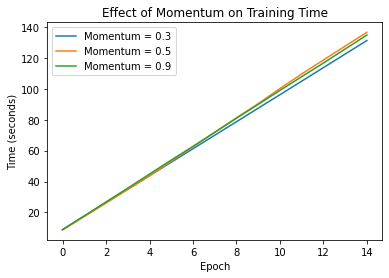

In [97]:
## this one is the base code

# Activation functions

activation_function_hidden = leaky_ReLU
activation_function_derivative_hidden = leaky_ReLU_derivative


activation_function_output = sigmoid
activation_function_derivative_output = sigmoid_derivative

# choices are:
'''
leaky_ReLU(x, slope_parameter=0.01)
leaky_ReLU_derivative(x, slope_parameter=0.01)

sigmoid(x, slope_parameter=2.0)
sigmoid_derivative(x, slope_parameter=2.0)
    
tanh_activation(x, a=1.716, b=2/3)
tanh_derivative(x, a=1.716, b=2/3)
'''
# set learning rate
eta = 0.01

# Batch size
batch_size = 10
num_epochs = 15

# set sizes
# input_size = training_set.shape[1] # 12200 samples x 354 features each sample + 1 bias (input size: 355)
# output_size = 8 # Set your output size
# hidden_layer_size_1 = 100
# hidden_layer_size_2 = 30

# cumulative time per set of momentum term
cumulative_time = []

# Training loop with mini-batch
num_samples = len(training_set)

# Set up different momentum terms to test
momentum_terms = [0.3, 0.5, 0.9]

# initialize random weight matrix 
weights_1_init = np.random.uniform(-2.4/fan_in_1,2.4/fan_in_1,[fan_in_1+1, fan_in_2]) # hidden layer 1
weights_2_init = np.random.uniform(-2.4/fan_in_2,2.4/fan_in_2,[fan_in_2+1, fan_in_3]) # hidden layer 2
weights_out_init = np.random.uniform(-2.4/fan_in_3,2.4/fan_in_3,[fan_in_3+1, no_classes_out]) # output layer
   
    
for alpha in momentum_terms:
#     # Initialize weights for the current momentum term
#     weights_1 = np.random.randn(input_size, hidden_layer_size_1)
#     weights_2 = np.random.randn(hidden_layer_size_1 + 1, hidden_layer_size_2)
#     weights_out = np.random.randn(hidden_layer_size_2 + 1, output_size)
    
#     # initialize random weight matrix 
#     weights_1 = np.random.uniform(-2.4/fan_in_1,2.4/fan_in_1,[fan_in_1+1, fan_in_2]) # hidden layer 1
#     weights_2 = np.random.uniform(-2.4/fan_in_2,2.4/fan_in_2,[fan_in_2+1, fan_in_3]) # hidden layer 2
#     weights_out = np.random.uniform(-2.4/fan_in_3,2.4/fan_in_3,[fan_in_3+1, no_classes_out]) # output layer

    # Initialize weights for the current momentum term
    weights_1 = np.array(weights_1_init)
    weights_2 = np.array(weights_2_init)
    weights_out = np.array(weights_out_init)
    
    # Initialize previous weights
    hidden_layer_1_delta_weights_previous = np.zeros_like(weights_1)
    hidden_layer_2_delta_weights_previous = np.zeros_like(weights_2)
    out_delta_weights_previous = np.zeros_like(weights_out)

    # Lists to store time for each epoch
    times = []
    
    for epoch in range(num_epochs):

        start_time = time.time()

        sum_squared_errors_epoch = 0  # Accumulator for the sum of squared errors in the current epoch

        for i in range(0, num_samples, batch_size):
            # Select mini-batch
            mini_batch_input = training_set[i:i+batch_size]
            mini_batch_labels = training_labels_one_hot[i:i+batch_size]

            # Forward propagation
            v_hidden_layer_1 = mini_batch_input @ weights_1 # internal activity
            y_hidden_layer_1 = activation_function_hidden(v_hidden_layer_1) # activation function
            y_hidden_layer_1 = np.hstack((np.ones(shape=(y_hidden_layer_1.shape[0], 1)), y_hidden_layer_1)) # add bias as first column

            v_hidden_layer_2 = y_hidden_layer_1 @ weights_2 # internal activity
            y_hidden_layer_2 = activation_function_hidden(v_hidden_layer_2) # activation function
            y_hidden_layer_2 = np.hstack((np.ones(shape=(y_hidden_layer_2.shape[0], 1)), y_hidden_layer_2)) # add bias as first column

            v_out_layer = y_hidden_layer_2 @ weights_out # internal activity
            y_out_layer = activation_function_output(v_out_layer) # activation function


            # Calculate error
            out_error = mini_batch_labels - y_out_layer
    #         total_out_error = np.linalg.norm(out_error)
            sum_squared_errors = np.sum(out_error**2)  # Sum of squared errors

    #         print('total_out_error', total_out_error)
            print('sum_squared_errors', sum_squared_errors)

            # Back propagation
            y_out_derivative = activation_function_derivative_output(y_out_layer)
            out_delta = y_out_derivative * out_error
            out_delta_weights = eta * y_hidden_layer_2.T @ out_delta

    #         y_hidden_layer_2_derivative = leaky_ReLU_derivative(y_hidden_layer_2)
    #         hidden_layer_2_delta = y_hidden_layer_2_derivative * (out_delta @ weights_out.T)
    #         hidden_layer_2_delta_weights = eta * y_hidden_layer_1.T @ hidden_layer_2_delta[:, 1:]

    #         y_hidden_layer_1_derivative = leaky_ReLU_derivative(y_hidden_layer_1)
    #         hidden_layer_1_delta = y_hidden_layer_1_derivative * (hidden_layer_2_delta[:, 1:] @ weights_2.T)
    #         hidden_layer_1_delta_weights = eta * mini_batch_input.T @ hidden_layer_1_delta[:, 1:]

            # calculate hidden layer 2 backpropagation
            y_hidden_layer_2_derivative = activation_function_derivative_hidden(y_hidden_layer_2) # derivative of leaky ReLU
            hidden_layer_2_delta = (y_hidden_layer_2_derivative.T * (weights_out @ out_delta.T)).T 
            hidden_layer_2_delta_weights = eta*np.dot(y_hidden_layer_1.T, hidden_layer_2_delta)
            hidden_layer_2_delta_weights = hidden_layer_2_delta_weights[:,1:] # drop first column
            hidden_layer_2_delta = hidden_layer_2_delta[:,1:] # drop first column

            # calculate hidden layer 1 backpropagation
            y_hidden_layer_1_derivative = activation_function_derivative_hidden(y_hidden_layer_1) # derivative of leaky ReLU
            hidden_layer_1_delta = (y_hidden_layer_1_derivative.T * (weights_2 @ hidden_layer_2_delta.T)).T 
            hidden_layer_1_delta_weights = eta*np.dot(mini_batch_input.T, hidden_layer_1_delta)
            hidden_layer_1_delta_weights = hidden_layer_1_delta_weights[:,1:] # drop first column


            # Update weights
            weights_1 += hidden_layer_1_delta_weights + alpha * hidden_layer_1_delta_weights_previous
            weights_2 += hidden_layer_2_delta_weights + alpha * hidden_layer_2_delta_weights_previous
            weights_out += out_delta_weights + alpha * out_delta_weights_previous

            # Update previous weights
            hidden_layer_1_delta_weights_previous = hidden_layer_1_delta_weights
            hidden_layer_2_delta_weights_previous = hidden_layer_2_delta_weights
            out_delta_weights_previous = out_delta_weights
            
        end_time = time.time()
        epoch_time = end_time - start_time
        times.append(epoch_time)
        
     # Plotting results for the current momentum term
    plt.plot(range(num_epochs), np.cumsum(times), label=f'Momentum = {alpha}')
    
    cumulative_time.append(np.cumsum(times)) # append cumulative sum of times 

# Finalize the plot
plt.xlabel('Epoch')
plt.ylabel('Time (seconds)')
plt.title('Effect of Momentum on Training Time')
plt.legend()
plt.show()


In [98]:
cumulative_time

[array([  8.84596753,  17.59609008,  26.31996012,  35.01516891,
         43.78364706,  52.49969697,  61.24365067,  69.96329045,
         78.72594333,  87.47417402,  96.21114016, 104.95871544,
        113.7486558 , 122.53014135, 131.32448626]),
 array([  8.68897319,  17.44134569,  26.13077164,  34.86873865,
         43.6236856 ,  53.18421578,  62.51190996,  71.83406711,
         81.23488235,  90.40053082, 100.22204614, 109.66009736,
        118.70154476, 127.70113373, 136.64914799]),
 array([  8.88400769,  17.789289  ,  26.80660892,  35.76362491,
         44.84135556,  53.91178393,  62.75928283,  71.86440849,
         81.01691413,  89.95492721,  98.99001908, 107.88101935,
        116.72595382, 125.79665375, 134.85769343])]

In [99]:
avg_training_time = (14.77835059+15.60540962+14.96395183)/3
print(avg_training_time)

15.115904013333333


In [100]:
14.77835059-14.96395183 # difference between alpha=0.3 and 0.9

-0.18560123999999867

In [28]:
134.85769343-131.32448626

3.5332071700000256

# Count error per 5 epochs on validation set

In [101]:
# mini_batch_labels

In [102]:
# y_out_layer

In [103]:
# mini_batch_labels_val

In [104]:
# y_out_layer_val

In [105]:
# mini_batch_labels_val

In [106]:
# mini_batch_input_val.shape

In [107]:
# jim = mini_batch_input_val[0,1:]*255
# jim = jim.reshape(digit_height, digit_width)
# jim = jim//1 # to int

In [108]:
# digit_height, digit_width

In [109]:
# jim.shape

In [110]:
# cv2.imshow('jim',jim) 

# # cv2.waitKey(0)
# cv2.waitKey(2000) # show image for 2 seconds
# cv2.destroyAllWindows()

In [178]:
# Activation functions

activation_function_hidden = leaky_ReLU
activation_function_derivative_hidden = leaky_ReLU_derivative


activation_function_output = sigmoid
activation_function_derivative_output = sigmoid_derivative

# choices are:
'''
leaky_ReLU(x, slope_parameter=0.01)
leaky_ReLU_derivative(x, slope_parameter=0.01)

sigmoid(x, slope_parameter=2.0)
sigmoid_derivative(x, slope_parameter=2.0)
    
tanh_activation(x, a=1.716, b=2/3)
tanh_derivative(x, a=1.716, b=2/3)
'''

# Validation set
num_samples_val = len(validation_set)
output_size = len(df_data_labels[0].unique()) # Set your output size

# Variables to store results

# for validation set
sum_squared_errors_list = []
misclassifications_list = []

sum_squared_errors_list_training = [] # for training set

# Batch size
batch_size = 10
num_epochs = 15


# Training loop with mini-batch
num_samples = len(training_set)

# hyperparameters
eta = 0.01
alpha = 0.3
         
# fan-in
fan_in_1 = validation_set.shape[1]-1 # 2106
fan_in_2 = 250 
fan_in_3 = 750 

# initialize random weight matrix 
weights_1 = np.random.uniform(-2.4/fan_in_1,2.4/fan_in_1,[fan_in_1+1, fan_in_2]) # hidden layer 1
weights_2 = np.random.uniform(-2.4/fan_in_2,2.4/fan_in_2,[fan_in_2+1, fan_in_3]) # hidden layer 2
weights_out = np.random.uniform(-2.4/fan_in_3,2.4/fan_in_3,[fan_in_3+1, no_classes_out]) # output layer

# Initialize previous weights
hidden_layer_1_delta_weights_previous = np.zeros_like(weights_1)
hidden_layer_2_delta_weights_previous = np.zeros_like(weights_2)
out_delta_weights_previous = np.zeros_like(weights_out)

# # Lists to store time for each epoch
# times = []
    
# confusion matrices
confusion_matrices = []

# model best weights
model_best_weights = {
    'epoch': 0,
    'weights_1': 0,
    'weights_2': 0,
    'weights_out': 0,
    'sum_squared_errors': 99999999,
    'local_minima': False
} 

# Trained model per epoch
trained_models = []

for epoch in range(num_epochs):

    sum_squared_errors_epoch = 0  # Accumulator for the sum of squared errors in the current epoch

    for i in range(0, num_samples, batch_size):
        # Select mini-batch
        mini_batch_input = training_set[i:i+batch_size]
        mini_batch_labels = training_labels_one_hot[i:i+batch_size]

        # Forward propagation
        v_hidden_layer_1 = mini_batch_input @ weights_1 # internal activity
        y_hidden_layer_1 = activation_function_hidden(v_hidden_layer_1) # activation function
        y_hidden_layer_1 = np.hstack((np.ones(shape=(y_hidden_layer_1.shape[0], 1)), y_hidden_layer_1)) # add bias as first column

        v_hidden_layer_2 = y_hidden_layer_1 @ weights_2 # internal activity
        y_hidden_layer_2 = activation_function_hidden(v_hidden_layer_2) # activation function
        y_hidden_layer_2 = np.hstack((np.ones(shape=(y_hidden_layer_2.shape[0], 1)), y_hidden_layer_2)) # add bias as first column

        v_out_layer = y_hidden_layer_2 @ weights_out # internal activity
        y_out_layer = activation_function_output(v_out_layer) # activation function


        # Calculate error
        out_error = mini_batch_labels - y_out_layer
#         total_out_error = np.linalg.norm(out_error)
        sum_squared_errors = np.sum(out_error**2)  # Sum of squared errors

#         print('total_out_error', total_out_error)
#         print('sum_squared_errors', sum_squared_errors)
        sum_squared_errors_epoch += sum_squared_errors # running sum 
    
        # Back propagation
        y_out_derivative = activation_function_derivative_output(y_out_layer)
        out_delta = y_out_derivative * out_error
        out_delta_weights = eta * y_hidden_layer_2.T @ out_delta

#         y_hidden_layer_2_derivative = leaky_ReLU_derivative(y_hidden_layer_2)
#         hidden_layer_2_delta = y_hidden_layer_2_derivative * (out_delta @ weights_out.T)
#         hidden_layer_2_delta_weights = eta * y_hidden_layer_1.T @ hidden_layer_2_delta[:, 1:]

#         y_hidden_layer_1_derivative = leaky_ReLU_derivative(y_hidden_layer_1)
#         hidden_layer_1_delta = y_hidden_layer_1_derivative * (hidden_layer_2_delta[:, 1:] @ weights_2.T)
#         hidden_layer_1_delta_weights = eta * mini_batch_input.T @ hidden_layer_1_delta[:, 1:]

        # calculate hidden layer 2 backpropagation
        y_hidden_layer_2_derivative = activation_function_derivative_hidden(y_hidden_layer_2) # derivative of leaky ReLU
        hidden_layer_2_delta = (y_hidden_layer_2_derivative.T * (weights_out @ out_delta.T)).T 
        hidden_layer_2_delta_weights = eta*np.dot(y_hidden_layer_1.T, hidden_layer_2_delta)
        hidden_layer_2_delta_weights = hidden_layer_2_delta_weights[:,1:] # drop first column
        hidden_layer_2_delta = hidden_layer_2_delta[:,1:] # drop first column

        # calculate hidden layer 1 backpropagation
        y_hidden_layer_1_derivative = activation_function_derivative_hidden(y_hidden_layer_1) # derivative of leaky ReLU
        hidden_layer_1_delta = (y_hidden_layer_1_derivative.T * (weights_2 @ hidden_layer_2_delta.T)).T 
        hidden_layer_1_delta_weights = eta*np.dot(mini_batch_input.T, hidden_layer_1_delta)
        hidden_layer_1_delta_weights = hidden_layer_1_delta_weights[:,1:] # drop first column


        # Update weights
        weights_1 += hidden_layer_1_delta_weights + alpha * hidden_layer_1_delta_weights_previous
        weights_2 += hidden_layer_2_delta_weights + alpha * hidden_layer_2_delta_weights_previous
        weights_out += out_delta_weights + alpha * out_delta_weights_previous

        # Update previous weights
        hidden_layer_1_delta_weights_previous = hidden_layer_1_delta_weights
        hidden_layer_2_delta_weights_previous = hidden_layer_2_delta_weights
        out_delta_weights_previous = out_delta_weights
        
    sum_squared_errors_list_training.append(sum_squared_errors) # append Sum of squared errors to list after epoch
    
    
    # Initialize and save trained model
    trained_model = {}
    trained_model['epoch'] = epoch+1
    trained_model['weights_1'] = np.array(weights_1) # deep copy
    trained_model['weights_2'] = np.array(weights_2)
    trained_model['weights_out'] = np.array(weights_out)
    trained_model['sum_squared_errors'] = sum_squared_errors
    trained_model['hidden_layer_1_delta_weights_previous'] = hidden_layer_1_delta_weights_previous
    trained_model['hidden_layer_2_delta_weights_previous'] = hidden_layer_2_delta_weights_previous
    trained_model['out_delta_weights_previous'] = out_delta_weights_previous
    trained_models.append(trained_model)
        
    # Update model best
    if sum_squared_errors < model_best_weights['sum_squared_errors'] and model_best_weights['local_minima'] is False: # has better performance than current model_best

        model_best_weights['epoch'] = epoch+1
        model_best_weights['weights_1'] = weights_1
        model_best_weights['weights_2'] = weights_2
        model_best_weights['weights_out'] = weights_out
        model_best_weights['sum_squared_errors'] = sum_squared_errors
        
    else: # if sum_squared errors increased
        model_best_weights['local_minima'] = True
        
   

    # After each epoch, check validation performance every 5 epochs
    if epoch % 5 == 0:
        sum_squared_errors_validation = 0
        misclassifications = 0

        # initialize confusion matrix
        confusion_matrix = np.zeros((output_size,output_size))

        for i in range(0, num_samples_val, batch_size):
            # Select mini-batch
            mini_batch_input_val = validation_set[i:i+batch_size]
            mini_batch_labels_val = validation_labels_one_hot[i:i+batch_size]
            
            # Forward propagation
            v_hidden_layer_1_val = mini_batch_input_val @ weights_1 # internal activity
            y_hidden_layer_1_val = activation_function_hidden(v_hidden_layer_1_val) # activation function
            y_hidden_layer_1_val = np.hstack((np.ones(shape=(y_hidden_layer_1_val.shape[0], 1)), y_hidden_layer_1_val)) # add bias as first column

            v_hidden_layer_2_val = y_hidden_layer_1_val @ weights_2 # internal activity
            y_hidden_layer_2_val = activation_function_hidden(v_hidden_layer_2_val) # activation function
            y_hidden_layer_2_val = np.hstack((np.ones(shape=(y_hidden_layer_2_val.shape[0], 1)), y_hidden_layer_2_val)) # add bias as first column

            v_out_layer_val = y_hidden_layer_2_val @ weights_out # internal activity
            y_out_layer_val = activation_function_output(v_out_layer_val) # activation function
        
            # Calculate error
            out_error_val = mini_batch_labels_val - y_out_layer_val
            sum_squared_errors_val = np.sum(out_error_val**2)
            sum_squared_errors_validation += sum_squared_errors_val

            # Calculate misclassifications
            predictions_val = np.argmax(y_out_layer_val, axis=1)
            true_labels_val = np.argmax(mini_batch_labels_val, axis=1)
            misclassifications += np.sum(predictions_val != true_labels_val)
            
            # Update confusion_matrix
            for i in range(len(predictions_val)):
                confusion_matrix[predictions_val[i]][true_labels_val[i]] += 1
#             confusion_matrix[predictions_val[0]][true_labels_val[0]] += 1

        # Store results for later analysis or printing
        sum_squared_errors_list.append(sum_squared_errors_validation)
        misclassifications_list.append(misclassifications)
        
        # append confusion_matrix
        confusion_matrices.append(confusion_matrix)

        # Print or use the results as needed
        print(f'Epoch {epoch}, Sum of Squared Errors on Validation Set: {sum_squared_errors_validation}, Misclassifications: {misclassifications}')

# Print final results
print('Sum of Squared Errors List:', sum_squared_errors_list)
print('Misclassifications List:', misclassifications_list)
print('Model best epoch:', model_best_weights['epoch'])

Epoch 0, Sum of Squared Errors on Validation Set: 2012.9988333084386, Misclassifications: 2001
Epoch 5, Sum of Squared Errors on Validation Set: 1290.3230387804551, Misclassifications: 653
Epoch 10, Sum of Squared Errors on Validation Set: 162.1492997933413, Misclassifications: 42
Sum of Squared Errors List: [2012.9988333084386, 1290.3230387804551, 162.1492997933413]
Misclassifications List: [2001, 653, 42]
Model best epoch: 4


In [138]:
trained_model['epoch']

100

In [139]:
epoch

99

In [141]:
trained_models[-1]['epoch'] 

100

In [184]:
# Continue training from last epoch

num_epochs_more = 285 # train these more number of epochs

# Get last weights and epoch from latest trained model
num_epoch_last = trained_models[-1]['epoch'] - 1
weights_1 = trained_models[-1]['weights_1']
weights_2 = trained_models[-1]['weights_2']
weights_out = trained_models[-1]['weights_out'] 
hidden_layer_1_delta_weights_previous = trained_models[-1]['hidden_layer_1_delta_weights_previous'] 
hidden_layer_2_delta_weights_previous = trained_models[-1]['hidden_layer_2_delta_weights_previous'] 
out_delta_weights_previous = trained_models[-1]['out_delta_weights_previous'] 
    
for epoch in range(num_epoch_last + 1, num_epoch_last + 1 + num_epochs_more):

    sum_squared_errors_epoch = 0  # Accumulator for the sum of squared errors in the current epoch

    for i in range(0, num_samples, batch_size):
        # Select mini-batch
        mini_batch_input = training_set[i:i+batch_size]
        mini_batch_labels = training_labels_one_hot[i:i+batch_size]

        # Forward propagation
        v_hidden_layer_1 = mini_batch_input @ weights_1 # internal activity
        y_hidden_layer_1 = activation_function_hidden(v_hidden_layer_1) # activation function
        y_hidden_layer_1 = np.hstack((np.ones(shape=(y_hidden_layer_1.shape[0], 1)), y_hidden_layer_1)) # add bias as first column

        v_hidden_layer_2 = y_hidden_layer_1 @ weights_2 # internal activity
        y_hidden_layer_2 = activation_function_hidden(v_hidden_layer_2) # activation function
        y_hidden_layer_2 = np.hstack((np.ones(shape=(y_hidden_layer_2.shape[0], 1)), y_hidden_layer_2)) # add bias as first column

        v_out_layer = y_hidden_layer_2 @ weights_out # internal activity
        y_out_layer = activation_function_output(v_out_layer) # activation function


        # Calculate error
        out_error = mini_batch_labels - y_out_layer
#         total_out_error = np.linalg.norm(out_error)
        sum_squared_errors = np.sum(out_error**2)  # Sum of squared errors

#         print('total_out_error', total_out_error)
#         print('sum_squared_errors', sum_squared_errors)
        sum_squared_errors_epoch += sum_squared_errors # running sum 
    
        # Back propagation
        y_out_derivative = activation_function_derivative_output(y_out_layer)
        out_delta = y_out_derivative * out_error
        out_delta_weights = eta * y_hidden_layer_2.T @ out_delta

#         y_hidden_layer_2_derivative = leaky_ReLU_derivative(y_hidden_layer_2)
#         hidden_layer_2_delta = y_hidden_layer_2_derivative * (out_delta @ weights_out.T)
#         hidden_layer_2_delta_weights = eta * y_hidden_layer_1.T @ hidden_layer_2_delta[:, 1:]

#         y_hidden_layer_1_derivative = leaky_ReLU_derivative(y_hidden_layer_1)
#         hidden_layer_1_delta = y_hidden_layer_1_derivative * (hidden_layer_2_delta[:, 1:] @ weights_2.T)
#         hidden_layer_1_delta_weights = eta * mini_batch_input.T @ hidden_layer_1_delta[:, 1:]

        # calculate hidden layer 2 backpropagation
        y_hidden_layer_2_derivative = activation_function_derivative_hidden(y_hidden_layer_2) # derivative of leaky ReLU
        hidden_layer_2_delta = (y_hidden_layer_2_derivative.T * (weights_out @ out_delta.T)).T 
        hidden_layer_2_delta_weights = eta*np.dot(y_hidden_layer_1.T, hidden_layer_2_delta)
        hidden_layer_2_delta_weights = hidden_layer_2_delta_weights[:,1:] # drop first column
        hidden_layer_2_delta = hidden_layer_2_delta[:,1:] # drop first column

        # calculate hidden layer 1 backpropagation
        y_hidden_layer_1_derivative = activation_function_derivative_hidden(y_hidden_layer_1) # derivative of leaky ReLU
        hidden_layer_1_delta = (y_hidden_layer_1_derivative.T * (weights_2 @ hidden_layer_2_delta.T)).T 
        hidden_layer_1_delta_weights = eta*np.dot(mini_batch_input.T, hidden_layer_1_delta)
        hidden_layer_1_delta_weights = hidden_layer_1_delta_weights[:,1:] # drop first column


        # Update weights
        weights_1 += hidden_layer_1_delta_weights + alpha * hidden_layer_1_delta_weights_previous
        weights_2 += hidden_layer_2_delta_weights + alpha * hidden_layer_2_delta_weights_previous
        weights_out += out_delta_weights + alpha * out_delta_weights_previous

        # Update previous weights
        hidden_layer_1_delta_weights_previous = hidden_layer_1_delta_weights
        hidden_layer_2_delta_weights_previous = hidden_layer_2_delta_weights
        out_delta_weights_previous = out_delta_weights
        
    sum_squared_errors_list_training.append(sum_squared_errors) # append Sum of squared errors to list after epoch
    
    
    # Initialize and save trained model
    trained_model = {}
    trained_model['epoch'] = epoch+1
    trained_model['weights_1'] = np.array(weights_1) # deep copy
    trained_model['weights_2'] = np.array(weights_2)
    trained_model['weights_out'] = np.array(weights_out)
    trained_model['sum_squared_errors'] = sum_squared_errors
    trained_model['hidden_layer_1_delta_weights_previous'] = hidden_layer_1_delta_weights_previous
    trained_model['hidden_layer_2_delta_weights_previous'] = hidden_layer_2_delta_weights_previous
    trained_model['out_delta_weights_previous'] = out_delta_weights_previous
    trained_models.append(trained_model)
        
    # Update model best
    if sum_squared_errors < model_best_weights['sum_squared_errors'] and model_best_weights['local_minima'] is False: # has better performance than current model_best

        model_best_weights['epoch'] = epoch+1
        model_best_weights['weights_1'] = weights_1
        model_best_weights['weights_2'] = weights_2
        model_best_weights['weights_out'] = weights_out
        model_best_weights['sum_squared_errors'] = sum_squared_errors
        
    else: # if sum_squared errors increased
        model_best_weights['local_minima'] = True
        
   

    # After each epoch, check validation performance every 5 epochs
    if epoch % 5 == 0:
        sum_squared_errors_validation = 0
        misclassifications = 0

        # initialize confusion matrix
        confusion_matrix = np.zeros((output_size,output_size))

        for i in range(0, num_samples_val, batch_size):
            # Select mini-batch
            mini_batch_input_val = validation_set[i:i+batch_size]
            mini_batch_labels_val = validation_labels_one_hot[i:i+batch_size]
            
            # Forward propagation
            v_hidden_layer_1_val = mini_batch_input_val @ weights_1 # internal activity
            y_hidden_layer_1_val = activation_function_hidden(v_hidden_layer_1_val) # activation function
            y_hidden_layer_1_val = np.hstack((np.ones(shape=(y_hidden_layer_1_val.shape[0], 1)), y_hidden_layer_1_val)) # add bias as first column

            v_hidden_layer_2_val = y_hidden_layer_1_val @ weights_2 # internal activity
            y_hidden_layer_2_val = activation_function_hidden(v_hidden_layer_2_val) # activation function
            y_hidden_layer_2_val = np.hstack((np.ones(shape=(y_hidden_layer_2_val.shape[0], 1)), y_hidden_layer_2_val)) # add bias as first column

            v_out_layer_val = y_hidden_layer_2_val @ weights_out # internal activity
            y_out_layer_val = activation_function_output(v_out_layer_val) # activation function
        
            # Calculate error
            out_error_val = mini_batch_labels_val - y_out_layer_val
            sum_squared_errors_val = np.sum(out_error_val**2)
            sum_squared_errors_validation += sum_squared_errors_val

            # Calculate misclassifications
            predictions_val = np.argmax(y_out_layer_val, axis=1)
            true_labels_val = np.argmax(mini_batch_labels_val, axis=1)
            misclassifications += np.sum(predictions_val != true_labels_val)
            
            # Update confusion_matrix
            for i in range(len(predictions_val)):
                confusion_matrix[predictions_val[i]][true_labels_val[i]] += 1
#             confusion_matrix[predictions_val[0]][true_labels_val[0]] += 1

        # Store results for later analysis or printing
        sum_squared_errors_list.append(sum_squared_errors_validation)
        misclassifications_list.append(misclassifications)
        
        # append confusion_matrix
        confusion_matrices.append(confusion_matrix)

        # Print or use the results as needed
        print(f'Epoch {epoch}, Sum of Squared Errors on Validation Set: {sum_squared_errors_validation}, Misclassifications: {misclassifications}')

# Print final results
print('Sum of Squared Errors List:', sum_squared_errors_list)
print('Misclassifications List:', misclassifications_list)
print('Model best epoch:', model_best_weights['epoch'])

Epoch 15, Sum of Squared Errors on Validation Set: 292.36437251998746, Misclassifications: 91
Epoch 20, Sum of Squared Errors on Validation Set: 820.4628633228355, Misclassifications: 591
Epoch 25, Sum of Squared Errors on Validation Set: 30.23196970442368, Misclassifications: 8
Epoch 30, Sum of Squared Errors on Validation Set: 10.353562610734437, Misclassifications: 5
Epoch 35, Sum of Squared Errors on Validation Set: 9.255354838793878, Misclassifications: 6
Epoch 40, Sum of Squared Errors on Validation Set: 9.949828876777893, Misclassifications: 6
Epoch 45, Sum of Squared Errors on Validation Set: 11.425475734060196, Misclassifications: 6
Epoch 50, Sum of Squared Errors on Validation Set: 11.332741272894253, Misclassifications: 6
Epoch 55, Sum of Squared Errors on Validation Set: 15.909118791369004, Misclassifications: 8
Epoch 60, Sum of Squared Errors on Validation Set: 11.991181726494068, Misclassifications: 6
Epoch 65, Sum of Squared Errors on Validation Set: 11.819222336499081, 

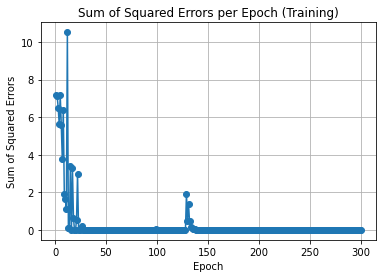

In [185]:
# Plot the sum of squared errors per epoch
plt.plot(range(1, len(sum_squared_errors_list_training)+1), sum_squared_errors_list_training, marker='o')
plt.title('Sum of Squared Errors per Epoch (Training)')
plt.xlabel('Epoch')
plt.ylabel('Sum of Squared Errors')
plt.grid(True)
plt.show()

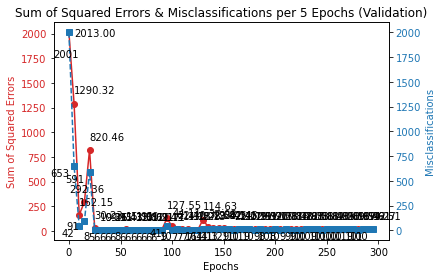

In [186]:
# data
# sum_squared_errors_list = [693.9621472168737, 131.8355530302365, 79.72087915294165, 63.746614570919625]
# misclassifications_list = [579, 89, 45, 34]
# epochs = [5, 10, 15, 20]
# epochs = list(range(0,num_epochs,5))
epochs = list(range(0,len(sum_squared_errors_list)*5,5))

# Create figure and axes
fig, ax1 = plt.subplots()

# Plot sum of squared errors on the first y-axis
color = 'tab:red'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Sum of Squared Errors', color=color)
ax1.plot(epochs, sum_squared_errors_list, marker='o', linestyle='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis to plot misclassifications
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Misclassifications', color=color)
ax2.plot(epochs, misclassifications_list, marker='s', linestyle='--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add data labels for sum of squared errors
for i, txt in enumerate(sum_squared_errors_list):
#     offset = -4 if i == 0 else 10
#     vertical_offset = 5 if i == 0 else 0
    if i == 0: # first data point
        horizontal_offset = 5
        offset = -4
    elif i == 3: # last data point
        offset = 10
        horizontal_offset = -15
    else: # data points in between
        offset = 10
        horizontal_offset = 0
    ax1.annotate(f'{txt:.2f}', (epochs[i], sum_squared_errors_list[i]), textcoords="offset points", xytext=(horizontal_offset, offset), ha='left')

# Add data labels for misclassifications
for i, txt in enumerate(misclassifications_list):
    offset = -25 if i == 0 else -10
    horizontal_offset = 10 if i == 0 else -5
    if i == 3: # last data point
        offset = -8
    ax2.annotate(f'{txt}', (epochs[i], misclassifications_list[i]), textcoords="offset points", xytext=(horizontal_offset, offset), ha='right')

# Show the plot
plt.title('Sum of Squared Errors & Misclassifications per 5 Epochs (Validation)')
plt.show()

In [187]:
len(epochs)

60

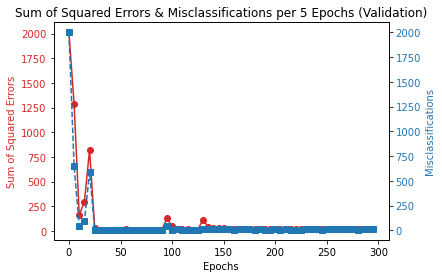

In [188]:
# data
# sum_squared_errors_list = [693.9621472168737, 131.8355530302365, 79.72087915294165, 63.746614570919625]
# misclassifications_list = [579, 89, 45, 34]
# epochs = [5, 10, 15, 20]
# epochs = list(range(0,num_epochs,5))
epochs = list(range(0,len(sum_squared_errors_list)*5,5))

# Create figure and axes
fig, ax1 = plt.subplots()

# Plot sum of squared errors on the first y-axis
color = 'tab:red'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Sum of Squared Errors', color=color)
ax1.plot(epochs, sum_squared_errors_list, marker='o', linestyle='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis to plot misclassifications
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Misclassifications', color=color)
ax2.plot(epochs, misclassifications_list, marker='s', linestyle='--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add data labels for sum of squared errors
for i, txt in enumerate(sum_squared_errors_list):
#     offset = -4 if i == 0 else 10
#     vertical_offset = 5 if i == 0 else 0
    if i == 0: # first data point
        horizontal_offset = 5
        offset = -4
    elif i == 3: # last data point
        offset = 10
        horizontal_offset = -15
    else: # data points in between
        offset = 10
        horizontal_offset = 0
#     ax1.annotate(f'{txt:.2f}', (epochs[i], sum_squared_errors_list[i]), textcoords="offset points", xytext=(horizontal_offset, offset), ha='left')

# Add data labels for misclassifications
for i, txt in enumerate(misclassifications_list):
    offset = -25 if i == 0 else -10
    horizontal_offset = 10 if i == 0 else -5
    if i == 3: # last data point
        offset = -8
#     ax2.annotate(f'{txt}', (epochs[i], misclassifications_list[i]), textcoords="offset points", xytext=(horizontal_offset, offset), ha='right')

# Show the plot
plt.title('Sum of Squared Errors & Misclassifications per 5 Epochs (Validation)')
plt.show()

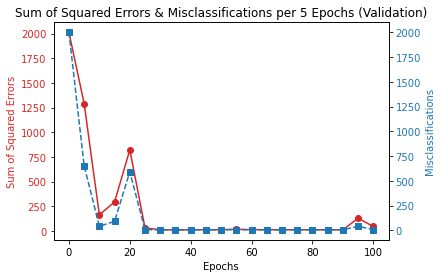

In [191]:
shorten_to_epoch = int(105 / 5 )
# data
# sum_squared_errors_list = [693.9621472168737, 131.8355530302365, 79.72087915294165, 63.746614570919625]
# misclassifications_list = [579, 89, 45, 34]
# epochs = [5, 10, 15, 20]
# epochs = list(range(0,num_epochs,5))
epochs = list(range(0,len(sum_squared_errors_list)*5,5))

epochs = epochs[:shorten_to_epoch]
misclassifications_list_shortened = misclassifications_list[:shorten_to_epoch]
sum_squared_errors_list_shortened = sum_squared_errors_list[:shorten_to_epoch]

# Create figure and axes
fig, ax1 = plt.subplots()

# Plot sum of squared errors on the first y-axis
color = 'tab:red'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Sum of Squared Errors', color=color)
ax1.plot(epochs, sum_squared_errors_list_shortened, marker='o', linestyle='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis to plot misclassifications
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Misclassifications', color=color)
ax2.plot(epochs, misclassifications_list_shortened, marker='s', linestyle='--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add data labels for sum of squared errors
for i, txt in enumerate(sum_squared_errors_list_shortened):
#     offset = -4 if i == 0 else 10
#     vertical_offset = 5 if i == 0 else 0
    if i == 0: # first data point
        horizontal_offset = 5
        offset = -4
    elif i == 3: # last data point
        offset = 10
        horizontal_offset = -15
    else: # data points in between
        offset = 10
        horizontal_offset = 0
#     ax1.annotate(f'{txt:.2f}', (epochs[i], sum_squared_errors_list[i]), textcoords="offset points", xytext=(horizontal_offset, offset), ha='left')

# Add data labels for misclassifications
for i, txt in enumerate(misclassifications_list_shortened):
    offset = -25 if i == 0 else -10
    horizontal_offset = 10 if i == 0 else -5
    if i == 3: # last data point
        offset = -8
#     ax2.annotate(f'{txt}', (epochs[i], misclassifications_list[i]), textcoords="offset points", xytext=(horizontal_offset, offset), ha='right')

# Show the plot
plt.title('Sum of Squared Errors & Misclassifications per 5 Epochs (Validation)')
plt.show()

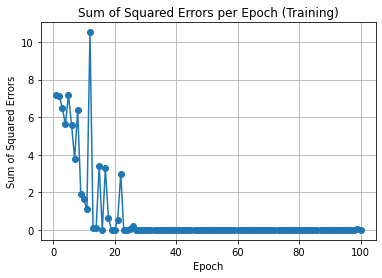

In [194]:
# Plot the sum of squared errors per epoch
plt.plot(range(1, len(sum_squared_errors_list_training[:shorten_to_epoch*5-5])+1), sum_squared_errors_list_training[:shorten_to_epoch*5-5], marker='o')
plt.title('Sum of Squared Errors per Epoch (Training)')
plt.xlabel('Epoch')
plt.ylabel('Sum of Squared Errors')
plt.grid(True)
plt.show()

In [197]:
len(epochs)

21

In [198]:
len(sum_squared_errors_list)

60

In [212]:
sum_squared_errors_list[5:9]

[30.23196970442368, 10.353562610734437, 9.255354838793878, 9.949828876777893]

In [211]:
misclassifications_list[5:9]

[8, 5, 6, 6]

In [201]:
f'number of least sse: {min(sum_squared_errors_list)}'

'number of least sse: 9.255354838793878'

In [242]:
f'epoch with least sse: {sum_squared_errors_list.index(min(sum_squared_errors_list))*5}'

'epoch with least sse: 35'

In [240]:
f'number of least misclassificaitons: {min(misclassifications_list)}'

'number of least misclassificaitons: 5'

In [241]:
f'epoch with least misclassificaitons: {misclassifications_list.index(min(misclassifications_list))*5}'

'epoch with least misclassificaitons: 30'

In [300]:
trained_models[37]

{'epoch': 38,
 'weights_1': array([[-0.00559283, -0.00269018, -0.00967769, ..., -0.00496714,
          0.00027613,  0.00024501],
        [-0.00389469, -0.00173848, -0.00744272, ..., -0.00339077,
          0.00012984,  0.00100358],
        [-0.0026333 , -0.00226745, -0.00675814, ..., -0.00405053,
         -0.00084214,  0.00101465],
        ...,
        [-0.00316231, -0.00210701, -0.00631445, ..., -0.00299212,
          0.00017771, -0.0006172 ],
        [-0.00219225, -0.00233687, -0.00713473, ..., -0.00355346,
         -0.00072043, -0.00051276],
        [-0.0026416 , -0.00302461, -0.00752562, ..., -0.00346631,
         -0.00065709,  0.0003445 ]]),
 'weights_2': array([[-0.0650752 ,  0.07180156,  0.14888493, ..., -0.00620499,
          0.00478317,  0.00036034],
        [ 0.01287367,  0.00786679,  0.00916787, ...,  0.00515056,
         -0.00092894,  0.00314618],
        [-0.00049651,  0.00542438,  0.00445166, ...,  0.00932848,
          0.00753592,  0.00344933],
        ...,
        [ 0.00

In [288]:
# Epoch 38 for model best
model_best_weights = trained_models[37]

In [245]:
batch_size

10

In [246]:
validation_labels_one_hot.shape

(2232, 10)

In [247]:
trained_models

[{'epoch': 1,
  'weights_1': array([[-5.58524748e-04,  1.58382370e-03,  1.92682639e-03, ...,
           2.03789624e-03,  3.10589426e-04,  3.46414462e-04],
         [-5.88133460e-04,  1.10870843e-03,  8.97507788e-04, ...,
           1.32180707e-03,  1.47495645e-04,  1.05223755e-03],
         [ 7.04564740e-04,  5.95273890e-04,  1.65805552e-03, ...,
           7.10377213e-04, -8.24766639e-04,  1.06309948e-03],
         ...,
         [-7.92517024e-05,  6.02646202e-04,  1.02417713e-03, ...,
           1.33267592e-03,  1.98981911e-04, -5.54071374e-04],
         [ 8.78465494e-04,  3.77783113e-04,  1.45093512e-04, ...,
           8.06848582e-04, -6.98926730e-04, -4.47579795e-04],
         [ 4.29203589e-04, -2.73185346e-04, -4.46740325e-04, ...,
           9.48940155e-04, -6.31610354e-04,  4.16039822e-04]]),
  'weights_2': array([[-0.00090086, -0.00552592, -0.00990448, ..., -0.00592014,
           0.00740428, -0.00157147],
         [ 0.00639526,  0.00444871,  0.00261292, ...,  0.00525862,
     

In [301]:
# test performance of last epoch's weights

# for validation set
misclassifications_best = 0

# sse best
sum_squared_errors_best = 0

# initialize confusion matrix
confusion_matrix_best = np.zeros((output_size,output_size))

for i in range(0, validation_labels_one_hot.shape[0], batch_size):
    
    # Select mini-batch
    mini_batch_input_val = validation_set[i:i+batch_size]
    mini_batch_labels_val = validation_labels_one_hot[i:i+batch_size]

    # Forward propagation
    v_hidden_layer_1_val = mini_batch_input_val @ weights_1 # internal activity
    y_hidden_layer_1_val = activation_function_hidden(v_hidden_layer_1_val) # activation function
    y_hidden_layer_1_val = np.hstack((np.ones(shape=(y_hidden_layer_1_val.shape[0], 1)), y_hidden_layer_1_val)) # add bias as first column

    v_hidden_layer_2_val = y_hidden_layer_1_val @ weights_2 # internal activity
    y_hidden_layer_2_val = activation_function_hidden(v_hidden_layer_2_val) # activation function
    y_hidden_layer_2_val = np.hstack((np.ones(shape=(y_hidden_layer_2_val.shape[0], 1)), y_hidden_layer_2_val)) # add bias as first column

    v_out_layer_val = y_hidden_layer_2_val @ weights_out # internal activity
    y_out_layer_val = activation_function_output(v_out_layer_val) # activation function

    # Calculate error
    out_error_val = mini_batch_labels_val - y_out_layer_val
    sum_squared_errors_val = np.sum(out_error_val**2)
    sum_squared_errors_best += sum_squared_errors_val

    # Calculate misclassifications
    predictions_val = np.argmax(y_out_layer_val, axis=1)
    true_labels_val = np.argmax(mini_batch_labels_val, axis=1)
    misclassifications_best += np.sum(predictions_val != true_labels_val)

    # Update confusion_matrix
    for i in range(len(predictions_val)):
        confusion_matrix_best[predictions_val[i]][true_labels_val[i]] += 1
#     print(f'length of predictions_val: {len(predictions_val)}')



# # append confusion_matrix
# confusion_matrices.append(confusion_matrix)

# Print or use the results as needed
print(f'Confusion matrix\n {confusion_matrix_best}, \nSum of Squared Errors on model best: {sum_squared_errors_best}, Misclassifications: {misclassifications_best}')



Confusion matrix
 [[228.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0. 215.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0. 220.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 229.   0.   1.   0.   0.   0.   1.]
 [  0.   0.   0.   0. 237.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 216.   1.   0.   0.   1.]
 [  0.   0.   0.   0.   0.   0. 221.   0.   0.   0.]
 [  0.   0.   1.   0.   0.   0.   0. 215.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   1.   0. 212.   0.]
 [  0.   0.   0.   0.   0.   1.   0.   0.   3. 229.]], 
Sum of Squared Errors on model best: 19.033030350616826, Misclassifications: 10


In [302]:
confusion_matrix_best

array([[228.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0., 215.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0., 220.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0., 229.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  0.,   0.,   0.,   0., 237.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0., 216.,   1.,   0.,   0.,   1.],
       [  0.,   0.,   0.,   0.,   0.,   0., 221.,   0.,   0.,   0.],
       [  0.,   0.,   1.,   0.,   0.,   0.,   0., 215.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   1.,   0., 212.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   3., 229.]])

In [250]:
predictions_val

array([9, 9], dtype=int64)

In [251]:
confusion_matrix_best[predictions_val,predictions_val] += 1

In [405]:
confusion_matrix_best

array([[228.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0., 215.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0., 220.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0., 229.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0., 237.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0., 216.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0., 221.,   0.,   0.,   0.],
       [  0.,   0.,   1.,   0.,   0.,   0.,   0., 215.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   2.,   0., 215.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0., 231.]])

In [286]:
# Epoch 35 for model best
model_best_weights = trained_models[37]

In [445]:
# np.vstack(true_labels_all[:-1])

array([[9, 5, 1, ..., 0, 0, 0],
       [0, 3, 6, ..., 0, 3, 0],
       [0, 4, 4, ..., 0, 3, 0],
       ...,
       [9, 9, 9, ..., 9, 9, 9],
       [9, 9, 9, ..., 9, 9, 9],
       [9, 9, 9, ..., 9, 9, 9]], dtype=int64)

In [446]:
# np.vstack(predictions_all[:-1])

array([[9, 5, 1, ..., 0, 0, 0],
       [0, 3, 6, ..., 0, 3, 0],
       [0, 4, 4, ..., 0, 3, 0],
       ...,
       [9, 9, 9, ..., 9, 9, 9],
       [9, 9, 9, ..., 9, 9, 9],
       [9, 9, 9, ..., 9, 9, 9]], dtype=int64)

In [448]:
# sum(sum(np.vstack(predictions_all[:-1]) - np.vstack(true_labels_all[:-1])))

17

In [457]:
# test performance of model_best_weights

# for validation set
misclassifications_best = 0
misclassifications_best2 = 0

# sse best
sum_squared_errors_best = 0

# true_labels_all = []
# predictions_all = []

# initialize confusion matrix
confusion_matrix_best = np.zeros((output_size,output_size))

for i in range(0, num_samples_val, batch_size):
    # Select mini-batch
    mini_batch_input_val = validation_set[i:i+batch_size]
    mini_batch_labels_val = validation_labels_one_hot[i:i+batch_size]

    # Forward propagation
    v_hidden_layer_1_val = mini_batch_input_val @ model_best_weights['weights_1'] # internal activity
    y_hidden_layer_1_val = activation_function_hidden(v_hidden_layer_1_val) # activation function
    y_hidden_layer_1_val = np.hstack((np.ones(shape=(y_hidden_layer_1_val.shape[0], 1)), y_hidden_layer_1_val)) # add bias as first column

    v_hidden_layer_2_val = y_hidden_layer_1_val @ model_best_weights['weights_2'] # internal activity
    y_hidden_layer_2_val = activation_function_hidden(v_hidden_layer_2_val) # activation function
    y_hidden_layer_2_val = np.hstack((np.ones(shape=(y_hidden_layer_2_val.shape[0], 1)), y_hidden_layer_2_val)) # add bias as first column

    v_out_layer_val = y_hidden_layer_2_val @ model_best_weights['weights_out'] # internal activity
    y_out_layer_val = activation_function_output(v_out_layer_val) # activation function

    # Calculate error
    out_error_val = mini_batch_labels_val - y_out_layer_val
    sum_squared_errors_val = np.sum(out_error_val**2)
    sum_squared_errors_best += sum_squared_errors_val

    # Calculate misclassifications
    predictions_val = np.argmax(y_out_layer_val, axis=1)
    true_labels_val = np.argmax(mini_batch_labels_val, axis=1)
    misclassifications_best += np.sum(predictions_val != true_labels_val)
    
#     true_labels_all.append(true_labels_val)
#     predictions_all.append(predictions_val)
    
    if np.sum(predictions_val != true_labels_val) > 0 or i <= 586*3 <= i+batch_size:
        print('+', np.sum(predictions_val != true_labels_val))
        print(true_labels_val)
        print(predictions_val)


    # Update confusion_matrix
    for i in range(len(predictions_val)):
        confusion_matrix_best[predictions_val[i]][true_labels_val[i]] += 1
    
#     confusion_matrix_best[predictions_val[0]][true_labels_val[0]] += 1



# # append confusion_matrix
# confusion_matrices.append(confusion_matrix)

# Print or use the results as needed
print(f'Confusion matrix\n {confusion_matrix_best}, \nSum of Squared Errors on model best: {sum_squared_errors_best}, Misclassifications: {misclassifications_best}')

+ 1
[2 2 6 2 8 5 2 8 2 4]
[2 2 6 7 8 5 2 8 2 4]
+ 1
[8 8 2 8 5 2 8 6 2 5]
[8 8 2 8 5 2 8 6 2 9]
+ 1
[3 5 6 5 3 5 6 6 5 3]
[3 5 6 5 3 5 6 8 5 3]
+ 1
[6 6 3 8 3 6 3 6 3 6]
[6 6 3 8 3 6 3 6 3 8]
+ 1
[5 5 5 5 5 5 5 5 5 5]
[5 5 5 5 5 5 5 9 5 5]
+ 0
[5 5 5 5 5 5 5 5 5 5]
[5 5 5 5 5 5 5 5 5 5]
Confusion matrix
 [[228.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0. 215.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0. 220.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 229.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 237.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 216.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0. 221.   0.   0.   0.]
 [  0.   0.   1.   0.   0.   0.   0. 215.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   2.   0. 215.   0.]
 [  0.   0.   0.   0.   0.   2.   0.   0.   0. 231.]], 
Sum of Squared Errors on model best: 8.866983042768805, Misclassifications: 5


In [398]:
model_best_weights

{'epoch': 38,
 'weights_1': array([[-0.00559283, -0.00269018, -0.00967769, ..., -0.00496714,
          0.00027613,  0.00024501],
        [-0.00389469, -0.00173848, -0.00744272, ..., -0.00339077,
          0.00012984,  0.00100358],
        [-0.0026333 , -0.00226745, -0.00675814, ..., -0.00405053,
         -0.00084214,  0.00101465],
        ...,
        [-0.00316231, -0.00210701, -0.00631445, ..., -0.00299212,
          0.00017771, -0.0006172 ],
        [-0.00219225, -0.00233687, -0.00713473, ..., -0.00355346,
         -0.00072043, -0.00051276],
        [-0.0026416 , -0.00302461, -0.00752562, ..., -0.00346631,
         -0.00065709,  0.0003445 ]]),
 'weights_2': array([[-0.0650752 ,  0.07180156,  0.14888493, ..., -0.00620499,
          0.00478317,  0.00036034],
        [ 0.01287367,  0.00786679,  0.00916787, ...,  0.00515056,
         -0.00092894,  0.00314618],
        [-0.00049651,  0.00542438,  0.00445166, ...,  0.00932848,
          0.00753592,  0.00344933],
        ...,
        [ 0.00

In [399]:
y_out_layer_val

array([[5.77183372e-12, 2.41444567e-07, 2.84023276e-10, 3.03823025e-06,
        2.19353529e-05, 7.18194891e-04, 1.18511274e-09, 1.49553245e-09,
        3.06446737e-09, 9.99711538e-01],
       [1.65850871e-12, 4.52895115e-08, 1.49167661e-10, 1.07586085e-06,
        2.36015757e-05, 1.79118808e-03, 8.08931336e-10, 4.95607008e-10,
        3.80293542e-10, 9.99437176e-01]])

In [400]:
len(confusion_matrices)

60

In [401]:
confusion_matrices

[array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [228., 215., 221., 229., 237., 218., 223., 215., 215., 231.]]),
 array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0., 174.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0., 192.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  1.,   0.,   0., 194.,   0.,   1.,   0.,   0.,   0.,   2.],
        [  0.,   0

In [402]:
confusion_matrix

array([[228.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0., 215.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0., 220.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0., 229.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  0.,   0.,   0.,   0., 237.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0., 216.,   1.,   0.,   0.,   2.],
       [  0.,   0.,   0.,   0.,   0.,   0., 221.,   0.,   0.,   0.],
       [  0.,   0.,   1.,   0.,   0.,   0.,   0., 215.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   1.,   0., 213.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   2., 228.]])

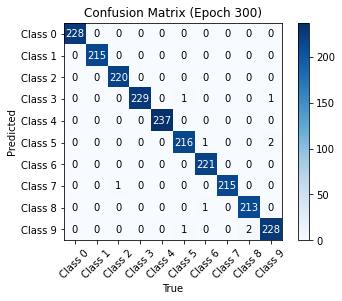

In [403]:
# confusion matrix for epoch #20
# Class names
class_names = [f'Class {i+class_start}' for i in range(confusion_matrix.shape[0])]

# Plot confusion matrix as a heatmap
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix (Epoch {trained_models[-1]["epoch"]})')
plt.colorbar()

# Add axis labels and ticks
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)

# Add text annotations
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, format(confusion_matrix[i, j], '.0f'), ha='center', va='center', color='white' if confusion_matrix[i, j] > np.max(confusion_matrix) / 2 else 'black')

# Set axis labels
plt.xlabel('True')
plt.ylabel('Predicted')

# Show the plot
plt.show()

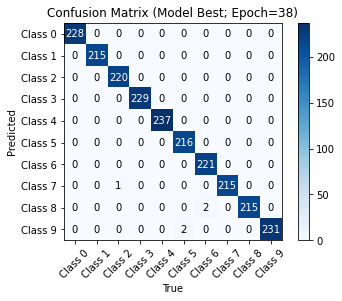

In [429]:
# confusion matrix for model_best_weights
# Class names
class_names = [f'Class {i+class_start}' for i in range(confusion_matrix_best.shape[0])]

# Plot confusion matrix as a heatmap
plt.imshow(confusion_matrix_best, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix (Model Best; Epoch={model_best_weights["epoch"]})')
plt.colorbar()

# Add axis labels and ticks
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)

# Add text annotations
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, format(confusion_matrix_best[i, j], '.0f'), ha='center', va='center', color='white' if confusion_matrix_best[i, j] > np.max(confusion_matrix_best) / 2 else 'black')

# Set axis labels
plt.xlabel('True')
plt.ylabel('Predicted')

# Show the plot
plt.show()

In [314]:
true_positives = np.diag(confusion_matrix)
np.sum(confusion_matrix, axis=0)

array([228., 215., 221., 229., 237., 218., 223., 215., 215., 231.])

In [315]:
true_positives

array([228., 215., 220., 229., 237., 216., 221., 215., 213., 228.])

In [316]:
np.sum(confusion_matrix, axis=1) - true_positives

array([0., 0., 0., 2., 0., 3., 0., 1., 1., 3.])

In [317]:
# function which calculates matthews correlation coefficient
def mcc_from_confusion_matrix(cm):
    # source: https://blester125.com/blog/rk.html
#     cm = ConfusionMatrix(X, Y)
    samples = np.sum(cm)
    correct = np.trace(cm)
    y = np.sum(cm, axis=1, dtype=np.float64)
    x = np.sum(cm, axis=0, dtype=np.float64)
    cov_x_y = correct * samples - np.dot(x, y)
    cov_y_y = samples * samples - np.dot(y, y)
    cov_x_x = samples * samples - np.dot(x, x)
 
    denom = np.sqrt(cov_x_x * cov_y_y)
    denom = denom if denom != 0.0 else 1.0
    return cov_x_y / denom

def calculate_metrics(conf_matrix):
    # Calculate metrics from confusion matrix
    true_positives = np.diag(conf_matrix)
    false_positives = np.sum(conf_matrix, axis=1) - true_positives
    false_negatives = np.sum(conf_matrix, axis=0) - true_positives

    # Accuracy
    accuracy = np.sum(true_positives) / np.sum(conf_matrix)

    # Precision
    precision = true_positives / (true_positives + false_positives)

    # Recall
    recall = true_positives / (true_positives + false_negatives)

    # F1 Score
    f1_score = 2 * (precision * recall) / (precision + recall)

    # Matthews correlation coefficient
#     mcc_numerator = (true_positives * np.sum(conf_matrix) - np.sum(true_positives) * np.sum(conf_matrix, axis=1))
#     mcc_denominator = np.sqrt((np.sum(true_positives) + np.sum(conf_matrix, axis=1)) * (np.sum(true_positives) + np.sum(conf_matrix, axis=0)))
#     mcc = mcc_numerator / mcc_denominator
    mcc = mcc_from_confusion_matrix(conf_matrix)
    
    precision_avg = np.mean(precision)
    
    recall_avg = np.mean(recall)
    
    f1_score_avg = np.mean(f1_score)

    return accuracy, precision, recall, f1_score, mcc, precision_avg, recall_avg, f1_score_avg

# Calculate metrics
accuracy, precision, recall, f1_score, mcc, precision_avg, recall_avg, f1_score_avg = calculate_metrics(confusion_matrix) # epoch 20
accuracy_best, precision_best, recall_best, f1_score_best, mcc_best, precision_avg_best, recall_avg_best, f1_score_avg_best = calculate_metrics(confusion_matrix_best) # model best

# Print results
print('Model on epoch', 20)
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')
print(f'Matthews Correlation Coefficient: {mcc}')
print(f'Precision_avg: {precision_avg}')
print(f'Recall_avg: {recall_avg}')
print(f'F1 Score_avg: {f1_score_avg}')


# Print results
print('\n\nModel best; on epoch', model_best_weights["epoch"])
print(f'Accuracy: {accuracy_best:.2f}')
print(f'Precision: {precision_best}')
print(f'Recall: {recall_best}')
print(f'F1 Score: {f1_score_best}')
print(f'Matthews Correlation Coefficient: {mcc_best}')
print(f'Precision_avg: {precision_avg_best}')
print(f'Recall_avg: {recall_avg_best}')
print(f'F1 Score_avg: {f1_score_avg_best}')

Model on epoch 20
Accuracy: 1.00
Precision: [1.         1.         1.         0.99134199 1.         0.98630137
 1.         0.99537037 0.9953271  0.98701299]
Recall: [1.         1.         0.99547511 1.         1.         0.99082569
 0.99103139 1.         0.99069767 0.98701299]
F1 Score: [1.         1.         0.99773243 0.99565217 1.         0.98855835
 0.9954955  0.99767981 0.99300699 0.98701299]
Matthews Correlation Coefficient: 0.9950226239352967
Precision_avg: 0.99553538213921
Recall_avg: 0.9955042852761687
F1 Score_avg: 0.9955138242520271


Model best; on epoch 38
Accuracy: 1.00
Precision: [1.         1.         1.         1.         1.         1.
 1.         0.99537037 0.99078341 0.99141631]
Recall: [1.         1.         0.99547511 1.         1.         0.99082569
 0.99103139 1.         1.         1.        ]
F1 Score: [1.         1.         0.99773243 1.         1.         0.99539171
 0.9954955  0.99767981 0.99537037 0.99568966]
Matthews Correlation Coefficient: 0.9975126514428

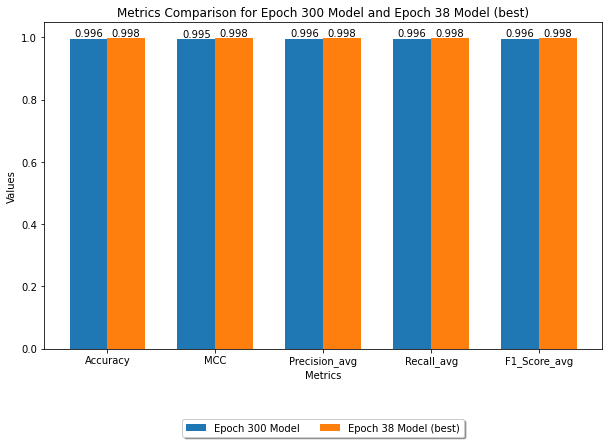

In [319]:
# accuracy metrics

model_epoch_20_data = {
    'Accuracy': accuracy,
    'MCC': mcc,
    'Precision_avg': precision_avg,
    'Recall_avg': recall_avg,
    'F1_Score_avg': f1_score_avg
}

model_best_data = {
    'Accuracy': accuracy_best,
    'MCC': mcc_best,
    'Precision_avg': precision_avg_best,
    'Recall_avg': recall_avg_best,
    'F1_Score_avg': f1_score_avg_best
}

# model_epoch_20_data = {
#     'Accuracy': 0.95,
#     'MCC': 0.9443681318681318,
#     'Precision_avg': 0.95625,
#     'Recall_avg': 0.9546703296703297,
#     'F1_Score_avg': 0.9507048185309055
# }

# model_best_data = {
#     'Accuracy': 0.95,
#     'MCC': 0.9446989027165961,
#     'Precision_avg': 0.95625,
#     'Recall_avg': 0.9553571428571429,
#     'F1_Score_avg': 0.9498714851975721
# }

# metrics = list(model_epoch_20_data.keys())
# values_class1 = [model_epoch_20_data[metric] for metric in metrics]
# values_class2 = [model_best_data[metric] for metric in metrics]

# # Number of metrics
# num_metrics = len(metrics)

# # Generate x-axis values (indices)
# indices = range(num_metrics)

# # Bar width
# bar_width = 0.35

# # Plot data for class 1 and class 2
# fig, ax = plt.subplots(figsize=(10, 6))
# bar1 = ax.bar(indices, values_class1, bar_width, label='Epoch 20 Model')
# bar2 = ax.bar([i + bar_width for i in indices], values_class2, bar_width, label='Epoch 7 Model (best)')

# # Add data labels to the bars
# for i, value in enumerate(values_class1):
#     ax.text(i, value, f'{value:.3f}', ha='center', va='bottom')

# for i, value in enumerate(values_class2):
#     ax.text(i + bar_width, value, f'{value:.3f}', ha='center', va='bottom')

# # Set labels, title, and legend
# ax.set_xlabel('Metrics')
# ax.set_ylabel('Values')
# ax.set_title('Metrics Comparison for Epoch 20 Model and Epoch 7 Model (best)')
# ax.set_xticks([i + bar_width / 2 for i in indices])
# ax.set_xticklabels(metrics)
# ax.legend()

# # Show the plot
# plt.show()

metrics = list(model_epoch_20_data.keys())
values_class1 = [model_epoch_20_data[metric] for metric in metrics]
values_class2 = [model_best_data[metric] for metric in metrics]

# Number of metrics
num_metrics = len(metrics)

# Generate x-axis values (indices)
indices = range(num_metrics)

# Bar width
bar_width = 0.35

# Plot data for class 1 and class 2
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(indices, values_class1, bar_width, label=f'Epoch {trained_models[-1]["epoch"]} Model')
bar2 = ax.bar([i + bar_width for i in indices], values_class2, bar_width, label=f'Epoch {model_best_weights["epoch"]} Model (best)')

# Add data labels to the bars
for i, value in enumerate(values_class1):
    ax.text(i, value, f'{value:.3f}', ha='center', va='bottom')

for i, value in enumerate(values_class2):
    ax.text(i + bar_width, value, f'{value:.3f}', ha='center', va='bottom')

# Set labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
# ax.set_title(f'Metrics Comparison for last Epoch Model and Epoch {model_best_weights["epoch"]} Model (best)')
ax.set_title(f'Metrics Comparison for Epoch {trained_models[-1]["epoch"]} Model and Epoch {model_best_weights["epoch"]} Model (best)')
ax.set_xticks([i + bar_width / 2 for i in indices])
ax.set_xticklabels(metrics)

# Move legend to the bottom
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=2)

# Show the plot
plt.show()

# metrics = list(model_epoch_20_data.keys())
# values_class1 = [model_epoch_20_data[metric] for metric in metrics]
# values_class2 = [model_best_data[metric] for metric in metrics]

# # Number of metrics
# num_metrics = len(metrics)

# # Generate x-axis values (indices)
# indices = range(num_metrics)

# # Bar width
# bar_width = 0.35

# # Plot data for class 1 and class 2
# fig, ax = plt.subplots(figsize=(10, 6))
# bar1 = ax.bar(indices, values_class1, bar_width, label='Epoch 20 Model')
# bar2 = ax.bar([i + bar_width for i in indices], values_class2, bar_width, label='Epoch 7 Model (best)')

# # Set labels, title, and legend
# ax.set_xlabel('Metrics')
# ax.set_ylabel('Values')
# ax.set_title('Metrics Comparison for Epoch 20 Model and Epoch 7 Model (best)')
# ax.set_xticks([i + bar_width / 2 for i in indices])
# ax.set_xticklabels(metrics)
# ax.legend()

# # Show the plot
# plt.show()

In [982]:
# def calculate_mcc(conf_matrix):
#     """
#     Calculate Matthews Correlation Coefficient (MCC) from a confusion matrix.

#     Parameters:
#     - conf_matrix (numpy.ndarray): Confusion matrix array.

#     Returns:
#     - float: Matthews Correlation Coefficient.
#     """
#     TP = np.diag(conf_matrix)
#     TN = np.sum(conf_matrix) - (np.sum(conf_matrix, axis=0) + np.sum(conf_matrix, axis=1) - TP)
#     FP = np.sum(conf_matrix, axis=0) - TP
#     FN = np.sum(conf_matrix, axis=1) - TP

#     mcc_numerator = (TP * TN - FP * FN)
#     mcc_denominator = np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

#     # Avoid division by zero
#     mcc = np.divide(mcc_numerator, mcc_denominator, out=np.zeros_like(mcc_numerator), where=mcc_denominator != 0)

#     return mcc

# # Example usage:
# EXAMPLE_confusion_matrix = np.array([[13., 0., 0., 0., 0., 0., 0., 0.],
#                              [0., 11., 0., 0., 0., 0., 0., 0.],
#                              [0., 0., 14., 0., 0., 0., 0., 0.],
#                              [1., 0., 0., 11., 0., 0., 0., 0.],
#                              [0., 0., 0., 0., 12., 0., 0., 0.],
#                              [0., 0., 0., 0., 0., 12., 0., 0.],
#                              [0., 0., 0., 0., 0., 0., 12., 0.],
#                              [0., 0., 0., 0., 0., 2., 1., 11.]])

# # mcc_value = calculate_mcc(EXAMPLE_confusion_matrix)
# mcc_value = calculate_mcc(np.array([[15,5],[5,375]]))

# print(f'Matthews Correlation Coefficient: {mcc_value}')

In [320]:
# # function which calculates matthews correlation coefficient
# def mcc(cm):
# #     cm = ConfusionMatrix(X, Y)
#     samples = np.sum(cm)
#     correct = np.trace(cm)
#     y = np.sum(cm, axis=1, dtype=np.float64)
#     x = np.sum(cm, axis=0, dtype=np.float64)
#     cov_x_y = correct * samples - np.dot(x, y)
#     cov_y_y = samples * samples - np.dot(y, y)
#     cov_x_x = samples * samples - np.dot(x, x)
 
#     denom = np.sqrt(cov_x_x * cov_y_y)
#     denom = denom if denom != 0.0 else 1.0
#     return cov_x_y / denom

# mcc(np.array([[15,5],[5,375]]))

# print(mcc(confusion_matrix_best))
# print(mcc(confusion_matrix))

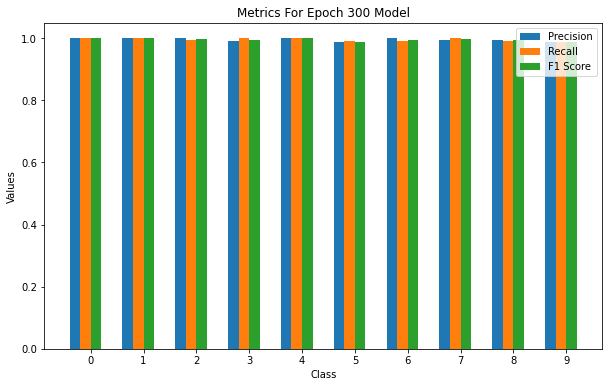

In [323]:
# Number of metrics
num_metrics = len(precision)

# Generate x-axis values (indices)
indices = np.arange(num_metrics)

# Bar width
bar_width = 0.2

# Plot precision, recall, F1 score, and MCC
fig, ax = plt.subplots(figsize=(10, 6))
precision_bar = ax.bar(indices, precision, width=bar_width, label='Precision')
recall_bar = ax.bar(indices + bar_width, recall, width=bar_width, label='Recall')
f1_score_bar = ax.bar(indices + 2 * bar_width, f1_score, width=bar_width, label='F1 Score')

# Set labels, title, and legend
ax.set_xlabel('Class')
ax.set_ylabel('Values')
ax.set_title(f'Metrics For Epoch {trained_models[-1]["epoch"]} Model')
ax.set_xticks(indices + 1.5 * bar_width)
ax.set_xticklabels(range(class_start,len(df_data_labels[0].unique())+class_start))
ax.legend()

# Show the plot
plt.show()

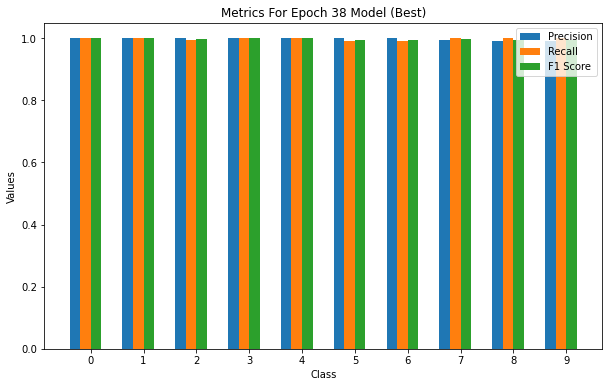

In [324]:
# Number of metrics
num_metrics = len(precision)

# Generate x-axis values (indices)
indices = np.arange(num_metrics)

# Bar width
bar_width = 0.2

# Plot precision, recall, F1 score, and MCC
fig, ax = plt.subplots(figsize=(10, 6))
precision_bar = ax.bar(indices, precision_best, width=bar_width, label='Precision')
recall_bar = ax.bar(indices + bar_width, recall_best, width=bar_width, label='Recall')
f1_score_bar = ax.bar(indices + 2 * bar_width, f1_score_best, width=bar_width, label='F1 Score')

# Set labels, title, and legend
ax.set_xlabel('Class')
ax.set_ylabel('Values')
ax.set_title(f'Metrics For Epoch {model_best_weights["epoch"]} Model (Best)')
ax.set_xticks(indices + 1.5 * bar_width)
ax.set_xticklabels(range(class_start,len(df_data_labels[0].unique())+class_start))
ax.legend()

# Show the plot
plt.show()

In [325]:
predictions_val

array([9, 9], dtype=int64)

In [326]:
true_labels_val

array([9, 9], dtype=int64)

In [327]:
# # Your data
# sum_squared_errors_list = [693.9621472168737, 131.8355530302365, 79.72087915294165, 63.746614570919625]
# misclassifications_list = [579, 89, 45, 34]
# epochs = [5, 10, 15, 20]

# # Create figure and axes
# fig, ax1 = plt.subplots()

# # Plot sum of squared errors on the first y-axis
# color = 'tab:red'
# ax1.set_xlabel('Epochs')
# ax1.set_ylabel('Sum of Squared Errors', color=color)
# ax1.plot(epochs, sum_squared_errors_list, marker='o', linestyle='-', color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# # Create a second y-axis to plot misclassifications
# ax2 = ax1.twinx()
# color = 'tab:blue'
# ax2.set_ylabel('Misclassifications', color=color)
# ax2.plot(epochs, misclassifications_list, marker='s', linestyle='--', color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# # Show the plot
# plt.title('Sum of Squared Errors and Misclassifications Every 5 Epochs')
# plt.show()

In [328]:
# epochs = [5, 10, 15, 20]

# # Create figure and axes
# fig, ax1 = plt.subplots()

# # Plot sum of squared errors on the first y-axis
# color = 'tab:red'
# ax1.set_xlabel('Epochs')
# ax1.set_ylabel('Sum of Squared Errors', color=color)
# ax1.plot(epochs, sum_squared_errors_list, marker='o', linestyle='-', color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# # Add data labels for sum of squared errors
# for i, txt in enumerate(sum_squared_errors_list):
#     ax1.annotate(f'{txt:.2f}', (epochs[i], sum_squared_errors_list[i]), textcoords="offset points", xytext=(0, 5), ha='center')

# # Create a second y-axis to plot misclassifications
# ax2 = ax1.twinx()
# color = 'tab:blue'
# ax2.set_ylabel('Misclassifications', color=color)
# ax2.plot(epochs, misclassifications_list, marker='s', linestyle='--', color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# # Add data labels for misclassifications
# for i, txt in enumerate(misclassifications_list):
#     ax2.annotate(f'{txt}', (epochs[i], misclassifications_list[i]), textcoords="offset points", xytext=(0, 5), ha='center')

# # Show the plot
# plt.title('Sum of Squared Errors and Misclassifications Over Epochs')
# plt.show()

In [329]:
range(1, len(sum_squared_errors_list_training)+1)

range(1, 301)

# Save trained weights, sum of square errors per epoch, accuracy metrics

In [415]:
# save sum of square errors per epoch
validation_set_statistics = pd.DataFrame({
    'sum_squared_errors_list': sum_squared_errors_list,
    'misclassifications_list': misclassifications_list,
    'epoch #': epochs})

validation_set_statistics.to_csv('validation_set_stats_every_5_epochs_NetworkA.csv')

ValueError: arrays must all be same length

In [406]:
# save trained weights
print(f'Model best found in epoch: {model_best_weights["epoch"]}')
print(f'Model best sum of square errors:: {model_best_weights["sum_squared_errors"]}')

weights_1_best = pd.DataFrame(model_best_weights["weights_1"])
weights_2_best = pd.DataFrame(model_best_weights["weights_2"])
weights_out_best = pd.DataFrame(model_best_weights["weights_out"])

# export trained weights
weights_1_best.to_csv('trained_weights_1.csv', header=False, index=False)
weights_2_best.to_csv('trained_weights_2.csv', header=False, index=False)
weights_out_best.to_csv('trained_weights_out.csv', header=False, index=False)

Model best found in epoch: 38
Model best sum of square errors:: 8.09903526831176e-05


In [407]:
# save trained weights for last epoch
print(f'Saving trained weights for model formed on epoch: {num_epochs}')
print(f'Sum of square errors:: {sum_squared_errors_list[-1]}')
print(f'Number of misclassifications:: {misclassifications_list[-1]}')

weights_1_last = pd.DataFrame(weights_1)
weights_2_last = pd.DataFrame(weights_2)
weights_out_last = pd.DataFrame(weights_out)

# export trained weights
weights_1_last.to_csv('trained_weights_1_last.csv', header=False, index=False)
weights_2_last.to_csv('trained_weights_2_last.csv', header=False, index=False)
weights_out_last.to_csv('trained_weights_out_last.csv', header=False, index=False)

Saving trained weights for model fromed on epoch: 15
Sum of square errors:: 19.512728225703405
Number of misclassifications:: 10


In [408]:
# save accuracy metrics
accuracy_metrics_df = pd.DataFrame.from_dict([model_epoch_20_data, model_best_data])
accuracy_metrics_df['model_name'] = [f'Model_Epoch_{trained_models[-1]["epoch"]}', 'Model_best']
accuracy_metrics_df.set_index('model_name')

accuracy_metrics_df.to_csv('accuracy_metrics.csv')

In [409]:
y_out_layer_val[0]

array([5.77183372e-12, 2.41444567e-07, 2.84023276e-10, 3.03823025e-06,
       2.19353529e-05, 7.18194891e-04, 1.18511274e-09, 1.49553245e-09,
       3.06446737e-09, 9.99711538e-01])

# Using trained weights to predict data in video

In [11]:
# Load trained weights
# trained_weights_1_df = pd.read_csv('trained_weights_1_last.csv', header=None)
# trained_weights_2_df = pd.read_csv('trained_weights_2_last.csv', header=None)
# trained_weights_out_df = pd.read_csv('trained_weights_out_last.csv', header=None)
trained_weights_1_df = pd.read_csv('trained_weights_1.csv', header=None)
trained_weights_2_df = pd.read_csv('trained_weights_2.csv', header=None)
trained_weights_out_df = pd.read_csv('trained_weights_out.csv', header=None)

# convert to numpy arrays
trained_weights_1 = trained_weights_1_df.to_numpy()
trained_weights_2 = trained_weights_2_df.to_numpy()
trained_weights_out = trained_weights_out_df.to_numpy()

In [337]:
# # Generate predictions for test_set.csv

# # Activation functions

# activation_function_hidden = leaky_ReLU
# activation_function_derivative_hidden = leaky_ReLU_derivative

# activation_function_output = sigmoid
# activation_function_derivative_output = sigmoid_derivative

# # Test set
# num_samples_val = len(np_test_set)
# batch_size = 10

# # test set predictions 
# test_set_predictions = []

# for i in range(0, num_samples_val, batch_size):
#     # Select mini-batch
#     mini_batch_input_val = np_test_set[i:i+batch_size]

#     # Forward propagation
#     v_hidden_layer_1_test = mini_batch_input_val @ trained_weights_1 # internal activity
# #     v_hidden_layer_1_test = mini_batch_input_val @ weights_1 # internal activity
#     y_hidden_layer_1_test = activation_function_hidden(v_hidden_layer_1_test) # activation function
#     y_hidden_layer_1_test = np.hstack((np.ones(shape=(y_hidden_layer_1_test.shape[0], 1)), y_hidden_layer_1_test)) # add bias as first column

#     v_hidden_layer_2_test = y_hidden_layer_1_test @ trained_weights_2 # internal activity
# #     v_hidden_layer_2_test = y_hidden_layer_1_test @ weights_2 # internal activity
#     y_hidden_layer_2_test = activation_function_hidden(v_hidden_layer_2_test) # activation function
#     y_hidden_layer_2_test = np.hstack((np.ones(shape=(y_hidden_layer_2_test.shape[0], 1)), y_hidden_layer_2_test)) # add bias as first column

#     v_out_layer_test = y_hidden_layer_2_test @ trained_weights_out # internal activity
# #     v_out_layer_test = y_hidden_layer_2_test @ weights_out # internal activity
#     y_out_layer_test = activation_function_output(v_out_layer_test) # activation function
    
#     # convert from one-hot encoding to index
#     prediction_class = np.argmax(y_out_layer_test, axis=1)+1
    
#     test_set_predictions += prediction_class.tolist()




In [338]:
# # Select mini-batch
# mini_batch_input_val = np_test_set[i:i+batch_size]

# # Forward propagation
# v_hidden_layer_1_test = mini_batch_input_val @ trained_weights_1 # internal activity
# #     v_hidden_layer_1_test = mini_batch_input_val @ weights_1 # internal activity
# y_hidden_layer_1_test = activation_function_hidden(v_hidden_layer_1_test) # activation function
# y_hidden_layer_1_test = np.hstack((np.ones(shape=(y_hidden_layer_1_test.shape[0], 1)), y_hidden_layer_1_test)) # add bias as first column

# v_hidden_layer_2_test = y_hidden_layer_1_test @ trained_weights_2 # internal activity
# #     v_hidden_layer_2_test = y_hidden_layer_1_test @ weights_2 # internal activity
# y_hidden_layer_2_test = activation_function_hidden(v_hidden_layer_2_test) # activation function
# y_hidden_layer_2_test = np.hstack((np.ones(shape=(y_hidden_layer_2_test.shape[0], 1)), y_hidden_layer_2_test)) # add bias as first column

# v_out_layer_test = y_hidden_layer_2_test @ trained_weights_out # internal activity
# #     v_out_layer_test = y_hidden_layer_2_test @ weights_out # internal activity
# y_out_layer_test = activation_function_output(v_out_layer_test) # activation function

# # convert from one-hot encoding to index
# prediction_class = np.argmax(y_out_layer_test, axis=1)+1

In [ ]:
# path_video = r"D:\Jim\UP\MEngg in AI\AI 201\Project\Materials\Raw\VID20240111092434.mp4"

# # Create video capture object
# capture = VideoCapture(path_video)

# predicted_value_list = [] # store predicted values

# # Check that a camera connection has been established
# if not capture.isOpened():
#     print("Error opening video file")

# else:
#     # Get video properties and print them
#     frame_width = capture.get(CAP_PROP_FRAME_WIDTH)
#     frame_height = capture.get(CAP_PROP_FRAME_HEIGHT)
#     fps = capture.get(CAP_PROP_FPS)
    
#     totalNoFrames = capture.get(cv2.CAP_PROP_FRAME_COUNT)
#     durationInSeconds = totalNoFrames // fps

#     print("Image frame width: ", int(frame_width))
#     print("Image frame height: ", int(frame_height))
#     print("Frame rate: ", int(fps))
#     print("Total number of frames ", int(totalNoFrames))
#     print("Duration (in seconds): ", int(durationInSeconds))

# # Parameters for checking frame save count and frame number    
# frame_save_count = 0
# frame_counter = 0
# show_video = True # shows video or not

# #     x1,y1 = 357, 271
# #     x2,y2 = 386, 323

# # Parameters for getting digit frames
# # size of digit in pixels
# digit_height = 53+1
# digit_width = 39
# #     digit_height = 55
# #     digit_width = 35 
# #digit_width = 29 

# # Setup pixel coordinates for 1st, 2nd and 3rd digits
# #     x1_digit_1, y1_digit_1 = 356, 315
# x1_digit_1, y1_digit_1 = 352, 315
# x2_digit_1, y2_digit_1 = x1_digit_1 + digit_width, y1_digit_1 + digit_height

# x1_digit_2, y1_digit_2 = x2_digit_1, y1_digit_1
# x2_digit_2, y2_digit_2 = x1_digit_2 + digit_width, y1_digit_2 + digit_height

# x1_digit_3, y1_digit_3 = x2_digit_2, y1_digit_1
# x2_digit_3, y2_digit_3 = x1_digit_3 + digit_width, y1_digit_3 + digit_height

# #     x1_digit_1, y1_digit_1 = 357, 310
# #     x2_digit_1, y2_digit_1 = 386, 369

# # Construct list of coordinates for frame digits
# frame_digit_coordinates =\
#     x1_digit_1, y1_digit_1, x2_digit_1, y2_digit_1,\
#     x2_digit_2, y1_digit_2, x2_digit_2, y2_digit_2,\
#     x1_digit_3, y1_digit_3, x2_digit_3, y2_digit_3

# while capture.isOpened() and show_video:

#     # Read an image frame
#     ret, frame = capture.read()
    
#     if ret == False:
#         break

#     # Rotate frame
#     frame = rotate_image(frame, 3.5) # 3.5 degree rotation seems to be the right value
    
#     # Convert to grayscale
#     frame = cvtColor(frame, COLOR_BGR2GRAY)
    
#     # Get frame digits
# #     frame = frame[:,:,0] # get 1st band of frame (grayscale, note: all bands are equal)
#     frame_digits = frame_to_normalized_row_vectors(frame, frame_digit_coordinates)
    
#     # add bias
#     frame_digits = np.hstack((np.ones(shape=(frame_digits.shape[0],1)), frame_digits)) # add bias as first column

# #     print('frame_digits', frame_digits)
    
#     # Select mini-batch
# #     mini_batch_input_val = np_test_set[i:i+batch_size]
#     mini_batch_input_val = frame_digits

#     # Forward propagation
#     v_hidden_layer_1_test = mini_batch_input_val @ trained_weights_1 # internal activity
#     #     v_hidden_layer_1_test = mini_batch_input_val @ weights_1 # internal activity
#     y_hidden_layer_1_test = activation_function_hidden(v_hidden_layer_1_test) # activation function
#     y_hidden_layer_1_test = np.hstack((np.ones(shape=(y_hidden_layer_1_test.shape[0], 1)), y_hidden_layer_1_test)) # add bias as first column

#     v_hidden_layer_2_test = y_hidden_layer_1_test @ trained_weights_2 # internal activity
#     #     v_hidden_layer_2_test = y_hidden_layer_1_test @ weights_2 # internal activity
#     y_hidden_layer_2_test = activation_function_hidden(v_hidden_layer_2_test) # activation function
#     y_hidden_layer_2_test = np.hstack((np.ones(shape=(y_hidden_layer_2_test.shape[0], 1)), y_hidden_layer_2_test)) # add bias as first column

#     v_out_layer_test = y_hidden_layer_2_test @ trained_weights_out # internal activity
#     #     v_out_layer_test = y_hidden_layer_2_test @ weights_out # internal activity
#     y_out_layer_test = activation_function_output(v_out_layer_test) # activation function

#     # convert from one-hot encoding to index
#     prediction_class = np.argmax(y_out_layer_test, axis=1)
    
#     # Determine coordinates of decimals
#     x1_decimal_1, y1_decimal_1 = 347, 362+1
#     x2_decimal_1, y2_decimal_1 = 351-2, 366-2+1
    
#     x1_decimal_2, y1_decimal_2 = 383, 362+1
#     x2_decimal_2, y2_decimal_2 = 387-2, 366-2+1

    
#     # Get decimals from frame
#     frame_decimal_1 = frame[y1_decimal_1: y2_decimal_1, x1_decimal_1:x2_decimal_1]
#     frame_decimal_2 = frame[y1_decimal_2: y2_decimal_2, x1_decimal_2:x2_decimal_2]
    
#     # Get sum of positions on decimals
#     frame_decimal_1_sum = sum(sum(frame_decimal_1)) # if this is greater than frame_decimal_2_sum, decimal is on leftmost
#     frame_decimal_2_sum = sum(sum(frame_decimal_2))
#     frame_decimal_1_max = np.max(frame_decimal_1) # if this is greater than frame_decimal_2_sum, decimal is on leftmost
#     frame_decimal_2_max = np.max(frame_decimal_2)
    
# #     if frame_decimal_1_max > frame_decimal_2_max:
#     if frame_decimal_1_sum > frame_decimal_2_sum:
#         predicted_value = f'.{prediction_class[0]}{prediction_class[1]}{prediction_class[2]}'
# #         print(f'prediction: {predicted_value}')
#     else:
#         predicted_value = f'{prediction_class[0]}.{prediction_class[1]}{prediction_class[2]}'
# #         print('decimal after 1st digit')
    
# #   print(f'prediction: {prediction_class}')
# #     print(f'prediction: {predicted_value}') # print results of prediction
    
#     if frame_counter % int(fps) == 0: # save one frame per second
        
#         print(f'prediction: {predicted_value}') # print results of prediction per second
#         predicted_value_list.append(predicted_value)
#         pass
# #         # Save frame to a file
# #         frame_name = r"D:\Jim\UP\MEngg in AI\AI 201\Project\Materials\frames\frame%d.jpg" %frame_save_count
# #         cv2.imwrite(frame_name, frame) # save frame as JPEG file
# #         frame_save_count += 1
    
#     # Update frame counter
#     frame_counter += 1
    
#     # Enclose digits in rectangular boxes
#     cv2.rectangle(frame, (x1_digit_1, y1_digit_1), (x2_digit_1, y2_digit_1 ), color=(255,0,0), thickness=1)
#     cv2.rectangle(frame, (x1_digit_2, y1_digit_2), (x2_digit_2, y2_digit_2 ), color=(255,0,0), thickness=1)
#     cv2.rectangle(frame, (x1_digit_3, y1_digit_3), (x2_digit_3, y2_digit_3 ), color=(255,0,0), thickness=1)

#     # Determine location of decimal places 1 and 2
#     cv2.rectangle(frame, (x1_decimal_1, y1_decimal_1), (x2_decimal_1, y2_decimal_1), color=(255,0,0), thickness=1)
#     cv2.rectangle(frame, (x1_decimal_2, y1_decimal_2), (x2_decimal_2, y2_decimal_2), color=(255,0,0), thickness=1)
    
#     # If an image frame has been grabbed, display it
#     if ret:
# #         pass
#         imshow('Displaying image frames from video file', frame)

#     # If the Esc key is pressed, terminate the while loop
#     if waitKey(25) == 27:
#         break

# # Release the video capture and close the display window
# capture.release()
# destroyAllWindows()

prediction: .841


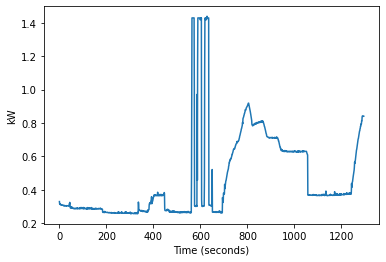

In [18]:
activation_function_hidden = leaky_ReLU
activation_function_derivative_hidden = leaky_ReLU_derivative

activation_function_output = sigmoid
activation_function_derivative_output = sigmoid_derivative

path_video = r"D:\Jim\UP\MEngg in AI\AI 201\Project\Materials\Raw\VID20240111092434.mp4"

# Create video capture object
capture = VideoCapture(path_video)

predicted_value_list = [] # store predicted values (as string)
predicted_value_list_float = [] # predicted values as float

# Check that a camera connection has been established
if not capture.isOpened():
    print("Error opening video file")

else:
    # Get video properties and print them
    frame_width = capture.get(CAP_PROP_FRAME_WIDTH)
    frame_height = capture.get(CAP_PROP_FRAME_HEIGHT)
    fps = capture.get(CAP_PROP_FPS)
    
    totalNoFrames = capture.get(cv2.CAP_PROP_FRAME_COUNT)
    durationInSeconds = totalNoFrames // fps

    print("Image frame width: ", int(frame_width))
    print("Image frame height: ", int(frame_height))
    print("Frame rate: ", int(fps))
    print("Total number of frames ", int(totalNoFrames))
    print("Duration (in seconds): ", int(durationInSeconds))

# Parameters for checking frame save count and frame number    
frame_save_count = 0
frame_counter = 0
show_video = True # shows video or not

#     x1,y1 = 357, 271
#     x2,y2 = 386, 323

# Parameters for getting digit frames
# size of digit in pixels
digit_height = 53+1
digit_width = 39
#     digit_height = 55
#     digit_width = 35 
#digit_width = 29 

# Setup pixel coordinates for 1st, 2nd and 3rd digits
#     x1_digit_1, y1_digit_1 = 356, 315
x1_digit_1, y1_digit_1 = 352, 315
x2_digit_1, y2_digit_1 = x1_digit_1 + digit_width, y1_digit_1 + digit_height

x1_digit_2, y1_digit_2 = x2_digit_1, y1_digit_1
x2_digit_2, y2_digit_2 = x1_digit_2 + digit_width, y1_digit_2 + digit_height

x1_digit_3, y1_digit_3 = x2_digit_2, y1_digit_1
x2_digit_3, y2_digit_3 = x1_digit_3 + digit_width, y1_digit_3 + digit_height

#     x1_digit_1, y1_digit_1 = 357, 310
#     x2_digit_1, y2_digit_1 = 386, 369

# Construct list of coordinates for frame digits
frame_digit_coordinates =\
    x1_digit_1, y1_digit_1, x2_digit_1, y2_digit_1,\
    x2_digit_2, y1_digit_2, x2_digit_2, y2_digit_2,\
    x1_digit_3, y1_digit_3, x2_digit_3, y2_digit_3

while capture.isOpened() and show_video:

    # Read an image frame
    ret, frame = capture.read()
    
    if ret == False:
        break

    # Rotate frame
    frame = rotate_image(frame, 3.5) # 3.5 degree rotation seems to be the right value
    
    # Convert to grayscale
    frame = cvtColor(frame, COLOR_BGR2GRAY)
    
    # Get frame digits
#     frame = frame[:,:,0] # get 1st band of frame (grayscale, note: all bands are equal)
    frame_digits = frame_to_normalized_row_vectors(frame, frame_digit_coordinates)
    
    # add bias
    frame_digits = np.hstack((np.ones(shape=(frame_digits.shape[0],1)), frame_digits)) # add bias as first column

#     print('frame_digits', frame_digits)
    
    # Select mini-batch
#     mini_batch_input_val = np_test_set[i:i+batch_size]
    mini_batch_input_val = frame_digits

    # Forward propagation
    v_hidden_layer_1_test = mini_batch_input_val @ trained_weights_1 # internal activity
    #     v_hidden_layer_1_test = mini_batch_input_val @ weights_1 # internal activity
    y_hidden_layer_1_test = activation_function_hidden(v_hidden_layer_1_test) # activation function
    y_hidden_layer_1_test = np.hstack((np.ones(shape=(y_hidden_layer_1_test.shape[0], 1)), y_hidden_layer_1_test)) # add bias as first column

    v_hidden_layer_2_test = y_hidden_layer_1_test @ trained_weights_2 # internal activity
    #     v_hidden_layer_2_test = y_hidden_layer_1_test @ weights_2 # internal activity
    y_hidden_layer_2_test = activation_function_hidden(v_hidden_layer_2_test) # activation function
    y_hidden_layer_2_test = np.hstack((np.ones(shape=(y_hidden_layer_2_test.shape[0], 1)), y_hidden_layer_2_test)) # add bias as first column

    v_out_layer_test = y_hidden_layer_2_test @ trained_weights_out # internal activity
    #     v_out_layer_test = y_hidden_layer_2_test @ weights_out # internal activity
    y_out_layer_test = activation_function_output(v_out_layer_test) # activation function

    # convert from one-hot encoding to index
    prediction_class = np.argmax(y_out_layer_test, axis=1)
    
    # Determine coordinates of decimals
    x1_decimal_1, y1_decimal_1 = 347, 362+1
    x2_decimal_1, y2_decimal_1 = 351-2, 366-2+1
    
    x1_decimal_2, y1_decimal_2 = 383, 362+1
    x2_decimal_2, y2_decimal_2 = 387-2, 366-2+1

    
    # Get decimals from frame
    frame_decimal_1 = frame[y1_decimal_1: y2_decimal_1, x1_decimal_1:x2_decimal_1]
    frame_decimal_2 = frame[y1_decimal_2: y2_decimal_2, x1_decimal_2:x2_decimal_2]
    
    # Get sum of positions on decimals
    frame_decimal_1_sum = sum(sum(frame_decimal_1)) # if this is greater than frame_decimal_2_sum, decimal is on leftmost
    frame_decimal_2_sum = sum(sum(frame_decimal_2))
    frame_decimal_1_max = np.max(frame_decimal_1) # if this is greater than frame_decimal_2_sum, decimal is on leftmost
    frame_decimal_2_max = np.max(frame_decimal_2)
    
    if frame_decimal_1_max < frame_decimal_2_max:
#     if frame_decimal_1_sum > frame_decimal_2_sum:
        predicted_value = f'.{prediction_class[0]}{prediction_class[1]}{prediction_class[2]}'
#         print(f'prediction: {predicted_value}')
    else:
        predicted_value = f'{prediction_class[0]}.{prediction_class[1]}{prediction_class[2]}'
#         print('decimal after 1st digit')
    
#   print(f'prediction: {prediction_class}')
#     print(f'prediction: {predicted_value}') # print results of prediction
    
    if frame_counter % int(fps) == 0: # save one frame per second
        
        

        # Plot values
        # source: https://stackoverflow.com/questions/4098131/how-to-update-a-plot-in-matplotlib
        predicted_value_list.append(predicted_value)
        predicted_value_list_float.append(float(predicted_value))
        display.clear_output(wait=True)
        print(f'prediction: {predicted_value}') # print results of prediction per second
        plt.plot(predicted_value_list_float)
        # Adding labels to the axes
        plt.xlabel('Time (seconds)')
        plt.ylabel('kW')
        plt.show()
        
        pass
#         # Save frame to a file
#         frame_name = r"D:\Jim\UP\MEngg in AI\AI 201\Project\Materials\frames\frame%d.jpg" %frame_save_count
#         cv2.imwrite(frame_name, frame) # save frame as JPEG file
#         frame_save_count += 1
    
    # Update frame counter
    frame_counter += 1
    
    # Enclose digits in rectangular boxes
    cv2.rectangle(frame, (x1_digit_1, y1_digit_1), (x2_digit_1, y2_digit_1 ), color=(255,0,0), thickness=1)
    cv2.rectangle(frame, (x1_digit_2, y1_digit_2), (x2_digit_2, y2_digit_2 ), color=(255,0,0), thickness=1)
    cv2.rectangle(frame, (x1_digit_3, y1_digit_3), (x2_digit_3, y2_digit_3 ), color=(255,0,0), thickness=1)

    # Determine location of decimal places 1 and 2
    cv2.rectangle(frame, (x1_decimal_1, y1_decimal_1), (x2_decimal_1, y2_decimal_1), color=(255,0,0), thickness=1)
    cv2.rectangle(frame, (x1_decimal_2, y1_decimal_2), (x2_decimal_2, y2_decimal_2), color=(255,0,0), thickness=1)
    
    # If an image frame has been grabbed, display it
    if ret:
#         pass
        imshow('Displaying image frames from video file', frame)

    # If the Esc key is pressed, terminate the while loop
    if waitKey(25) == 27:
        break

# Release the video capture and close the display window
capture.release()
destroyAllWindows()

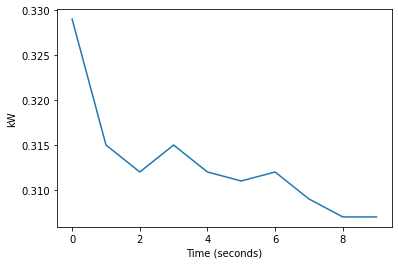

In [26]:
plt.plot(predicted_value_list_float[:1215])
# Adding labels to the axes
plt.xlabel('Time (seconds)')
plt.ylabel('kW')
plt.show()


In [22]:
df_frame_labels

,Frame No,Value
0,0,0.329
1,1,0.315
2,2,0.312
3,3,0.315
4,4,0.312
...,...,...
1291,1291,0.841
1292,1292,0.840
1293,1293,0.840
1294,1294,0.840


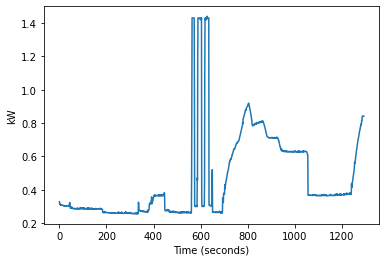

In [25]:
plt.plot(df_frame_labels['Value'].to_list())
# Adding labels to the axes
plt.xlabel('Time (seconds)')
plt.ylabel('kW')
plt.show()


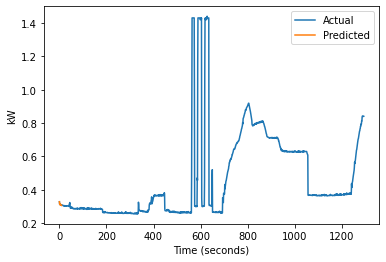

In [27]:

# Plotting both lists on the same graph
plt.plot(df_frame_labels['Value'].to_list(), label='Actual')
plt.plot(predicted_value_list_float, label='Predicted')

# Adding labels to the axes
plt.xlabel('Time (seconds)')
plt.ylabel('kW')

# Adding a legend to differentiate between the two lines
plt.legend()

# Display the plot
plt.show()

In [21]:
# activation_function_hidden = leaky_ReLU
# activation_function_derivative_hidden = leaky_ReLU_derivative

# activation_function_output = sigmoid
# activation_function_derivative_output = sigmoid_derivative

# path_video = r"D:\Jim\UP\MEngg in AI\AI 201\Project\Materials\Raw\VID20240111092434.mp4"

# # Create video capture object
# capture = VideoCapture(path_video)

# predicted_value_list = [] # store predicted values (as string)
# predicted_value_list_float = [] # predicted values as float

# # Check that a camera connection has been established
# if not capture.isOpened():
#     print("Error opening video file")

# else:
#     # Get video properties and print them
#     frame_width = capture.get(CAP_PROP_FRAME_WIDTH)
#     frame_height = capture.get(CAP_PROP_FRAME_HEIGHT)
#     fps = capture.get(CAP_PROP_FPS)
    
#     totalNoFrames = capture.get(cv2.CAP_PROP_FRAME_COUNT)
#     durationInSeconds = totalNoFrames // fps

#     print("Image frame width: ", int(frame_width))
#     print("Image frame height: ", int(frame_height))
#     print("Frame rate: ", int(fps))
#     print("Total number of frames ", int(totalNoFrames))
#     print("Duration (in seconds): ", int(durationInSeconds))

# # Parameters for checking frame save count and frame number    
# frame_save_count = 0
# frame_counter = 0
# show_video = True # shows video or not

# #     x1,y1 = 357, 271
# #     x2,y2 = 386, 323

# # Parameters for getting digit frames
# # size of digit in pixels
# digit_height = 53+1
# digit_width = 39
# #     digit_height = 55
# #     digit_width = 35 
# #digit_width = 29 

# # Setup pixel coordinates for 1st, 2nd and 3rd digits
# #     x1_digit_1, y1_digit_1 = 356, 315
# x1_digit_1, y1_digit_1 = 352, 315
# x2_digit_1, y2_digit_1 = x1_digit_1 + digit_width, y1_digit_1 + digit_height

# x1_digit_2, y1_digit_2 = x2_digit_1, y1_digit_1
# x2_digit_2, y2_digit_2 = x1_digit_2 + digit_width, y1_digit_2 + digit_height

# x1_digit_3, y1_digit_3 = x2_digit_2, y1_digit_1
# x2_digit_3, y2_digit_3 = x1_digit_3 + digit_width, y1_digit_3 + digit_height

# #     x1_digit_1, y1_digit_1 = 357, 310
# #     x2_digit_1, y2_digit_1 = 386, 369

# # Construct list of coordinates for frame digits
# frame_digit_coordinates =\
#     x1_digit_1, y1_digit_1, x2_digit_1, y2_digit_1,\
#     x2_digit_2, y1_digit_2, x2_digit_2, y2_digit_2,\
#     x1_digit_3, y1_digit_3, x2_digit_3, y2_digit_3

# while capture.isOpened() and show_video:

#     # Read an image frame
#     ret, frame = capture.read()
    
#     if ret == False:
#         break

#     # Rotate frame
#     frame = rotate_image(frame, 3.5) # 3.5 degree rotation seems to be the right value
    
#     # Convert to grayscale
#     frame = cvtColor(frame, COLOR_BGR2GRAY)
    
#     # Get frame digits
# #     frame = frame[:,:,0] # get 1st band of frame (grayscale, note: all bands are equal)
#     frame_digits = frame_to_normalized_row_vectors(frame, frame_digit_coordinates)
    
#     # add bias
#     frame_digits = np.hstack((np.ones(shape=(frame_digits.shape[0],1)), frame_digits)) # add bias as first column

# #     print('frame_digits', frame_digits)
    
#     # Select mini-batch
# #     mini_batch_input_val = np_test_set[i:i+batch_size]
#     mini_batch_input_val = frame_digits

#     # Forward propagation
#     v_hidden_layer_1_test = mini_batch_input_val @ trained_weights_1 # internal activity
#     #     v_hidden_layer_1_test = mini_batch_input_val @ weights_1 # internal activity
#     y_hidden_layer_1_test = activation_function_hidden(v_hidden_layer_1_test) # activation function
#     y_hidden_layer_1_test = np.hstack((np.ones(shape=(y_hidden_layer_1_test.shape[0], 1)), y_hidden_layer_1_test)) # add bias as first column

#     v_hidden_layer_2_test = y_hidden_layer_1_test @ trained_weights_2 # internal activity
#     #     v_hidden_layer_2_test = y_hidden_layer_1_test @ weights_2 # internal activity
#     y_hidden_layer_2_test = activation_function_hidden(v_hidden_layer_2_test) # activation function
#     y_hidden_layer_2_test = np.hstack((np.ones(shape=(y_hidden_layer_2_test.shape[0], 1)), y_hidden_layer_2_test)) # add bias as first column

#     v_out_layer_test = y_hidden_layer_2_test @ trained_weights_out # internal activity
#     #     v_out_layer_test = y_hidden_layer_2_test @ weights_out # internal activity
#     y_out_layer_test = activation_function_output(v_out_layer_test) # activation function

#     # convert from one-hot encoding to index
#     prediction_class = np.argmax(y_out_layer_test, axis=1)
    
#     # Determine coordinates of decimals
#     x1_decimal_1, y1_decimal_1 = 347, 362+1
#     x2_decimal_1, y2_decimal_1 = 351-2, 366-2+1
    
#     x1_decimal_2, y1_decimal_2 = 383, 362+1
#     x2_decimal_2, y2_decimal_2 = 387-2, 366-2+1

    
#     # Get decimals from frame
#     frame_decimal_1 = frame[y1_decimal_1: y2_decimal_1, x1_decimal_1:x2_decimal_1]
#     frame_decimal_2 = frame[y1_decimal_2: y2_decimal_2, x1_decimal_2:x2_decimal_2]
    
#     # Get sum of positions on decimals
#     frame_decimal_1_sum = sum(sum(frame_decimal_1)) # if this is greater than frame_decimal_2_sum, decimal is on leftmost
#     frame_decimal_2_sum = sum(sum(frame_decimal_2))
#     frame_decimal_1_max = np.max(frame_decimal_1) # if this is greater than frame_decimal_2_sum, decimal is on leftmost
#     frame_decimal_2_max = np.max(frame_decimal_2)
    
#     if frame_decimal_1_max < frame_decimal_2_max:
# #     if frame_decimal_1_sum > frame_decimal_2_sum:
#         predicted_value = f'.{prediction_class[0]}{prediction_class[1]}{prediction_class[2]}'
# #         print(f'prediction: {predicted_value}')
#     else:
#         predicted_value = f'{prediction_class[0]}.{prediction_class[1]}{prediction_class[2]}'
# #         print('decimal after 1st digit')
    
# #   print(f'prediction: {prediction_class}')
# #     print(f'prediction: {predicted_value}') # print results of prediction
    
#     if frame_counter % int(fps) == 0: # save one frame per second
        
        

#         # Plot values
#         # source: https://stackoverflow.com/questions/4098131/how-to-update-a-plot-in-matplotlib
#         predicted_value_list.append(predicted_value)
#         predicted_value_list_float.append(float(predicted_value))
#         display.clear_output(wait=True)
#         print(f'prediction: {predicted_value}') # print results of prediction per second
#         plt.plot(predicted_value_list_float)
#         # Adding labels to the axes
#         plt.xlabel('Time (seconds)')
#         plt.ylabel('kW')
#         plt.show()
        
#         pass
# #         # Save frame to a file
# #         frame_name = r"D:\Jim\UP\MEngg in AI\AI 201\Project\Materials\frames\frame%d.jpg" %frame_save_count
# #         cv2.imwrite(frame_name, frame) # save frame as JPEG file
# #         frame_save_count += 1
    
#     # Update frame counter
#     frame_counter += 1
    
#     # Enclose digits in rectangular boxes
#     cv2.rectangle(frame, (x1_digit_1, y1_digit_1), (x2_digit_1, y2_digit_1 ), color=(255,0,0), thickness=1)
#     cv2.rectangle(frame, (x1_digit_2, y1_digit_2), (x2_digit_2, y2_digit_2 ), color=(255,0,0), thickness=1)
#     cv2.rectangle(frame, (x1_digit_3, y1_digit_3), (x2_digit_3, y2_digit_3 ), color=(255,0,0), thickness=1)

#     # Determine location of decimal places 1 and 2
#     cv2.rectangle(frame, (x1_decimal_1, y1_decimal_1), (x2_decimal_1, y2_decimal_1), color=(255,0,0), thickness=1)
#     cv2.rectangle(frame, (x1_decimal_2, y1_decimal_2), (x2_decimal_2, y2_decimal_2), color=(255,0,0), thickness=1)
    
#     # If an image frame has been grabbed, display it
#     if ret:
# #         pass
#         imshow('Displaying image frames from video file', frame)

#     # If the Esc key is pressed, terminate the while loop
#     if waitKey(25) == 27:
#         break

# # Release the video capture and close the display window
# capture.release()
# destroyAllWindows()

In [340]:
np.max(frame_decimal_1)

255

In [341]:
mini_batch_input_val.shape 

(3, 2107)

# Using Trained weights to predict data in all frames

In [342]:
frame_and_frame_digit_whole_df # 1296 frames

,frame,frame_digits
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.5686274509803921, 0.5686274509803921, 0.56..."
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.5647058823529412, 0.5686274509803921, 0.57..."
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.5647058823529412, 0.5647058823529412, 0.56..."
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.5647058823529412, 0.5647058823529412, 0.56..."
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.5647058823529412, 0.5647058823529412, 0.56..."
...,...,...
1291,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.596078431372..."
1292,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.6039215686274509, 0.6078431372549019, 0.60..."
1293,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.596078431372549, 0.6039215686274509, 0.607..."
1294,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.6039215686274509, 0.596078431372549, 0.596..."


In [343]:
# Convert frame digits in dataframe to an array
frame_digit_array_whole = np.vstack(frame_and_frame_digit_whole_df['frame_digits'].tolist())
frame_digit_array_whole_df = pd.DataFrame(frame_digit_array_whole) # convert to dataframe

In [413]:
frame_digit_array_whole_df # 3888 rows (1296 images x 3 digits/image) × 2106 columns

,0,1,2,3,4,5,6,7,8,9,...,2096,2097,2098,2099,2100,2101,2102,2103,2104,2105
0,0.568627,0.568627,0.568627,0.568627,0.568627,0.564706,0.564706,0.564706,0.564706,0.568627,...,0.568627,0.572549,0.576471,0.580392,0.584314,0.584314,0.588235,0.592157,0.592157,0.588235
1,0.588235,0.592157,0.596078,0.596078,0.596078,0.592157,0.592157,0.596078,0.600000,0.600000,...,0.588235,0.584314,0.584314,0.584314,0.580392,0.584314,0.584314,0.584314,0.584314,0.584314
2,0.584314,0.584314,0.588235,0.584314,0.584314,0.584314,0.584314,0.584314,0.584314,0.588235,...,0.576471,0.576471,0.576471,0.584314,0.588235,0.588235,0.588235,0.588235,0.584314,0.584314
3,0.564706,0.568627,0.572549,0.572549,0.572549,0.572549,0.572549,0.568627,0.572549,0.576471,...,0.572549,0.580392,0.588235,0.588235,0.588235,0.588235,0.588235,0.592157,0.592157,0.592157
4,0.596078,0.596078,0.596078,0.592157,0.592157,0.592157,0.592157,0.592157,0.592157,0.592157,...,0.580392,0.584314,0.584314,0.584314,0.584314,0.584314,0.588235,0.592157,0.592157,0.588235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,0.615686,0.615686,0.615686,0.615686,0.611765,0.611765,0.611765,0.611765,0.611765,0.615686,...,0.600000,0.607843,0.611765,0.611765,0.607843,0.611765,0.611765,0.611765,0.619608,0.615686
3884,0.600000,0.600000,0.603922,0.607843,0.607843,0.607843,0.607843,0.607843,0.611765,0.611765,...,0.603922,0.607843,0.611765,0.611765,0.611765,0.611765,0.611765,0.615686,0.592157,0.537255
3885,0.592157,0.592157,0.596078,0.600000,0.600000,0.600000,0.603922,0.603922,0.592157,0.600000,...,0.596078,0.600000,0.607843,0.603922,0.607843,0.611765,0.615686,0.615686,0.615686,0.611765
3886,0.619608,0.615686,0.615686,0.615686,0.615686,0.611765,0.611765,0.615686,0.619608,0.615686,...,0.600000,0.603922,0.603922,0.603922,0.607843,0.611765,0.615686,0.615686,0.615686,0.615686


In [345]:
# add bias (2106 to 2107 columns)
frame_digit_array_whole = np.hstack((np.ones(shape=(frame_digit_array_whole.shape[0],1)), frame_digit_array_whole)) # add bias as first column

In [418]:
# Activation functions

activation_function_hidden = leaky_ReLU
activation_function_derivative_hidden = leaky_ReLU_derivative

activation_function_output = sigmoid
activation_function_derivative_output = sigmoid_derivative

# Select data to be predicted
mini_batch_input_val = frame_digit_array_whole

# Forward propagation
v_hidden_layer_1_test = mini_batch_input_val @ trained_weights_1 # internal activity
#     v_hidden_layer_1_test = mini_batch_input_val @ weights_1 # internal activity
y_hidden_layer_1_test = activation_function_hidden(v_hidden_layer_1_test) # activation function
y_hidden_layer_1_test = np.hstack((np.ones(shape=(y_hidden_layer_1_test.shape[0], 1)), y_hidden_layer_1_test)) # add bias as first column

v_hidden_layer_2_test = y_hidden_layer_1_test @ trained_weights_2 # internal activity
#     v_hidden_layer_2_test = y_hidden_layer_1_test @ weights_2 # internal activity
y_hidden_layer_2_test = activation_function_hidden(v_hidden_layer_2_test) # activation function
y_hidden_layer_2_test = np.hstack((np.ones(shape=(y_hidden_layer_2_test.shape[0], 1)), y_hidden_layer_2_test)) # add bias as first column

v_out_layer_test = y_hidden_layer_2_test @ trained_weights_out # internal activity
#     v_out_layer_test = y_hidden_layer_2_test @ weights_out # internal activity
y_out_layer_test = activation_function_output(v_out_layer_test) # activation function

# convert from one-hot encoding to index
prediction_class_whole = np.argmax(y_out_layer_test, axis=1)

In [419]:
len(prediction_class_whole)

3888

In [420]:
def determine_decimal_in_frame(frame):
    ''' input: frame, determines decimal location (before or after 1st digit) in frame '''
    # Determine coordinates of decimals
    x1_decimal_1, y1_decimal_1 = 347, 362+1
    x2_decimal_1, y2_decimal_1 = 351-2, 366-2+1
    
    x1_decimal_2, y1_decimal_2 = 383, 362+1
    x2_decimal_2, y2_decimal_2 = 387-2, 366-2+1


    # Get decimals from frame
    frame_decimal_1 = frame[y1_decimal_1: y2_decimal_1, x1_decimal_1:x2_decimal_1]
    frame_decimal_2 = frame[y1_decimal_2: y2_decimal_2, x1_decimal_2:x2_decimal_2]

    # Get sum of positions on decimals
    frame_decimal_1_sum = sum(sum(frame_decimal_1)) # if this is greater than frame_decimal_2_sum, decimal is on leftmost
    frame_decimal_2_sum = sum(sum(frame_decimal_2))
    frame_decimal_1_max = np.max(frame_decimal_1) # if this is greater than frame_decimal_2_sum, decimal is on leftmost
    frame_decimal_2_max = np.max(frame_decimal_2)

    if frame_decimal_1_max < frame_decimal_2_max:
#     if frame_decimal_1_sum > frame_decimal_2_sum:
        return '.xxx'
#         predicted_value = f'.{prediction_class[0]}{prediction_class[1]}{prediction_class[2]}'
    #         print(f'prediction: {predicted_value}')
    else:
        return 'x.xx'
#         predicted_value = f'{prediction_class[0]}.{prediction_class[1]}{prediction_class[2]}'

In [421]:
# Determine decimal place in frame_and_frame_digit_whole_df
decimal_places_whole = [determine_decimal_in_frame(frame) for frame in frame_and_frame_digit_whole_df['frame']]

In [422]:
decimal_places_whole

['.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 '.xxx',
 

In [423]:
frame_and_frame_digit_whole_df['decimal_places'] = decimal_places_whole

In [424]:
frame_and_frame_digit_whole_df

,frame,frame_digits,decimal_places,predicted_values
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.5686274509803921, 0.5686274509803921, 0.56...",.xxx,.329
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.5647058823529412, 0.5686274509803921, 0.57...",.xxx,.315
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.5647058823529412, 0.5647058823529412, 0.56...",.xxx,.312
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.5647058823529412, 0.5647058823529412, 0.56...",.xxx,.315
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.5647058823529412, 0.5647058823529412, 0.56...",.xxx,.312
...,...,...,...,...
1291,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.596078431372...",.xxx,.841
1292,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.6039215686274509, 0.6078431372549019, 0.60...",.xxx,.840
1293,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.596078431372549, 0.6039215686274509, 0.607...",.xxx,.840
1294,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.6039215686274509, 0.596078431372549, 0.596...",.xxx,.840


In [425]:
# Initialize list of predicted outputs
predicted_values_whole = []

# Iterate over whole dataframe 
for frame_no, row in frame_and_frame_digit_whole_df.iterrows():
    
    # Calculate index for 3 succeeding digits in prediction_class_whole
    digit_index = frame_no*3
    
    # Get decimal place format of frame
    decimal_places = row['decimal_places']
    
    # Determine format and get necessary digits to produce predicted value
    if decimal_places == '.xxx':
        predicted_value = f'.{prediction_class_whole[digit_index]}{prediction_class_whole[digit_index+1]}{prediction_class_whole[digit_index+2]}'
    
    elif decimal_places == 'x.xx':
        predicted_value = f'{prediction_class_whole[digit_index]}.{prediction_class_whole[digit_index+1]}{prediction_class_whole[digit_index+2]}'
    
    else:
        predicted_value = ''
    
    # Append predicted value to list
    predicted_values_whole.append(predicted_value) 
    
# Add predicted values to dataframe
frame_and_frame_digit_whole_df['predicted_values'] = predicted_values_whole

In [426]:
frame_and_frame_digit_whole_df

,frame,frame_digits,decimal_places,predicted_values
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.5686274509803921, 0.5686274509803921, 0.56...",.xxx,.329
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.5647058823529412, 0.5686274509803921, 0.57...",.xxx,.315
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.5647058823529412, 0.5647058823529412, 0.56...",.xxx,.312
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.5647058823529412, 0.5647058823529412, 0.56...",.xxx,.315
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.5647058823529412, 0.5647058823529412, 0.56...",.xxx,.312
...,...,...,...,...
1291,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.596078431372...",.xxx,.841
1292,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.6039215686274509, 0.6078431372549019, 0.60...",.xxx,.840
1293,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.596078431372549, 0.6039215686274509, 0.607...",.xxx,.840
1294,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.6039215686274509, 0.596078431372549, 0.596...",.xxx,.840


In [428]:
# Save as csv
frame_and_frame_digit_whole_df.to_csv('frame_and_frame_digit_whole_df.csv')

# Using trained weights to predict data in test set and save as csv

In [369]:
# np_test_set.shape

In [368]:
# # Load trained weights
# trained_weights_1_df = pd.read_csv('trained_weights_1.csv', header=None)
# trained_weights_2_df = pd.read_csv('trained_weights_2.csv', header=None)
# trained_weights_out_df = pd.read_csv('trained_weights_out.csv', header=None)

# # convert to numpy arrays
# trained_weights_1 = trained_weights_1_df.to_numpy()
# trained_weights_2 = trained_weights_2_df.to_numpy()
# trained_weights_out = trained_weights_out_df.to_numpy()

In [112]:
# trained_weights_1.shape

(2107, 500)

In [113]:
# trained_weights_2.shape

(501, 500)

In [114]:
# # add bias
# np_test_set = np.hstack((np.ones(shape=(np_test_set.shape[0],1)), np_test_set)) # add bias as first column

NameError: name 'np_test_set' is not defined

In [1000]:
# np_test_set = np_test_set[:,1:] # drop first column 

In [1001]:
# np_test_set.shape

(701, 358)

In [1002]:
# # Generate predictions for test_set.csv

# # Activation functions

# activation_function_hidden = leaky_ReLU
# activation_function_derivative_hidden = leaky_ReLU_derivative

# activation_function_output = sigmoid
# activation_function_derivative_output = sigmoid_derivative

# # Test set
# num_samples_val = len(np_test_set)
# batch_size = 10



# # test set predictions 
# test_set_predictions = []

# for i in range(0, num_samples_val, batch_size):
#     # Select mini-batch
#     mini_batch_input_val = np_test_set[i:i+batch_size]

#     # Forward propagation
#     v_hidden_layer_1_test = mini_batch_input_val @ trained_weights_1 # internal activity
# #     v_hidden_layer_1_test = mini_batch_input_val @ weights_1 # internal activity
#     y_hidden_layer_1_test = activation_function_hidden(v_hidden_layer_1_test) # activation function
#     y_hidden_layer_1_test = np.hstack((np.ones(shape=(y_hidden_layer_1_test.shape[0], 1)), y_hidden_layer_1_test)) # add bias as first column

#     v_hidden_layer_2_test = y_hidden_layer_1_test @ trained_weights_2 # internal activity
# #     v_hidden_layer_2_test = y_hidden_layer_1_test @ weights_2 # internal activity
#     y_hidden_layer_2_test = activation_function_hidden(v_hidden_layer_2_test) # activation function
#     y_hidden_layer_2_test = np.hstack((np.ones(shape=(y_hidden_layer_2_test.shape[0], 1)), y_hidden_layer_2_test)) # add bias as first column

#     v_out_layer_test = y_hidden_layer_2_test @ trained_weights_out # internal activity
# #     v_out_layer_test = y_hidden_layer_2_test @ weights_out # internal activity
#     y_out_layer_test = activation_function_output(v_out_layer_test) # activation function
    
#     # convert from one-hot encoding to index
#     prediction_class = np.argmax(y_out_layer_test, axis=1)+1
    
#     test_set_predictions += prediction_class.tolist()




ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2107 is different from 358)

In [ ]:
# trained_weights_1.shape

In [ ]:
# mini_batch_input_val.shape

In [ ]:
# prediction_class+class_start

In [ ]:
# test_set_predictions

In [ ]:
# test_set_predictions_df = pd.DataFrame.from_dict({'Network A predictions on test_set': test_set_predictions})

In [ ]:
# test_set_predictions_df

In [ ]:
# test_set_predictions_df.hist()

In [ ]:
# data = test_set_predictions_df['Network A predictions on test_set'].to_list()

# # Plotting the histogram
# plt.hist(data, bins=range(1, 10), align='left', edgecolor='black', alpha=0.7)

# # Adding labels and title
# plt.xlabel('Classes')
# plt.ylabel('Frequency')
# plt.title('Network A predictions on test_set')

# # Adding data labels
# for i in range(1, 9):
#     count = data.count(i)
#     plt.text(i, count, str(count), ha='center', va='bottom')

# # Display the histogram
# plt.show()

In [ ]:
# data = test_set_predictions_df['Network A predictions on test_set']

# # Create a histogram
# n, bins, patches = plt.hist(data, bins='auto', alpha=0.7, rwidth=0.85)

# # Add data labels
# for value, count, patch in zip(bins[:-1], n, patches):
#     plt.text(value + 0.5, count, f'{int(count)}', ha='center', va='bottom')

# # Add labels and title
# plt.xlabel('Values')
# plt.ylabel('Frequency')
# plt.title('Network A predictions on test_set')

# # Show the plot
# plt.show()

In [ ]:
# # save test_set_predictions to a file

# test_set_predictions_df.to_csv('predictions_for_test_leakyrelu.csv', header=False,index=False)

# Timing comparisons

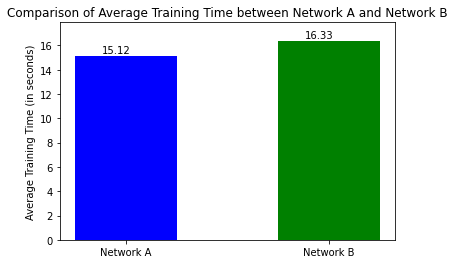

In [370]:
# timing comparisons
avg_training_time_network_B = 16.33120076 # imported from other network
avg_training_time_network_A = 15.11590401 # imported from results found in this code (testing different alphas)

# Bar plot
labels = ['Network A', 'Network B']
values = [avg_training_time_network_A, avg_training_time_network_B]

# Make the bars thinner
bar_width = 0.5  # You can adjust this value based on your preference

bars = plt.bar(labels, values, color=['blue', 'green'], width=bar_width)

# Adding data labels
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.05, bar.get_height() + 0.1, f'{value:.2f}', ha='center', va='bottom')

plt.ylabel('Average Training Time (in seconds)')
plt.title('Comparison of Average Training Time between Network A and Network B')

# Set the maximum y-axis value
plt.ylim(0, 17.9)

plt.show()

In [ ]:
# # Plot the errors per epoch
# plt.plot(range(1, num_epochs + 1), sum_squared_errors_per_epoch, marker='o')
# plt.xlabel('Epoch')
# plt.ylabel('Sum of Squared Errors')
# plt.title('Errors per Epoch')
# plt.grid(True)
# plt.show()

In [ ]:
weights_out.shape

In [ ]:
# output_classification = np.argmax(y_out_layer, axis=1) # get index of output node containing highest probability
# output_classification_one_hot = np.zeros((output_classification.size, output_classification.max() + 1))
# output_classification_one_hot[np.arange(output_classification.size), output_classification] = 1
# # 1-8 kasi yung classification, pero inaassume niya na 0-8
# # output_classification = output_classification[:,1:] # drop first column 

In [ ]:
# output_classification_one_hot

In [ ]:
mini_batch_labels

In [ ]:
y_out_layer

In [ ]:
# def leaky_ReLU(x, alpha=0.01):
#     return np.maximum(alpha * x, x)

# def leaky_ReLU_derivative(x, alpha=0.01):
#     return np.where(x > 0, 1, alpha)

# # output size
# output_size = 8 # Set your output size

# # Initialize weights with small random values
# np.random.seed(42)  # Set seed for reproducibility
# # input_size =  355 # Set your input size
# input_size = training_set.shape[1] # 12200 samples x 354 features each sample + 1 bias (input size: 355)

# # number of neurons 
# # hidden_size_1 =  173 # Set your first hidden layer size --> diverges
# # hidden_size_2 =  86 # Set your second hidden layer size --> diverges
# # hidden_size_1 =  200 # Set your first hidden layer size --> diverges 
# # hidden_size_2 =  100 # Set your second hidden layer size --> diverges
# hidden_size_1 =  250 # Set your first hidden layer size
# hidden_size_2 =  100 # Set your second hidden layer size
# # https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw?fbclid=IwAR3oLF8O3HOTCzCk6IolA7v4UF7tcNY-C3udzL2EPqB28KKpRYRW5UasLsA
# # hidden_size_1 =  int(training_set.shape[0]/(2*(input_size + output_size))) # Set your first hidden layer size
# # hidden_size_2 =  int(training_set.shape[0]/(3*(input_size + output_size))) # Set your second hidden layer size

# print('hidden_size_1:', hidden_size_1)
# print('hidden_size_2:', hidden_size_2)

# weights_1 = np.random.randn(input_size, hidden_size_1) * 0.01
# weights_2 = np.random.randn(hidden_size_1 + 1, hidden_size_2) * 0.01  # Add 1 for bias
# weights_out = np.random.randn(hidden_size_2 + 1, output_size) * 0.01  # Add 1 for bias

# # Initialize previous weights
# hidden_layer_1_delta_weights_previous = np.zeros_like(weights_1)
# hidden_layer_2_delta_weights_previous = np.zeros_like(weights_2)
# out_delta_weights_previous = np.zeros_like(weights_out)


In [ ]:
# # Batch size
# batch_size = 10
# num_epochs = 30

# # Training loop with mini-batch
# num_samples = len(training_set)

# for epoch in range(num_epochs):
#     for i in range(0, num_samples, batch_size):
#         # Select mini-batch
#         mini_batch_input = training_set[i:i+batch_size]
#         mini_batch_labels = training_labels_one_hot[i:i+batch_size]

#         # Forward propagation
#         v_hidden_layer_1 = mini_batch_input @ weights_1 # internal activity
#         y_hidden_layer_1 = leaky_ReLU(v_hidden_layer_1) # activation function
#         y_hidden_layer_1 = np.hstack((np.ones(shape=(y_hidden_layer_1.shape[0], 1)), y_hidden_layer_1)) # add bias as first column

#         v_hidden_layer_2 = y_hidden_layer_1 @ weights_2 # internal activity
#         y_hidden_layer_2 = leaky_ReLU(v_hidden_layer_2) # activation function
#         y_hidden_layer_2 = np.hstack((np.ones(shape=(y_hidden_layer_2.shape[0], 1)), y_hidden_layer_2)) # add bias as first column

#         v_out_layer = y_hidden_layer_2 @ weights_out # internal activity
#         y_out_layer = leaky_ReLU(v_out_layer) # activation function


#         # Calculate error
#         out_error = mini_batch_labels - y_out_layer
#         total_out_error = np.linalg.norm(out_error)
#         sum_squared_errors = np.sum(out_error**2)  # Sum of squared errors
        
#         print('total_out_error', total_out_error)
#         print('sum_squared_errors', sum_squared_errors)
        
#         # Back propagation
#         y_out_derivative = leaky_ReLU_derivative(y_out_layer)
#         out_delta = y_out_derivative * out_error
#         out_delta_weights = eta * y_hidden_layer_2.T @ out_delta

# #         y_hidden_layer_2_derivative = leaky_ReLU_derivative(y_hidden_layer_2)
# #         hidden_layer_2_delta = y_hidden_layer_2_derivative * (out_delta @ weights_out.T)
# #         hidden_layer_2_delta_weights = eta * y_hidden_layer_1.T @ hidden_layer_2_delta[:, 1:]

# #         y_hidden_layer_1_derivative = leaky_ReLU_derivative(y_hidden_layer_1)
# #         hidden_layer_1_delta = y_hidden_layer_1_derivative * (hidden_layer_2_delta[:, 1:] @ weights_2.T)
# #         hidden_layer_1_delta_weights = eta * mini_batch_input.T @ hidden_layer_1_delta[:, 1:]
        
#         # calculate hidden layer 2 backpropagation
#         y_hidden_layer_2_derivative = leaky_ReLU_derivative(y_hidden_layer_2) # derivative of leaky ReLU
#         hidden_layer_2_delta = (y_hidden_layer_2_derivative.T * (weights_out @ out_delta.T)).T 
#         hidden_layer_2_delta_weights = eta*np.dot(y_hidden_layer_1.T, hidden_layer_2_delta)
#         hidden_layer_2_delta_weights = hidden_layer_2_delta_weights[:,1:] # drop first column
#         hidden_layer_2_delta = hidden_layer_2_delta[:,1:] # drop first column

#         # calculate hidden layer 1 backpropagation
#         y_hidden_layer_1_derivative = leaky_ReLU_derivative(y_hidden_layer_1) # derivative of leaky ReLU
#         hidden_layer_1_delta = (y_hidden_layer_1_derivative.T * (weights_2 @ hidden_layer_2_delta.T)).T 
#         hidden_layer_1_delta_weights = eta*np.dot(mini_batch_input.T, hidden_layer_1_delta)
#         hidden_layer_1_delta_weights = hidden_layer_1_delta_weights[:,1:] # drop first column


#         # Update weights
#         weights_1 += hidden_layer_1_delta_weights + alpha * hidden_layer_1_delta_weights_previous
#         weights_2 += hidden_layer_2_delta_weights + alpha * hidden_layer_2_delta_weights_previous
#         weights_out += out_delta_weights + alpha * out_delta_weights_previous

#         # Update previous weights
#         hidden_layer_1_delta_weights_previous = hidden_layer_1_delta_weights
#         hidden_layer_2_delta_weights_previous = hidden_layer_2_delta_weights
#         out_delta_weights_previous = out_delta_weights

In [ ]:
weights_2.shape

In [ ]:
hidden_layer_2_delta_weights_previous.shape

In [ ]:
# walang from Original

# # Batch size
# batch_size = 10
# num_epochs = 100

# # Training loop with mini-batch
# num_samples = len(training_set)

# for epoch in range(num_epochs):
#     for i in range(0, num_samples, batch_size):
#         # Select mini-batch
#         mini_batch_input = training_set[i:i+batch_size]
#         mini_batch_labels = training_labels_one_hot[i:i+batch_size]

#         # Forward propagation
#         v_hidden_layer_1 = mini_batch_input @ weights_1 # internal activity
#         y_hidden_layer_1 = leaky_ReLU(v_hidden_layer_1) # activation function
#         y_hidden_layer_1 = np.hstack((np.ones(shape=(y_hidden_layer_1.shape[0], 1)), y_hidden_layer_1)) # add bias as first column

#         v_hidden_layer_2 = y_hidden_layer_1 @ weights_2 # internal activity
#         y_hidden_layer_2 = leaky_ReLU(v_hidden_layer_2) # activation function
#         y_hidden_layer_2 = np.hstack((np.ones(shape=(y_hidden_layer_2.shape[0], 1)), y_hidden_layer_2)) # add bias as first column

#         v_out_layer = y_hidden_layer_2 @ weights_out # internal activity
#         y_out_layer = leaky_ReLU(v_out_layer) # activation function


#         # Calculate error
#         out_error = mini_batch_labels - y_out_layer
#         total_out_error = np.linalg.norm(out_error)
        
#         print('total_out_error', total_out_error)

#         # Back propagation
#         y_out_derivative = leaky_ReLU_derivative(y_out_layer)
#         out_delta = y_out_derivative * out_error
#         out_delta_weights = eta * y_hidden_layer_2.T @ out_delta

#         y_hidden_layer_2_derivative = leaky_ReLU_derivative(y_hidden_layer_2)
#         hidden_layer_2_delta = y_hidden_layer_2_derivative * (out_delta @ weights_out.T)
#         hidden_layer_2_delta_weights = eta * y_hidden_layer_1.T @ hidden_layer_2_delta[:, 1:]

#         y_hidden_layer_1_derivative = leaky_ReLU_derivative(y_hidden_layer_1)
#         hidden_layer_1_delta = y_hidden_layer_1_derivative * (hidden_layer_2_delta[:, 1:] @ weights_2.T)
#         hidden_layer_1_delta_weights = eta * mini_batch_input.T @ hidden_layer_1_delta[:, 1:]
        
# #         # calculate hidden layer 2 backpropagation
# #         y_hidden_layer_2_derivative = leaky_ReLU_derivative(y_hidden_layer_2) # derivative of leaky ReLU
# #         hidden_layer_2_delta = (y_hidden_layer_2_derivative.T * (weights_out @ out_delta.T)).T 
# #         hidden_layer_2_delta_weights = eta*np.dot(y_hidden_layer_1.T, hidden_layer_2_delta)
# #         hidden_layer_2_delta_weights = hidden_layer_2_delta_weights[:,1:] # drop first column
# #         hidden_layer_2_delta = hidden_layer_2_delta[:,1:] # drop first column

# #         # calculate hidden layer 1 backpropagation
# #         y_hidden_layer_1_derivative = leaky_ReLU_derivative(y_hidden_layer_1) # derivative of leaky ReLU
# #         hidden_layer_1_delta = (y_hidden_layer_1_derivative.T * (weights_2 @ hidden_layer_2_delta.T)).T 
# #         hidden_layer_1_delta_weights = eta*np.dot(training_set.T, hidden_layer_1_delta)
# #         hidden_layer_1_delta_weights = hidden_layer_1_delta_weights[:,1:] # drop first column


#         # Update weights
#         weights_1 += eta * hidden_layer_1_delta_weights + alpha * hidden_layer_1_delta_weights_previous
#         weights_2 += eta * hidden_layer_2_delta_weights + alpha * hidden_layer_2_delta_weights_previous
#         weights_out += eta * out_delta_weights + alpha * out_delta_weights_previous

#         # Update previous weights
#         hidden_layer_1_delta_weights_previous = hidden_layer_1_delta_weights
#         hidden_layer_2_delta_weights_previous = hidden_layer_2_delta_weights
#         out_delta_weights_previous = out_delta_weights

In [ ]:
out_error

In [ ]:
# # Forward propagation
# v_hidden_layer_1 = training_set @ weights_1
# y_hidden_layer_1 = leaky_ReLU(v_hidden_layer_1)
# y_hidden_layer_1 = np.hstack((np.ones(shape=(y_hidden_layer_1.shape[0], 1)), y_hidden_layer_1))

# v_hidden_layer_2 = y_hidden_layer_1 @ weights_2
# y_hidden_layer_2 = leaky_ReLU(v_hidden_layer_2)
# y_hidden_layer_2 = np.hstack((np.ones(shape=(y_hidden_layer_2.shape[0], 1)), y_hidden_layer_2))

# v_out_layer = y_hidden_layer_2 @ weights_out
# y_out_layer = leaky_ReLU(v_out_layer)

# # Calculate error
# out_error = training_labels_one_hot - y_out_layer
# total_out_error = np.linalg.norm(out_error)

# print('total_out_error', total_out_error)

# # Back propagation
# y_out_derivative = leaky_ReLU_derivative(y_out_layer)
# out_delta = y_out_derivative * out_error
# out_delta_weights = eta * y_hidden_layer_2.T @ out_delta

# y_hidden_layer_2_derivative = leaky_ReLU_derivative(y_hidden_layer_2)
# hidden_layer_2_delta = y_hidden_layer_2_derivative * (out_delta @ weights_out.T)
# hidden_layer_2_delta_weights = eta * y_hidden_layer_1.T @ hidden_layer_2_delta[:, 1:]

# y_hidden_layer_1_derivative = leaky_ReLU_derivative(y_hidden_layer_1)
# hidden_layer_1_delta = y_hidden_layer_1_derivative * (hidden_layer_2_delta[:, 1:] @ weights_2.T)
# hidden_layer_1_delta_weights = eta * training_set.T @ hidden_layer_1_delta[:, 1:]

# lambda_reg = 0.001  # Set a regularization strength based on your preference
# weights_1 += eta * (hidden_layer_1_delta_weights - lambda_reg * weights_1) + alpha * hidden_layer_1_delta_weights_previous
# weights_2 += eta * (hidden_layer_2_delta_weights - lambda_reg * weights_2) + alpha * hidden_layer_2_delta_weights_previous
# weights_out += eta * (out_delta_weights - lambda_reg * weights_out) + alpha * out_delta_weights_previous

# # # Update weights
# # weights_1 += eta * hidden_layer_1_delta_weights + alpha * hidden_layer_1_delta_weights_previous
# # weights_2 += eta * hidden_layer_2_delta_weights + alpha * hidden_layer_2_delta_weights_previous
# # weights_out += eta * out_delta_weights + alpha * out_delta_weights_previous

# # Update previous weights
# hidden_layer_1_delta_weights_previous = hidden_layer_1_delta_weights
# hidden_layer_2_delta_weights_previous = hidden_layer_2_delta_weights
# out_delta_weights_previous = out_delta_weights


In [ ]:
# # Original
# # forward propagation

# # hidden layer 1
# v_hidden_layer_1 = training_set @ weights_1 # internal activity
# y_hidden_layer_1 = leaky_ReLU(v_hidden_layer_1) # activation function
# y_hidden_layer_1 = np.hstack((np.ones(shape=(y_hidden_layer_1.shape[0],1)), y_hidden_layer_1)) # add bias as first column

# # hidden layer 2
# v_hidden_layer_2 = y_hidden_layer_1 @ weights_2 # internal activity
# y_hidden_layer_2 = leaky_ReLU(v_hidden_layer_2) # activation function
# y_hidden_layer_2 = np.hstack((np.ones(shape=(y_hidden_layer_2.shape[0],1)), y_hidden_layer_2)) # add bias as first column

# # output layer
# v_out_layer = y_hidden_layer_2 @ weights_out # internal activity
# y_out_layer = leaky_ReLU(v_out_layer) # activation function

# # calculate error
# out_error = training_labels_one_hot - y_out_layer
# out_error = np.sqrt(np.einsum('ij,ij->j', out_error.T, out_error.T)) # calculate norm for each row
# total_out_error = np.linalg.norm(out_error)# total error 

# print('total_out_error', total_out_error)

# output_classification = np.argmax(y_out_layer, axis=1) # get index of output node containing highest probability

# # back propagation

# # calculate output layer backpropagation
# y_out_derivative = leaky_ReLU_derivative(y_out_layer) # derivative of leaky ReLU
# out_delta = y_out_derivative*np.array([out_error]).T # delta for output layer; activation fn derivative * error
# out_delta_weights = eta * np.dot(y_hidden_layer_2.T, out_delta)

# # calculate hidden layer 2 backpropagation
# y_hidden_layer_2_derivative = leaky_ReLU_derivative(y_hidden_layer_2) # derivative of leaky ReLU
# hidden_layer_2_delta = (y_hidden_layer_2_derivative.T * (weights_out @ out_delta.T)).T 
# hidden_layer_2_delta_weights = eta*np.dot(y_hidden_layer_1.T, hidden_layer_2_delta)
# hidden_layer_2_delta_weights = hidden_layer_2_delta_weights[:,1:] # drop first column
# hidden_layer_2_delta = hidden_layer_2_delta[:,1:] # drop first column

# # calculate hidden layer 1 backpropagation
# y_hidden_layer_1_derivative = leaky_ReLU_derivative(y_hidden_layer_1) # derivative of leaky ReLU
# hidden_layer_1_delta = (y_hidden_layer_1_derivative.T * (weights_2 @ hidden_layer_2_delta.T)).T 
# hidden_layer_1_delta_weights = eta*np.dot(training_set.T, hidden_layer_1_delta)
# hidden_layer_1_delta_weights = hidden_layer_1_delta_weights[:,1:] # drop first column

# # update weights
# weights_1 = weights_1 + (eta * hidden_layer_1_delta_weights + alpha * hidden_layer_1_delta_weights_previous*0) 
# weights_2 = weights_2 + (eta * hidden_layer_2_delta_weights + alpha * hidden_layer_2_delta_weights_previous*0) 
# weights_out = weights_out + (eta * out_delta_weights + alpha * out_delta_weights_previous*0) 

# # update previous weights
# hidden_layer_1_delta_weights_previous = np.array(hidden_layer_1_delta_weights)
# hidden_layer_2_delta_weights_previous = np.array(hidden_layer_2_delta_weights)
# out_delta_weights_previous = np.array(out_delta_weights)



In [ ]:
out_error

In [ ]:
out_delta

In [ ]:
hidden_layer_1_delta_weights.shape, weights_1.shape

In [ ]:
y_hidden_layer_2_derivative.shape

In [ ]:
hidden_layer_2_delta.shape

In [ ]:
hidden_layer_2_delta_weights.shape, weights_2.shape

In [ ]:
out_delta_weights.shape, weights_out.shape

In [ ]:
# sample calculation for Delta_out (output layer) (logistic sheet in Excel)
d_out = np.array([[0.057621468, 0.047933456]]) # delta_out, corresponds to out_delta
y_h2 = np.array([[1, 0.39090011, 0.371377287, 0.575551433]]) # corresponds to y_hidden_layer_2

0.85 * np.dot(y_h2.T, d_out) # this one produces Delta_out; corresponds to out_delta_weights

In [ ]:
# sample calculation for delta_h2 and Delta_w_h2
a_L = 0.7 # a_L (logistic slope param)

def logistic_derivative(x):
    
    return x*(1-x)

# weights in output layer
w_out = np.array([[-0.6, -0.4],
                  [0.8, -0.6],
                  [-0.3, 0.7],
                  [0.7, 0.3]]) # corresponds to weights_out

y_h1 = np.array([[1, 0.493000457, 0.491250893, 0.38154397, 0.411685975]]) # corresponds to y_hidden_layer_1

y_h2_derivative = logistic_derivative(y_h2) # corresponds to y_hidden_layer_2_derivative
print('y_h2_derivative', y_h2_derivative) # zero is a dummy for bias

delta_h2 = (a_L * y_h2_derivative.T * (w_out @ d_out.T)).T # delta_h2 (first element is zero for bias); corresponds to hidden_layer_2_delta
print('delta_h2', delta_h2)

0.85*np.dot(y_h1.T, delta_h2) # this one produces Delta_w_h2; corresponds to hidden_layer_2_delta_weights

In [ ]:
y_hidden_layer_2

In [ ]:
out_delta.shape, weights_out.shape

In [ ]:
# (v_out_derivative*np.array([out_error]).T)[125]

In [ ]:
# out_error[0]

In [ ]:
# v_out_derivative[125] * out_error[125]

In [ ]:
# out_error

In [ ]:
# total_out_error

In [ ]:
# (training_labels_one_hot - y_out_layer)[0]

# np.linalg.norm((training_labels_one_hot - y_out_layer)[0])

In [ ]:
# y_out_layer[0]

In [ ]:
# training_labels_one_hot[0]

In [ ]:
# y_hidden_layer_1.shape

In [ ]:
# y_hidden_layer_2.shape

In [ ]:
# y_out_layer.shape

In [ ]:
# output_classification = pd.DataFrame(output_classification)
# output_classification.hist() # first forward propagation

In [ ]:
# y_out_layer

In [ ]:
# training_labels_one_hot

In [ ]:
# ce_loss = cross_entropy(y_out_layer, training_labels_one_hot)
# print(ce_loss)